<a href="https://colab.research.google.com/github/jnqeras/ARC/blob/master/tesis5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pendientes

## Comentar al grupo

* Hay que hacer normalización sobre el Dataset? Aparentemente de esto se encarga hugging face automáticamente.

* Fixme: (creo que esto ya lo resolví con un seed, cuando esté seguro, borrar esta pregunta) Los conjuntos disjuntos Odio_i, Odio_k, Contranarrativa_i y Contranarrativa_k, se generan aleatoriamente y son distintos cada vez que se ejecuta la notebook. Está bien?

* Nota para mi: Creo que quiero un modelo que a las contranarrativas de un mismo tuit estén juntas.
 
>> Correr el experimento sobre todo el dataset demora 3 min y obtengo el siguiente resultado:
>> 
>> Métrica 3, con ranking de 10 elementos: 0.22295597248740373
>> 
>> Métrica 3, con ranking de 10 elementos elegidos al azar: 0.017591715918857415

mean_reciprocal_rank = 0.3405048351349491
mean_reciprocal_rank RANDOM = 0.0



* Es llamativo que en el paper del CONAN dice que hay 6654 pares de contranarrativas y discursos de odio en ingles, pero al filtrar para el idioma inglés por el campo cn_id me quedan 3864.

## Hacer

####Qué me dijeron el 3 de febrero:



* Nueva idea navegación: Tengo la misma ecuación de navegación que siempre, pero además calculo el vector entre odio_i y odio_k, entonces cuando me dan un odio_k, calulo el centroide entre (contranarrativa_i - odio_i + odio_k) y (odio_i-odio_k + contranarrativa_i) -este segundo representaría hacer el otro posible camino hasta contranarrativa_i-, una vez que tengo el centroide, armo el ranking de contranarrativas más cercanas.

*Nueva forma de generar embeddings: se puede entrenar un sentence embedding que tenga como función objetivo optimizar las métricas de los rankings resultantes.

* Nota sobre el determinismo de los rankings random:

>>Si tegno lo siguiente:
>>
>>random.seed(0)
>>
>>counternarratives_ranking_list_top10_random_matricial = random.sample(conjunto_sin_repetidos_contranarrativa_k, 10)
>>
>>Entonces 
counternarratives_ranking_list_top10_random_matricial, siempre da lo mismo para todas las combinaciones de odio_i, contranarrat_i y odio_k.
>>Esta es una posible solución, pero creo que no da la RAM de la notebook, por lo que voy a optar por que los rankings aleatorios no sean determinísticos (casi no cambia nada que sean determinísticos o no porque los resultados son siempre muy malos): Lo que propongo es hacer una lista de ínidces del tamaño de todo el experimento y que cada iteración tome de a 10 índices para así crear rankings aleatorios pero que cada vez que corro el experimento, den lo mismo.

* Beca: informe de avance de medio término: escribir: https://mail.google.com/mail/u/0/#inbox/FMfcgzGrcFpMhRtLfJkTSZGsBsdKfQbZ

Que me dijeron el 27 de enero:
* Dami puede ser mi tutor y que entregue la tésis cuando esté lista.
* Hacer algún análisis cuali con la distancia coseno. Armar promedio de la distancia coseno. Buscar si hay algo que esté estandarizado sobre esto.
* Terminar parte cuanti.
* ~Armar ranking random (listo) para comparar contra todos los casos.~
* Esto me lo recomendó Chusmear Edward:
>> MEtrics basis
>>
>> Buscar conección con topología distancias

1. Leer desde "Feature vectors" para abajo, lo que interesa sobre todo es ver cómo evaluar si un ranking es bueno, hay una sección sobre esto: https://en.wikipedia.org/wiki/Learning_to_rank

1. Chequear "Vector space model": https://en.wikipedia.org/wiki/Vector_space_model

1. Definir que parámetros me interesan evaluar, por ahora tengo k, modelo para generar los embeddings, medida de distancia entre vectores (por ahora es cos_sim), en el docx "tesis" hay más parámetros a cambiar.

1. Buscar "How to evaluate a ranking" y armar toda la parte cuantitativa en base a eso.

* Leer lo de la sección "Pendientes" y terminar de armar cronograma con fechas.
* La tésis se defiende antes del 28 de febreo.

* Escribir la tésis guiándome con el "índice" del docx "tesis": https://docs.google.com/document/d/1cM3pTWmYeNE72l1L6x0QHDxJtbjOWS1Z4oSWZ9rivF0/edit#


1. Chequeos importantes:

>>Chequear que la función de navegación estándar se fije si las contranarrativas son buenas para odio_k y que estén en conjunto_sin_repetidos_contranarrativa_k
>>
>>Chequear que es df_odio_conjunto_sin_repetidos_odio_i, porque no cumple eso de no tener repetidos (tiene repetidos).
>>
>> Eventualmente revisar funcionDeNavegacionEstandarParticion
>>
>> Ver si al correr FuncionDeNavegacionEstandar, para odio_k se guarda la cantidad de contranarrativas para odio_k en el conan o en Contranarrativas_k (Fixme: mega importante).
>>
>> Chequear que en Contranarrativas_i no haya contranarrativas para Odio_k y también (Fixme: mega importante).
>>
>>Chequear que en Contranarrativas_k no hay contranarrativas para Odio_i (Fixme: mega importante).
>>
>>Tesis: metrica3 la tengo que correr calculando sobre Contranarrativas_k, chequear?
>>
>>Tesis: metrica3 la tengo que correr calculando sobre Contranarrativas_k
			
		

1. Terminar parte cuantitativa: escribir resultados en planillas y gráficos.

>> Hacer el experimento para los otros modelos de SBERT (están en el documento Tesis).
>>
>> ~Armar ranking random explícitamente, para poder correr todas las métricas.~
>>
>> Correr métricas para ranking top k, variando k (k max = 10).
>>
>> Armar gráficos para cada una de las métricas, movidendo los diferentes parámetros (por ejemplo los que son @k puede correrse para k=1, 2, 3, ..., 10). En el mismo gráfico plotear el random y el de la tésis.
	En el siguiente link, hay gráficos interesantes que se pueden agregar en los que se van modificando los valores de k y se plotea precission y recall (creo): http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html#Precision-and-Recall-of-Recommender-Systems


1. Si alcanza el tiempo: Escribir otras alternativas para la ecuación de navegación. Probar nuevas funciones de navegación entre embeddings (como por ejemplo tomar centroides de grupos de contranarrativas y de grupos de discursos de odio) (a definir si voy a hacer esto).

1. Análisis cuali: Caso erroneo: cuán erróneo es? Se podría haber usado igual? Los que están bien, están bien porque son muy generales? O porque son muy parecidos al discurso odio_k?

1. Cuando termine de hacer el experimento con un solo idoma, hacer con todos (a definir si voy a hacer esto).

1. Agregar plots al documento tesis junto con su  descripción y análisis.

1. Si termino todo y sobra el tiempo: ver si model.encode normaliza los tuits y si no lo hace comparar resultados contra normalizar los tuits.

En la tésis:
1. Pensar el usuario para el que le hago el ranking y ver si tiene. * Puede que lo haga todo una máquina.
1. Pensamos en un ranking porque pensamos en un módulo que venía dps de un sistema que sobre generaba.
1. Escribir related work.
1. Aclarar en la tésis con que está entrenado cada modelo (entalement).


### Pendientes:

Nuevo cronograma por ahora: 

27 de enero:

Leer de "So Why Did I Bother Defining Recall?" para abajo: http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html#Precision-and-Recall-of-Recommender-Systems.

Leer esto que puede servir para guiar los experimentos: Fuente para marco teórico: https://kawine.github.io/blog/nlp/2019/06/21/word-analogies.html






	Pendientes del 30 de diciembre:
		Sanity-chequear leer_funcion_de_navegacion_estandar que para largo_particion_extra != 0 funcione bien. Además le hice un cambio debajo de "print('ultimo_limite_superior:', limite_superior);".
		Chusmear "exact nearest neighbor search" en https://colab.research.google.com/drive/1mVUUlZUUDMriNjWl54QJY2MZ-1jt_Qmy#scrollTo=Pah5b0_tdeXa , porque puede llegar a servir para encontrar los embeddings más cercanos una vez que generé el embedding a mano.
		
	Pendientes del 6 de enero:
			>>Puede estar pasando que odio_k sea una contranarrativa de contranarrativa_i, entonces que la siguiente cuentita no esté haciendo nada? Yo supongo que no, porque métrica 3 me da un 20% y hay demasiadas contranarrativas como para que me de 20%.
				contranarrativa_i - odio_i + odio_k

		
		3. Cosas que me dijeron el 6 de enero (en todo caso organizar estas tareas en otro documento):
			>>Preporcesar datos -> si sobra el tiempo hacer
			Otro experimento:
				Generar tres particiones disitntas y calcular la desviación standard. Idea de Dami, en todo caso preguntar.
				Evaluar con un idioma y testear con otro. Idea de Dami, en todo caso preguntar.
			Pedir a Dami extensión d Chrome para latex: Languaje tools.
			Esto podría ser interesante si hay tiempo y si voy a extender mucho la sección que se dedica a explicar que el sistema devuelve un ranking: Ver si hay rangos interesantes sobre las métricas que voy a implementar. Esto se pospone y se hará si tengo tiempo, porque resulta que como lo que estoy haciendo es un nuevo campo de estudio, no me sirve de nada saber los rangos de las métricas aplicadas a otro tipo de problemas. (fixme: mega importante).
		
		Ver si al correr FuncionDeNavegacionEstandar, para odio_k se guarda la cantidad de contranarrativas para odio_k en el conan o en Contranarrativas_k (Fixme: mega importante).
			
		Filtrar df_odio_conjunto_sin_repetidos_odio_i afuera de funcionDeNavegacionEstandarParticion y chequear que todo elemento del dataframe está en conjunto_sin_repetidos_odio_i  y que el dataframe no tiene nada más.
		Lo mismo para df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k y conjunto_sin_repetidos_contranarrativa_k
		
		3. Quizás:
			>> Agregar los sanity checks de la siguiente sección a la función generadora de conjuntos:
			>> Sanity check para conjunto_sin_repetidos_contranarrativa_i, conjunto_sin_repetidos_contranarrativa_k, conjunto_sin_repetidos_odio_i y conjunto_sin_repetidos_odio_k.
		3. FuncionDeNavegacionEstandar revisar.
		Arreglar warning que a veces aparece al llamar a generarConjuntosOdioIyKContranarrativaIyK.(Fixme: mega importante).
		
		3. Cuando termine todo, borrar todas las medidas de tiempo funcionDeNavegacionEstandarParticion. (fixme: mega importante).l

	Pendientes del 20 de enero:
		3. Puedo ver las métricas que implementé y que dan buenos resultados y averigüar para qué tareas se utilizan (por ejemplo MAP@K se usa para decidir si un ranking es bueno o no), entonces si tengo una métrica M que es buena para una tarea T, puedo proponer que mi sistema puede servir para la tarea T. De todas formas no perder el eje de que la tésis apunta a averigüar si esta relación entre embeddings se cumple.
		3. topKAccuracy: ver los errores que comete y hacer un análisis cualitativo. Hacer quizás.
		3. Pensar si hace falta que calcule DCG sobre el ranking random.
		3. Hacer el experimento para los otros modelos de SBERT (están en el documento Tesis). (Fixme: mega importante).
		3. Armar función para analizar casos en los que falla. (Fixme: importante: quizás hacer esto, porque lo que propuso Dami es que agarre 100 ejemplos al azar y los analice a mano).
		3. Chequear que la función de navegación estándar se fije si las contranarrativas son buenas para odio_k y que estén en conjunto_sin_repetidos_contranarrativa_k. (Fixme: importante).
		3. Chequear que es df_odio_conjunto_sin_repetidos_odio_i, porque no cumple eso de no tener repetidos (tiene repetidos)- (Fixme: mega importante. Fixme: antes que nada hacer estos chequeos).
		3. Eventualmente revisar funcionDeNavegacionEstandarParticion. (Fixme: mega importante. Fixme: antes que nada hacer estos chequeos).
		3. Chequear que para todo discurso de odio_i haya una contranarrativa_i y viceversa (que para cada contranarrativa_i haya un odio_i) que lo mismo pase para odio_k y contranarrativa_k. (Fixme: mega importante. Fixme: antes que nada hacer estos chequeos).
		6. Chequear que las métricas que escribí, evalúen todos los elementos del ranking (cuando corresponda). (Fixme: mega importante. Fixme: antes que nada hacer estos chequeos).
		6. Tener en cuenta que algunas métricas se pueden ver beneficiadas con tener rankings de menos elementos (Top1, Top3, Top5). (Fixme: mega importante).

		6. Qué me dijo el grupo el 13 de enero:
			>>topKAccuracy: ver los errores que comete y hacer un análisis cualitativo.
			>>
			>>Pensar que es lo que quiero demostrar con este trabajo y en base a eso, pensar que métricas me pueden servir.
			>>
			>>Escribir en tesis sobre duda de armar rankings random: vale la pena tener en cuenta las métricas que tiene en cuenta el orden de los elementos del ranking (del DCG). Pensar esto e intentar resolver si quiero implementar DCG sobre ranking radom o no. Pro de implementar sobre ranking random: puedo comparar contra random (si no lo hago, no sé contra que puedo comparar). Con: es trabajo.
			>>
			>>Hacer varios gráficos con barras comparando métricas (las que están en la misma escala, las puedo plotear en el mismo gráfico, las que no, necesito armar gráficos aparte). Para cada métrica puedo plotear la versión random y la no random. (Fixme: mega ultra importante).
		6. Métricas: salteo "Average Precission @k", de mi documento "tesis". No estoy seguro que sea lo mismo que la "Average value of Precision at k (P@k)" que ya tengo implementada. (Fixme: mega ultra importante).
		6. topKAccuracy, estaría muy bueno testearla con los rankings Top5, Top3 y Top1. Puedo modificar para que k sea un parámetro (Fixme: mega ultra importante).
		6. Luego de separar en cuatro conjuntos disjuntos el dataset, tengo que volver a plotear todo en cuatro colores distintos. (Por ejemplo la sección "Ploteo los embeddings del caso a mano.", no está adaptada a los nuevos conjuntos disjuntos). Fixme: mega ultra importante.
		6. Agregar leyenda al costado al scaterplot de colores que no tiene leyenda. (Fixme: mega ultra importante).
		6. Arreglar los plots de T-SNE de la misma manera en la que arreglé los de PCA (aplicar PCA sobre contranarrativas y odios a la vez). (Fixme: mega ultra importante).

### Cosas a considerar sin ningún orden particular


* Considerar hacer dimensionality reduction antes de aplicar mi ecuación de desplazamiento (contranarrat_i - odio_i + odio_k), quizás ayuda a que las cosas den mejor.
* Chequear la función de Huggingface del pipeline de feature extraction, porque puede que sea lo que estoy haciendo en mi proyecyo.
* Podría hacer clasificación con k-means para ver que tanto se mezclan los vectores de odio en el cluster de las contranarrativas y viceversa, probablemente los vectores de odio que estén dentro del cluster de las contranarrativas, van a empeorar el resultado de mi métrica 3.
> * Parecen haber muchas contranarrativas en el cluster de los discursos de odio, supongo que deben ser las contanarrativas que más copipegan el condtenido de los discursos de odio. Se puede usar k-Means para identificar estas contranarrativas y después experimentar exclusivamente con estas contranarrativas por un lado y sin estas por el otro. 
* Si necesito mejorar los plots de PCA, chequear la respuesta animada a esta pregunta: https://stackoverflow.com/questions/10374930/matplotlib-annotating-a-3d-scatter-plot
* No es la primera prioridad: Ver si model(contranarrat) + model(odio) = model(contranarrat + odio).
* Quizás se puede mejorar la performance fitrando por el atributo cnType del dataset o haciendo alguna otra cosa con ese atributo. Además se puede ver que otras cosas se pueden hacer con los atributos del dataset para que esto mejore.
* Ver si quiero tener Test, Cross-Validation y Validation set, y en tal caso generarlos en la sección (yo creo que no, pero tener esto presente). Si decido crearlos, puse una nota en la notebook diciendo en qué parte de la misma tengo que crearlos: "#Fixme: Test, Cross-Validation y Validation set. Acá es donde debería crear estos sets, si es que decido crearlos."
* Si llego a necesitar detectar idoma en un futuro:https://towardsdatascience.com/4-nlp-libraries-for-automatic-language-identification-of-text-data-in-python-cbc6bf664774

###Notas exclusivamente para mi:


* Agregar elementos tachados de esta lista, al reporte semanal de este proyecto.
* Anotar descripción de lo que fuí haciendo.
* Chusmear cómo funciona T-SNE.
* Los embeddings son vectores.
* Googlear: What is a sentence embedding.


#Descripción

En esta notebook voy a hacer lo mimso que en tesis2.ipynb, pero generando los embeddings pasándole una lista de strings a model.encode(), como lo indica la documentación de model.encode().
Lo voy a hacer así, porque si lo hago así, model.encode() devuelve un tensor con los embbedings, que es literalmente lo que toma la función util.tensor().

Si generase los embeddings con un for loop, como lo hacía en tesis3.ipynb, después tengo que transofrmar la lista de embeddings en un tensor y las dimensiones quedan raras y no se le pueden pasar a util.cos_sim.

No voy a chequear si los embeddings generados de a uno son los mismos que los generados con la lista, voy a asumir que esto es así.

# **Set-up**



Installation
We recommend Python 3.6 or higher, PyTorch 1.6.0 or higher and transformers v4.6.0 or higher. The code does not work with Python 2.7.

Install SentenceTransformers

New section
Install with pip

Install the sentence-transformers with pip:

In [1]:
# Fixme: Para correr el script localmente, comentar esta línea (para correr en Colab, descomentar):
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=4819c8956e893dcdf9c6c15962a48d86263393604bfa94a20af41a029fa111b9
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [2]:
import random
import torch
import pickle # to store and load the embeddings
import sys
import time
import csv
import heapq
from sentence_transformers import SentenceTransformer, util
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


random.seed(0)
device = torch.device("cuda:1")

# **Trabajando con el Dataset de CONAN:**


In [3]:
url = 'https://raw.githubusercontent.com/jnqeras/CONANDatasetCopy/main/CONAN/CONAN.csv'

df1 = pd.read_csv(url)

# Dataset is now stored in a Pandas Dataframe

In [4]:
# Observo los primeros cinco elementos del Dataframe.
df1.head()

,cn_id,hateSpeech,counterSpeech,hsType,hsSubType,cnType,age,gender,educationLevel
0,ENT1ST0001HS0033CN000021,"According to a recent OFSTED report, a school ...","To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
1,ENT1ST0001HS0033CN000021P1,In Birmingham there is a school where girls an...,"To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
2,ENT1ST0001HS0033CN000021P2,A school in Birningham is still separating gir...,"To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
3,ENT1ST0001HS0033CN000022,"According to a recent OFSTED report, a school ...",While this story is presented as an 'Islamic i...,Islamophobia,crimes,facts,61.0,male,Bachelor
4,ENT1ST0001HS0033CN000022P1,In Birmingham there is a school where girls an...,While this story is presented as an 'Islamic i...,Islamophobia,crimes,facts,61.0,male,Bachelor


In [5]:
# Filtro y elijo solamente los pares de contranarrativas y discursos de odio que 
# están en ingles.
df1_english = df1[df1['cn_id'].str.startswith("EN")]

In [6]:
df1_english

,cn_id,hateSpeech,counterSpeech,hsType,hsSubType,cnType,age,gender,educationLevel
0,ENT1ST0001HS0033CN000021,"According to a recent OFSTED report, a school ...","To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
1,ENT1ST0001HS0033CN000021P1,In Birmingham there is a school where girls an...,"To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
2,ENT1ST0001HS0033CN000021P2,A school in Birningham is still separating gir...,"To be fair, the OFSTED report is more concerne...",Islamophobia,crimes,facts,61.0,male,Bachelor
3,ENT1ST0001HS0033CN000022,"According to a recent OFSTED report, a school ...",While this story is presented as an 'Islamic i...,Islamophobia,crimes,facts,61.0,male,Bachelor
4,ENT1ST0001HS0033CN000022P1,In Birmingham there is a school where girls an...,While this story is presented as an 'Islamic i...,Islamophobia,crimes,facts,61.0,male,Bachelor
...,...,...,...,...,...,...,...,...,...
3859,ENT1ST0023HS0090CN001287P1,Women of our culture that decide to become Isl...,"So you are suggesting Pakistan, Saudi Arabia, ...",Islamophobia,women,"denouncing , hypocrisy",50.0,male,Bachelor
3860,ENT1ST0023HS0090CN001287P2,White women converted to Islam are the saddest...,"So you are suggesting Pakistan, Saudi Arabia, ...",Islamophobia,women,"denouncing , hypocrisy",50.0,male,Bachelor
3861,ENT1ST0023HS0090CN001288,Those White women converting to Islam are the ...,Surely tolerance and understanding should exis...,Islamophobia,women,positive,25.0,male,Master
3862,ENT1ST0023HS0090CN001288P1,Women of our culture that decide to become Isl...,Surely tolerance and understanding should exis...,Islamophobia,women,positive,25.0,male,Master


In [7]:
df1_english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3864 entries, 0 to 3863
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cn_id           3864 non-null   object 
 1   hateSpeech      3864 non-null   object 
 2   counterSpeech   3864 non-null   object 
 3   hsType          3864 non-null   object 
 4   hsSubType       3864 non-null   object 
 5   cnType          3864 non-null   object 
 6   age             3864 non-null   float64
 7   gender          3864 non-null   object 
 8   educationLevel  3864 non-null   object 
dtypes: float64(1), object(8)
memory usage: 301.9+ KB


In [8]:
df1_english.describe()

,age
count,3864.000000
mean,31.646739
std,13.153594
min,21.000000
25%,24.000000
50%,25.000000
75%,50.000000
max,61.000000


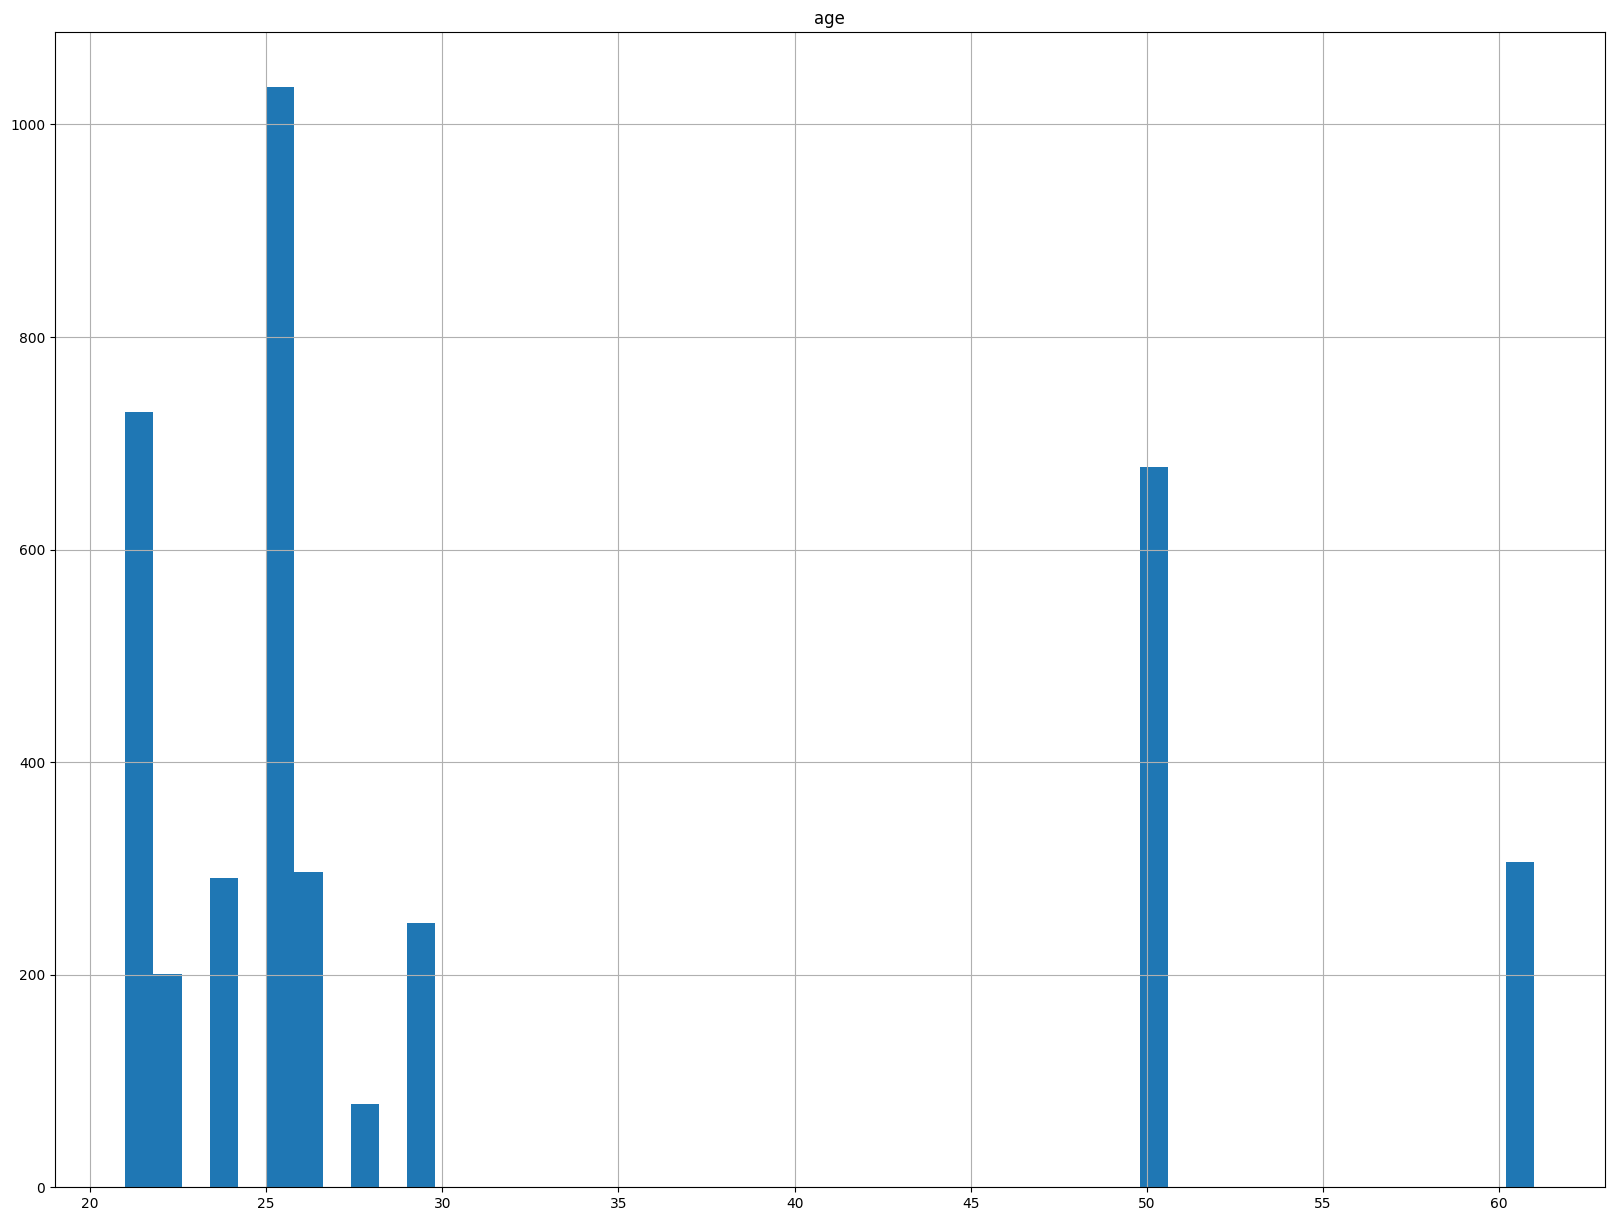

In [9]:
import matplotlib.pyplot as plt
df1_english.hist(bins=50, figsize=(20,15))
plt.show()

#Fixme: Test, Cross-Validation y Validation set. Acá es donde debería crear estos sets, si es que decido crearlos.

In [10]:
# Selecciono las dos columnas que me interesan
sentences_conan = df1_english[['hateSpeech', 'counterSpeech']]

sentences_conan

,hateSpeech,counterSpeech
0,"According to a recent OFSTED report, a school ...","To be fair, the OFSTED report is more concerne..."
1,In Birmingham there is a school where girls an...,"To be fair, the OFSTED report is more concerne..."
2,A school in Birningham is still separating gir...,"To be fair, the OFSTED report is more concerne..."
3,"According to a recent OFSTED report, a school ...",While this story is presented as an 'Islamic i...
4,In Birmingham there is a school where girls an...,While this story is presented as an 'Islamic i...
...,...,...
3859,Women of our culture that decide to become Isl...,"So you are suggesting Pakistan, Saudi Arabia, ..."
3860,White women converted to Islam are the saddest...,"So you are suggesting Pakistan, Saudi Arabia, ..."
3861,Those White women converting to Islam are the ...,Surely tolerance and understanding should exis...
3862,Women of our culture that decide to become Isl...,Surely tolerance and understanding should exis...


Hago una selección de únicamemente las contranarrativas (para armar el ránking que consiste en contranarrativas exclusivamente).

In [11]:
"""
# Selecciono la columna de contranarrativas
counternarratives_conan = df1_english[['counterSpeech']]
"""

"\n# Selecciono la columna de contranarrativas\ncounternarratives_conan = df1_english[['counterSpeech']]\n"

In [12]:

# Selecciono la columna de discursos de odio
hate_speech_conan = df1_english[['hateSpeech']]

In [13]:
hate_speech_conan

,hateSpeech
0,"According to a recent OFSTED report, a school ..."
1,In Birmingham there is a school where girls an...
2,A school in Birningham is still separating gir...
3,"According to a recent OFSTED report, a school ..."
4,In Birmingham there is a school where girls an...
...,...
3859,Women of our culture that decide to become Isl...
3860,White women converted to Islam are the saddest...
3861,Those White women converting to Islam are the ...
3862,Women of our culture that decide to become Isl...


Creo embeddings para los mensajes de odio y sus contranarrativas.

*Convierto* los dataframes en dos listas de strings (porque es lo que toma el modelo 'all-MiniLM-L6-v2'). Voy a eliminar los repetidos.


In [14]:
# Removes duplicates from a list preserving order:
def removeDuplicatesFromList(l):
  return list(dict.fromkeys(l).keys())

In [15]:
# Transforms a DataFrame to a list preserving order:
def dataFrameToList(df):
  return list(df.values.flatten())

In [16]:
"""
# convierto el dataframe en una lista sin repetidos
sentences_conan_list_sin_repetidos = removeDuplicatesFromList(list(sentences_conan.values.flatten()));
"""

'\n# convierto el dataframe en una lista sin repetidos\nsentences_conan_list_sin_repetidos = removeDuplicatesFromList(list(sentences_conan.values.flatten()));\n'

In [17]:
"""
counternarratives_conan_list_sin_repetidos = removeDuplicatesFromList(list(counternarratives_conan.values.flatten()));
"""

'\ncounternarratives_conan_list_sin_repetidos = removeDuplicatesFromList(list(counternarratives_conan.values.flatten()));\n'

In [18]:
hate_speech_conan_list_sin_repetidos = removeDuplicatesFromList(dataFrameToList(hate_speech_conan));

Fixme: acá podría chequear si sentences_conan_list_sin_repetidos y counternarratives_conan_list_sin_repetidos efectivamente no tienen repetidos.

In [19]:
"""
#Veo cuántos elementos tiene sentences_conan_list eliminado repetidos.
len(sentences_conan_list_sin_repetidos)
"""

'\n#Veo cuántos elementos tiene sentences_conan_list eliminado repetidos.\nlen(sentences_conan_list_sin_repetidos)\n'

In [20]:
"""
#Veo cuántos elementos tiene counternarratives_conan_list eliminado repetidos.
len(counternarratives_conan_list_sin_repetidos)
"""

'\n#Veo cuántos elementos tiene counternarratives_conan_list eliminado repetidos.\nlen(counternarratives_conan_list_sin_repetidos)\n'

In [21]:
"""
#Veo cuántos elementos tiene hate_speech_conan_list_sin_repetidos eliminado repetidos.
len(hate_speech_conan_list_sin_repetidos)
"""

'\n#Veo cuántos elementos tiene hate_speech_conan_list_sin_repetidos eliminado repetidos.\nlen(hate_speech_conan_list_sin_repetidos)\n'

In [22]:
"""
# Chequeo si da la suma:
len(sentences_conan_list_sin_repetidos) == len(counternarratives_conan_list_sin_repetidos) + len(hate_speech_conan_list_sin_repetidos)
"""

'\n# Chequeo si da la suma:\nlen(sentences_conan_list_sin_repetidos) == len(counternarratives_conan_list_sin_repetidos) + len(hate_speech_conan_list_sin_repetidos)\n'

##Genero los conjuntos disjuntos conjunto_sin_repetidos_contranarrativas_i, conjunto_sin_repetidos_contranarrativas_k, conjunto_sin_repetidos_odio_i y conjunto_sin_repetidos_odio_k.

In [23]:
def splitListInHalfAtRandom(list):  # Toma una lista list y devuevle dos listas de iugal tamaño, disjuntas, con los elementos de list.
  random.seed(4)
  random.shuffle(list)
  list1 = list[:int(len(list)/2)] 
  list2 = list[int(len(list)/2):]
  return list1, list2

### Genero los conjuntos disjuntos conjunto_sin_repetidos_contranarrativa_i, conjunto_sin_repetidos_contranarrativa_k, conjunto_sin_repetidos_odio_i y conjunto_sin_repetidos_odio_k.

In [24]:
# Given a DataFrame (dataFrame), the name of one 
# of it's columns (columnName) and a list of 
# values (values), it filters "dataFrame" by the
# column "columnName" usign "values".

def filterDataFrameByColumnValues(dataFrame, columnName, values):
  rslt_df = dataFrame[dataFrame[columnName].isin(values)] 
  return rslt_df

  

In [25]:
# Remueve de df todas las filas que tengan el valor "valor" en la columna "columna". 
def removeRowsFromDf(df, valor, columna):
    df.drop(df[df[columna] == valor].index, inplace = True)

In [26]:
# Hace que los DataFrames dataFrame1 y dataFrame2 sean
# disjuntos respecto a sus valores en las columnas 
# 'columnName'.
# Hace que list1 y list2 sean disjuntas.


def makeDisjoint(list1, list2, dataFrame1, dataFrame2, columnName):
    
    removeFromList1 = []
    removeFromList2 = []

    # traverse in the 1st list
    for x in list1:
 
        # traverse in the 2nd list
        for y in list2:
   
            # if one common
            if x == y and x not in removeFromList1 and x not in removeFromList2:
                if list1.count(x) == list2.count(x):
                    if len(removeFromList1) < len(removeFromList2):
                        removeFromList1.append(x)
                        removeRowsFromDf(dataFrame1, x, columnName)
                    else:
                        removeFromList2.append(x)
                        removeRowsFromDf(dataFrame2, x, columnName)
                else:
                    if list1.count(x) < list2.count(x):
                        removeFromList1.append(x)
                        removeRowsFromDf(dataFrame1, x, columnName)
                    else:
                        removeFromList2.append(x)
                        removeRowsFromDf(dataFrame2, x, columnName)

    resList1 = [i for i in list1 if i not in removeFromList1]
    resList2 = [i for i in list2 if i not in removeFromList2]

    return resList1, resList2

In [27]:
# Genera los conjuntos disjuntos Odio_i y Odio_k
# Y sus correspondientes conjuntos disjuntos de
# contranarrativas ContranarrativaI y ContranarrativaK

def generarConjuntosOdioIyKContranarrativaIyK ():
    iteracion = 1

    conjunto_sin_repetidos_odio_i = []
    conjunto_sin_repetidos_odio_k = []
    conjunto_sin_repetidos_contranarrativa_i = []
    conjunto_sin_repetidos_contranarrativa_k = []

    # Mientras conjunto_sin_repetidos_odio_i y conjunto_sin_repetidos_odio_k no tengan
    # aproximadamente el mismo tamaño y
    # Mientras conjunto_sin_repetidos_contranarrativa_i y 
    #conjunto_sin_repetidos_contranarrativa_k no tengan aproximadamente el mismo tamaño
    while iteracion == 1 or not (abs(len(conjunto_sin_repetidos_odio_i) - len(conjunto_sin_repetidos_odio_k)) < 10 and abs(len(conjunto_sin_repetidos_contranarrativa_i) - len(conjunto_sin_repetidos_contranarrativa_k)) < 20):
        
        print('Generando conjuntos Odios_i, Odios_k, Contranarrativas_i, Contranarrativas_k, iteración número: ', iteracion)
        iteracion +=1
        
        # Genero conjuntos disjuntos de odio_i y k, temporales (este paso es random):
        conjunto_sin_repetidos_odio_i_temp, conjunto_sin_repetidos_odio_k_temp = splitListInHalfAtRandom(hate_speech_conan_list_sin_repetidos)

        # Genero un DataFrame de odios y contranarrativas I:
        dfOdiosYContanarrativasI = filterDataFrameByColumnValues(sentences_conan, 'hateSpeech', conjunto_sin_repetidos_odio_i_temp)

        # Genero un DataFrame de odios y contranarrativas K:
        dfOdiosYContanarrativasK = filterDataFrameByColumnValues(sentences_conan, 'hateSpeech', conjunto_sin_repetidos_odio_k_temp)

        # Genero un DataFrame de contranarrativas I:
        df_contranarrativa_i = dfOdiosYContanarrativasI[['counterSpeech']]

        # Genero un DataFrame de contranarrativas K:
        df_contranarrativa_k = dfOdiosYContanarrativasK[['counterSpeech']]

        # Convierto los dataframes df_odio_i y df_odio_k en dos lista sin repetidos
        conjunto_sin_repetidos_contranarrativa_i = removeDuplicatesFromList(list(df_contranarrativa_i.values.flatten()));
        conjunto_sin_repetidos_contranarrativa_k = removeDuplicatesFromList(list(df_contranarrativa_k.values.flatten()));

        # Hago que conjunto_sin_repetidos_odio_i_temp y conjunto_sin_repetidos_odio_k_temp sean disjuntos:
        conjunto_sin_repetidos_contranarrativa_i, conjunto_sin_repetidos_contranarrativa_k = makeDisjoint(conjunto_sin_repetidos_contranarrativa_i, conjunto_sin_repetidos_contranarrativa_k, dfOdiosYContanarrativasI, dfOdiosYContanarrativasK, 'counterSpeech')

        #Obtengo el conjunto sin repetidos conjunto_sin_repetidos_odio_i
        hate_speech_conan_i = dfOdiosYContanarrativasI[['hateSpeech']]
        conjunto_sin_repetidos_odio_i = removeDuplicatesFromList(list(hate_speech_conan_i.values.flatten()));

        #Obtengo el conjunto sin repetidos conjunto_sin_repetidos_odio_k
        hate_speech_conan_k = dfOdiosYContanarrativasK[['hateSpeech']]
        conjunto_sin_repetidos_odio_k = removeDuplicatesFromList(list(hate_speech_conan_k.values.flatten()));
        
    # Fixme: dfOdiosYContanarrativasI y dfOdiosYContanarrativasK, sólo se devuelven para sanity checks.
    return conjunto_sin_repetidos_odio_i, conjunto_sin_repetidos_contranarrativa_i, conjunto_sin_repetidos_odio_k, conjunto_sin_repetidos_contranarrativa_k, dfOdiosYContanarrativasI, dfOdiosYContanarrativasK 

In [28]:
conjunto_sin_repetidos_odio_i, conjunto_sin_repetidos_contranarrativa_i, conjunto_sin_repetidos_odio_k, conjunto_sin_repetidos_contranarrativa_k, dfOdiosYContanarrativasI, dfOdiosYContanarrativasK = generarConjuntosOdioIyKContranarrativaIyK()

Generando conjuntos Odios_i, Odios_k, Contranarrativas_i, Contranarrativas_k, iteración número:  1


<ipython-input-25-41b67047ab7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df[columna] == valor].index, inplace = True)


Generando conjuntos Odios_i, Odios_k, Contranarrativas_i, Contranarrativas_k, iteración número:  2


<ipython-input-25-41b67047ab7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df[columna] == valor].index, inplace = True)


Generando conjuntos Odios_i, Odios_k, Contranarrativas_i, Contranarrativas_k, iteración número:  3


<ipython-input-25-41b67047ab7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df[columna] == valor].index, inplace = True)


In [29]:
len(conjunto_sin_repetidos_odio_i)

202

In [30]:
len(conjunto_sin_repetidos_contranarrativa_i)

639

In [31]:
len(conjunto_sin_repetidos_odio_k)

202

In [32]:
len(conjunto_sin_repetidos_contranarrativa_k)

631

In [33]:
dfOdiosYContanarrativasI

,hateSpeech,counterSpeech
2,A school in Birningham is still separating gir...,"To be fair, the OFSTED report is more concerne..."
8,A school in Birningham is still separating gir...,The quoted report refers to 'countless faith s...
12,The police and politicians are covering up the...,We need to work together to eradicate CSE once...
13,Muslims grooming gangs are protected by the go...,We need to work together to eradicate CSE once...
14,The police and the government are defending mu...,We need to work together to eradicate CSE once...
...,...,...
3836,Muslims have immoral costums and they abuse wo...,Why do you say that they are never taken respo...
3842,White women converted to Islam are the saddest...,One could say the same about White men slammin...
3848,White women converted to Islam are the saddest...,I would not call it sad or self loathing to jo...
3854,White women converted to Islam are the saddest...,Muslim women face discrimination and prejudice...


In [34]:
dfOdiosYContanarrativasK

,hateSpeech,counterSpeech
3,"According to a recent OFSTED report, a school ...",While this story is presented as an 'Islamic i...
4,In Birmingham there is a school where girls an...,While this story is presented as an 'Islamic i...
9,"According to a recent OFSTED report, a school ...",Gender segregation in faith schools is clearly...
10,In Birmingham there is a school where girls an...,Gender segregation in faith schools is clearly...
38,The BBC is covering Muslims: in Paris there wa...,Is this true? Where is your source?
...,...,...
3850,Women of our culture that decide to become Isl...,Islam is that same sisterhood of tolerance and...
3855,Those White women converting to Islam are the ...,Maybe that 'sisterhood of tolerance and unders...
3856,Women of our culture that decide to become Isl...,Maybe that 'sisterhood of tolerance and unders...
3861,Those White women converting to Islam are the ...,Surely tolerance and understanding should exis...


# **Generación de embeddings.**

##Genero los embeddings de los discursos de odio a partir de la lista de discursos de odio sin repetidos.

In [35]:
# Toma un modelo de sentence embedding, un conjunto de frases y un nombre de archivo
# y genera embeddings para las frases y las guarda en un archivo. 
def generar_embeddings(model, modelName, conjunto_de_frases, nombre_de_archivo):
  #  los embeddings y los guardo en el disco. 

  embeddings = model.encode(conjunto_de_frases, convert_to_tensor=True);

  # Store embeddings on disc
  with open(modelName + '_' + nombre_de_archivo + '.pkl', "wb") as fOut:
      pickle.dump({'embeddings': nombre_de_archivo}, fOut, protocol=pickle.HIGHEST_PROTOCOL)
  
  return embeddings

# Funciones útiles para calclar las funciones de navegación:

## NmaxelementsHeap:

In [36]:
# Function returns N largest elements and the position they have in the input list.
def NmaxelementsHeap(list1, N):
  
  listOfPairs =[]
  for i in range(len(list1)):
    listOfPairs.append((-1*list1[i], i)); #fixme: importante: multiplico cada elemento de list1 por -1 para poder usar un minHeap como si fuese un max heap
  
  resNegative = heapq.nsmallest(N, listOfPairs, key=lambda x: x[0]) 
  
  res = [];
  for i in range(len(resNegative)):
    res.append((-1*resNegative[i][0], resNegative[i][1])); #fixme: importante: multiplico cada elemento de list1 por -1 para poder usar un minHeap como si fuese un max heap
  
  return(res)

# **Función de navegación estándar:**

## Aplico función de navegación estándar usando producto matricial:

Voy a calcular todos los embeddings a mano (contranarrativa_i - odio_i + odio_k) y los voy a guardar en una matriz (en un tensor de 2 dimensiones (cantidad_de_mbeddings_calculados_a_mano x tamaño_embedding). Luego voy a llamar a cos_sim con esta matriz como primer parámetro parámetro y los embeddings de todas las contranarrativas como segúndo parámetro, espero que me devuelva una matriz de dos dimensiones (cantidad_de_mbeddings_calculados_a_mano x cantidad_contranarrativas), donde cada posición indique la cos_sim entre el embedding_calculado_a_mano_i y la contranarrativa_j.

En el siguiente docx, hay notas sobre los tiempos de ejecución de la función funcionDeNavegacionEstandarParticion: https://docs.google.com/document/d/1dxCpEnVDqRsrn5ha-l5xrpEX6v0SNzaTQzc5TWyL4Is/edit

In [37]:
# Esta función genera los rankings, eligiendo contranarrativa_i, odio_i y odio_k de la siguiente manera:
  # contranarativa_i: está en el rango conjunto_sin_repetidos_contranarrativa_i[contranarrativa_i_limite_inferior : contranarrativa_i_limite_superior];
  # odio_i: itera por todos los discursos de odio en conjunto_sin_repetidos_odio_i.
  # odio_k: itera por todos los valores de conjunto_sin_repetidos_odio_k.

def funcionDeNavegacionEstandarParticion(modelName, contranarrativa_i_limite_inferior, contranarrativa_i_limite_superior, embeddings_counternarratives_i, embeddings_counternarratives_k, embeddings_hate_speech_i, embeddings_hate_speech_k, ret = False):
  # Hago el setup de algunos parámetros:

  #Borrar metrica1.csv si ya está creado (Fixme: pensar si lo tengo que borrar).
  start_calculo_funcion_navegacion_estandar_matricial = time.time()
  
  lista_embeddings_calculados_a_mano = []
  indices_contranarrativa_i_odio_i_odio_k = []
  iteraciones = 0;
  cantidad_discursos_odio_k_iterados_matricial = len(conjunto_sin_repetidos_odio_k)  # fixme: debe ser len(hate_speech_conan_list_sin_repetidos) para no estropear el orden al llamar muchas veces a esta función (funcionDeNavegacionEstandarParticion).
                                                                                          # junto a cantidad_contranarrativas_iteradas_matricial determina la parte del dataset en la que se aplica la función de navegación estándar.
  
  # fixme: las siguientes listas son sólo para sanity check, una vez realizados los chequeos, se pueden comentar:
  lista_pares_navegacion_estandar_top10_matricial = []
  lista_pares_navegacion_estandar_top10_random = []
  lista_contranarrativa_i_embedding_matricial = []
  df_odio_en_conan_list_matricial = []
  odio_i_lista_sanity_check_matricial = []
  lista_listas_odio_i_embedding_matricial = []
  lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_matricial = []
  lista_listas_listas_odio_k_embedding_creado_por_lista_matricial = []
  #Fixme: cuando esté terminado unificar los nombres de los índices.

  # Fixme: creo que estos dos filtrados podrían hacerse fuera de esta función, cuando 
  # temrine todo, sacalros y ver si sigue funcionando.
  # Filtro dfOdiosYContanarrativasI, tal que los mensajes de odio, aparezcan en conjunto_sin_repetidos_odio_i
  df_odio_conjunto_sin_repetidos_odio_i = dfOdiosYContanarrativasI[dfOdiosYContanarrativasI['hateSpeech'].isin(conjunto_sin_repetidos_odio_i)]
  
  # Filtro las contranarrativas en conan para odio_k, tal que aparezcan en conjunto_sin_repetidos_contranarrativa_k
  df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k = dfOdiosYContanarrativasK[dfOdiosYContanarrativasK['counterSpeech'].isin(conjunto_sin_repetidos_contranarrativa_k)] #fixme: esta línea me hace ruido.
  
  for contranarrativa_i_indice in range(contranarrativa_i_limite_inferior, contranarrativa_i_limite_superior): #fixme: lo que modifico es esto, antes decía: for contranarrativa_i_indice in range(0, len(counternarratives_conan_list_sin_repetidos)):
    # store iteration start timestamp
    start_calculo_cos_sim = time.time()
    
    # contranarrativa_i_indice será el índice de la contranarrativa_i.
    #selecciono el embedding de la contranarrativa_i
    contranarrativa_i_embedding = embeddings_counternarratives_i[contranarrativa_i_indice];
    lista_contranarrativa_i_embedding_matricial.append(contranarrativa_i_embedding) # fixme: sólo para sanity check

    # Busco los discursos de odio para la contranarrativa_i
    df_oido_conjunto_sin_repetidos_odio_i_para_contranarrativa_i = df_odio_conjunto_sin_repetidos_odio_i.loc[df_odio_conjunto_sin_repetidos_odio_i['counterSpeech'] == conjunto_sin_repetidos_contranarrativa_i[contranarrativa_i_indice], 'hateSpeech'] 
    df_odio_en_conan_list_matricial.append(df_oido_conjunto_sin_repetidos_odio_i_para_contranarrativa_i) # fixme: sólo para sanity check

    # Elijo cada uno de los discursos de odio que aparecen en Conan para la conranarrativa_i (los llamo odio_i). 
    lista_odio_i_embedding_matricial = [] #fixme: solo para sanity check
    lista_embedding_contranarrativa_i_sin_discurso_de_odio_i_matricial = []   #fixme: solo para sanity check
    lista_odio_i_para_contranarrat_i_matricial = [] # fixme: solo para sanity check
    lista_listas_odio_k_embedding_creado_por_lista_matricial = [] # fixme: solo para sanity check
    
    for ind in  df_oido_conjunto_sin_repetidos_odio_i_para_contranarrativa_i.index:
      odio_i = df_oido_conjunto_sin_repetidos_odio_i_para_contranarrativa_i.loc[ind]
      lista_odio_i_para_contranarrat_i_matricial.append(odio_i) # fixme: sólo para sanity check

      # Busco el índice de odio_i en conjunto_sin_repetidos_odio_i.
      indice_odio_i = conjunto_sin_repetidos_odio_i.index(odio_i)

      # Busco el embedding para odio_i  
      odio_i_embedding = embeddings_hate_speech_i[indice_odio_i]
      lista_odio_i_embedding_matricial.append(odio_i_embedding) #fixme: solo para sanity check

      # Resto el embedding de odio_i al de contranarrativa_i.
      embedding_contranarrativa_i_sin_discurso_de_odio_i = contranarrativa_i_embedding - odio_i_embedding
      lista_embedding_contranarrativa_i_sin_discurso_de_odio_i_matricial.append(embedding_contranarrativa_i_sin_discurso_de_odio_i) #fixme: solo para sanity check

      lista_odio_k_embedding_creado_por_lista_matricial = [] # fixme: solo para sanity check
    
      for odio_k_indice in range(0, cantidad_discursos_odio_k_iterados_matricial): # como máximo puede iterar hasta len(conjunto_sin_repetidos_odio_k)
        odio_k = conjunto_sin_repetidos_odio_k[odio_k_indice]

        # Busco el embedding de odio_k embedding
        odio_k_embedding = embeddings_hate_speech_k[odio_k_indice];
        lista_odio_k_embedding_creado_por_lista_matricial.append(odio_k_embedding) #fixme: solo para sanity check

        # Sumo el embedding de odio_K a embedding_contranarrativa_i_sin_discurso_de_odio_i.
        embedding_cercano_a_contranarrativa_para_odio_k = embedding_contranarrativa_i_sin_discurso_de_odio_i + odio_k_embedding

        # Appendeo el embedding calculado en el paso anterior al tensor de embeddings:
        lista_embeddings_calculados_a_mano.append(embedding_cercano_a_contranarrativa_para_odio_k)

        # Guardo una tripla con los ínidces de las contranarrativas y discursos de odio que se usaron en esta iteración:
        # (contranarrativa_i, odio_i, odio_k)
        indices_contranarrativa_i_odio_i_odio_k.append((contranarrativa_i_indice, indice_odio_i, odio_k_indice))
        
        #Imprimo estatus de estar corriendo:
        if(iteraciones % 10000 == 0):
            print('Generando los rankings con la función de navegación estándar, iteración número', iteraciones);
        iteraciones += 1;
      lista_listas_odio_k_embedding_creado_por_lista_matricial.append(lista_odio_k_embedding_creado_por_lista_matricial) # fixme: solo para sanity check

    lista_listas_listas_odio_k_embedding_creado_por_lista_matricial.append(lista_listas_odio_k_embedding_creado_por_lista_matricial) # fixme: solo para sanity check
    odio_i_lista_sanity_check_matricial.append(lista_odio_i_para_contranarrat_i_matricial) # fixme: sólo para sanity check
    lista_listas_odio_i_embedding_matricial.append(lista_odio_i_embedding_matricial) #fixme: sólo para sanity check
    lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_matricial.append(lista_embedding_contranarrativa_i_sin_discurso_de_odio_i_matricial) #fixme: sólo para sanity check

  # store iteration end timestamp
  end_calculo_cos_sim = time.time()  
  # store iteration start timestamp
  start_armado_de_funcion_de_navegacion_estandar = time.time()

  # transformo la lista de embeddings en una matriz de embeddings (pytorch.tensor)
  matriz_de_embeddings_calculados_a_mano = torch.stack(lista_embeddings_calculados_a_mano,0)

  # Elimino la lista de embeddings para liberar memoria
  del(lista_embeddings_calculados_a_mano)

  #Fixme: la función util.cos_sim es lo que más demora, asegurarse de que se calcula en la GPU.
  # Calculo la cos_sim utilizando la matriz de embeddings
  cos_sim_calculado_con_matriz = util.cos_sim(matriz_de_embeddings_calculados_a_mano, embeddings_counternarratives_k) #Fixme: reemplazo embeddings_counternarratives_conan_list_sin_repetidos_creado_por_lista por embeddings_counternarratives_k, estoy casi seguro que va esto y que no va embeddings_counternarratives_i.

  #Elimnimo la matriz de embeddings
  del(matriz_de_embeddings_calculados_a_mano)

  #fixme: sólo para medir tiempos, una vez optimizado, borrar
  demora_busqueda_contranarrativas_odio_k = 0
  demora_llamado_a_Nmaxelements = 0
  demora_primera_parte_calculo_funcion_de_navegacion_estandar_matricial = 0
  demora_segunda_parte_calculo_funcion_de_navegacion_estandar_matricial = 0
  demora_contar_aciertos_funcion_de_navegacion_estandar = 0
  demora_guardar_resultado_en_csv = 0

  print(f"El cálculo de cos_sim usando el método matricial: {(end_calculo_cos_sim-start_calculo_cos_sim)*10**3:.03f}ms")
  print('Matriz de cos_sim calculada con el método matricial, armando el resto de la función de navegación estándar...')

  #Itero por la matriz_de_embeddings_calculados_a_mano armando los rankings:

  # writing funcionDeNavegacionEstandar to csv file:
  # field names
  fields = ['Contranarrativa_i', 'Odio_i', 'Odio_k', 'Contranarrativas para Odio_k en el ranking', 'Cantidad de contranarrativas que existen para Odio_k', 'Top 1 Contranarrativa (cos_sim, index)', 'Top 2 Contranarrativa (cos_sim, index)', 'Top 3 Contranarrativa (cos_sim, index)', 'Top 4 Contranarrativa (cos_sim, index)', 'Top 5 Contranarrativa (cos_sim, index)', 'Top 6 Contranarrativa (cos_sim, index)', 'Top 7 Contranarrativa (cos_sim, index)', 'Top 8 Contranarrativa (cos_sim, index)', 'Top 9 Contranarrativa (cos_sim, index)', 'Top 10 Contranarrativa (cos_sim, index)']
  fieldsRandom = ['Contranarrativa_i', 'Odio_i', 'Odio_k', 'Contranarrativas para Odio_k en el ranking', 'Cantidad de contranarrativas que existen para Odio_k', 'Top 1 Contranarrativa (cos_sim, index)', 'Top 2 Contranarrativa (cos_sim, index)', 'Top 3 Contranarrativa (cos_sim, index)', 'Top 4 Contranarrativa (cos_sim, index)', 'Top 5 Contranarrativa (cos_sim, index)', 'Top 6 Contranarrativa (cos_sim, index)', 'Top 7 Contranarrativa (cos_sim, index)', 'Top 8 Contranarrativa (cos_sim, index)', 'Top 9 Contranarrativa (cos_sim, index)', 'Top 10 Contranarrativa (cos_sim, index)']

  # name of csv file
  filename1 = modelName + "_funNavEstandarTop10ParticionContranarrativa" + str(contranarrativa_i_limite_inferior) + "a" + str(contranarrativa_i_limite_superior -1) + ".csv"
  filename2 = modelName + "_funNavEstandarTop10RandomContranarrativa" + str(contranarrativa_i_limite_inferior) + "a" + str(contranarrativa_i_limite_superior -1) + ".csv"

  with open(filename1, 'w') as csvfile:
    # creating a csv writer object
    csvwriterFunNavegacionEstandarTop10 = csv.writer(csvfile)
    # writing the fields
    csvwriterFunNavegacionEstandarTop10.writerow(fields)
  
    #Fixme: esto está feo, ver de refactorear (Problema: quiero escribir en múltiples csv a la vez, tengo que crear los distintos csv writers, me gustaría que )
    with open(filename2, 'w') as csvfile:
      # creating a csv writer object
      csvwriterFunNavegacionEstandarTop10Random = csv.writer(csvfile)
      # writing the fields
      csvwriterFunNavegacionEstandarTop10Random.writerow(fieldsRandom)

      for indice_tripla_i in range(0,len(indices_contranarrativa_i_odio_i_odio_k)):
        start_primera_parte_calculo_funcion_de_navegacion_estandar_matricial = time.time()
        # Busco el tensor correspondiente a la i_ésima tripla (contranarrativa_i, odio_i, odio_k). 
        cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_y_tripla_i = cos_sim_calculado_con_matriz[indice_tripla_i]

        #Elimino cos_sim de esta iteración: Fixe: cuando termine de iterar por toda cos_sim_calculado_con_matriz generando los rankings, la tengo que eliminar
        #del(cos_sim_calculado_con_matriz)

        #transformo el tensor con las cos_sim en una lista con las cos_sim (fixme: quizás esta transformación podría evitarse, pero me parece más claro cómo eliminar un elemento de una lsita que de un tensor).
        lista_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_y_tripla_i = cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_y_tripla_i.tolist()

        end_primera_parte_calculo_funcion_de_navegacion_estandar_matricial = time.time()
        demora_primera_parte_calculo_funcion_de_navegacion_estandar_matricial += (end_primera_parte_calculo_funcion_de_navegacion_estandar_matricial-start_primera_parte_calculo_funcion_de_navegacion_estandar_matricial)

        # store iteration start timestamp
        start_llamado_a_Nmaxelements = time.time()
        # Calculo  (cos_sim, índice) de las top 10 contranarrativas para odio k (calculadas a partir de la tripla (contranarrativa_i, odio_i, odio_k)), abajo se le agrega un elemento a la trípla.
        ranking10MejoresContranarrativasParaOdioKYTriplaI = NmaxelementsHeap(lista_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_y_tripla_i, 10)
        # store iteration end timestamp
        end_llamado_a_Nmaxelements = time.time()
        #Calculo la demora de labúsqueda de contranarrativas para odio_k para esta iteración.
        demora_llamado_a_Nmaxelements += end_llamado_a_Nmaxelements-start_llamado_a_Nmaxelements

        start_segunda_parte_calculo_funcion_de_navegacion_estandar_matricial = time.time()


        # Busco las top 10 contranarrativas (busco efectivamente los strings, no los índices).
        counternarratives_ranking_list_top10_matricial =[]
        for score, l in ranking10MejoresContranarrativasParaOdioKYTriplaI: #fixme: mega importante, chequear que el rango [0:10] son 10 resultados y no 11.
            counternarratives_ranking_list_top10_matricial.append(conjunto_sin_repetidos_contranarrativa_k[l]) #  Fixme: prestar atención a esta línea, reemplacé counternarratives_conan_list_sin_repetidos por conjunto_sin_repetidos_contranarrativa_k

        #Fixme: acá puedo eliminar código repetido:
        #Genero un top 10 con contranarrativas tomadas al azar
        #Fixme: quisiera que esto sea determinístico, pero si le pongo  un random.seed(0), me devuelve para todas las combinaciones de odio_i, contranarrativa_i y odio_k, el mismo ranking.
        counternarratives_ranking_list_top10_random_matricial = random.sample(conjunto_sin_repetidos_contranarrativa_k, 10) #  Fixme: prestar atención a esta línea, reemplacé counternarratives_conan_list_sin_repetidos por conjunto_sin_repetidos_contranarrativa_k

        rankingRandom10MejoresContranarrativasParaOdioKYTriplaI = []
        for counterNarrative in counternarratives_ranking_list_top10_random_matricial:
            rankingRandom10MejoresContranarrativasParaOdioKYTriplaI.append((conjunto_sin_repetidos_contranarrativa_k.index(counterNarrative),))
        #Fixme: acá puedo eliminar código repetido:
        # Calculo la función de navegación estándar para el caso contranarrativa_i, odio_i, odio_k y ranking de 10 contranarrativas 
        # y la guardo en la lista_pares_navegacion_estandar_top10. 
        # Además calclo la función de navegación estándar para el ranking de 10 contranarrativas random.

        # Primero calculo los indices de contranarrativa_i, odio_i y odio_k a partir de las triplas
        tripla_iterada = indices_contranarrativa_i_odio_i_odio_k[indice_tripla_i]
        indice_contranarrativa_i = tripla_iterada[0]
        indice_odio_i = tripla_iterada[1]
        indice_odio_k = tripla_iterada[2]
        odio_k = conjunto_sin_repetidos_odio_k[indice_odio_k]


        end_segunda_parte_calculo_funcion_de_navegacion_estandar_matricial = time.time()
        demora_segunda_parte_calculo_funcion_de_navegacion_estandar_matricial += (end_segunda_parte_calculo_funcion_de_navegacion_estandar_matricial - start_segunda_parte_calculo_funcion_de_navegacion_estandar_matricial)


        # store iteration start timestamp
        start_busqueda_contranarrativas_para_odio_k = time.time()
        # Busco las contranarrativas para odio_k        
        df_contranarrativas_en_conan_para_odio_k_matricial = df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k.loc[df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k['hateSpeech'] == odio_k, 'counterSpeech'] #fixme: ojo con esto, tengo que chequear que el hate speech que me interesa es efectivamente odio_k_sacado_de_lista_de_triplas. No sé si este fixme tiene algún sentido..

        # store iteration end timestamp
        end_busqueda_contranarrativas_para_odio_k = time.time()
        #Calculo la demora de labúsqueda de contranarrativas para odio_k para esta iteración.
        demora_busqueda_contranarrativas_odio_k += end_busqueda_contranarrativas_para_odio_k-start_busqueda_contranarrativas_para_odio_k
        
        start_contar_aciertos_funcion_de_navegacion_estandar = time.time()
        funcionDeNavegacionEstandar_matricial = 0;
        funcionDeNavegacionEstandar_random_top10_matricial = 0;

        for m in range(0,len(counternarratives_ranking_list_top10_matricial)):
          if counternarratives_ranking_list_top10_matricial[m] in df_contranarrativas_en_conan_para_odio_k_matricial.values:
              funcionDeNavegacionEstandar_matricial += 1;
              #fixme: tengo que crear una nueva tupla y pisar la vieja porque las tuplas son ininutables, me gustaría no tener que crear una nueva tupla y modificarla in place (necesito buscar una nueva estructura para almacenar los datos).
              ranking10MejoresContranarrativasParaOdioKYTriplaI[m] = ranking10MejoresContranarrativasParaOdioKYTriplaI[m] + (1,) # indica que la contranarrativa en la posición m del ranking top 10 es una contranarrativa para odio_km, la tripla queda (cos_sim, índice, 1).
          else:
              #fixme: tengo que crear una nueva tupla y pisar la vieja porque las tuplas son ininutables, me gustaría no tener que crear una nueva tupla y modificarla in place (necesito buscar una nueva estructura para almacenar los datos).
              ranking10MejoresContranarrativasParaOdioKYTriplaI[m] = ranking10MejoresContranarrativasParaOdioKYTriplaI[m] + (0,) # indica que la contranarrativa en la posición m del ranking top 10 no es una contranarrativa para odio_k, la tripla queda (cos_sim, índice, 0)
        
        for m in range(0,len(counternarratives_ranking_list_top10_random_matricial)):
          if counternarratives_ranking_list_top10_random_matricial[m] in df_contranarrativas_en_conan_para_odio_k_matricial.values:
              funcionDeNavegacionEstandar_random_top10_matricial += 1;
              #fixme: tengo que crear una nueva tupla y pisar la vieja porque las tuplas son ininutables, me gustaría no tener que crear una nueva tupla y modificarla in place (necesito buscar una nueva estructura para almacenar los datos).
              rankingRandom10MejoresContranarrativasParaOdioKYTriplaI[m] = rankingRandom10MejoresContranarrativasParaOdioKYTriplaI[m] + (1,) # indica que la contranarrativa en la posición m del ranking top 10 es una contranarrativa para odio_km, la tripla queda (cos_sim, índice, 1).
          else:
              #fixme: tengo que crear una nueva tupla y pisar la vieja porque las tuplas son ininutables, me gustaría no tener que crear una nueva tupla y modificarla in place (necesito buscar una nueva estructura para almacenar los datos).
              rankingRandom10MejoresContranarrativasParaOdioKYTriplaI[m] = rankingRandom10MejoresContranarrativasParaOdioKYTriplaI[m] + (0,) # indica que la contranarrativa en la posición m del ranking top 10 es no una contranarrativa para odio_km, la tripla queda (cos_sim, índice, 0).

        end_contar_aciertos_funcion_de_navegacion_estandar = time.time()
        demora_contar_aciertos_funcion_de_navegacion_estandar += (end_contar_aciertos_funcion_de_navegacion_estandar - start_contar_aciertos_funcion_de_navegacion_estandar)

        
        #Fixme: creo que lista_pares_navegacion_estandar_top10_matricial y lista_pares_navegacion_estandar_top10_random. sólo las uso para sanity check, si es así, las puedo borrar.
        lista_pares_navegacion_estandar_top10_matricial.append(('Contranarrativa_i, está en la posición', indice_contranarrativa_i,'en counternarratives_conan_list_sin_repetidos. Odio_i está en la posición numero', indice_odio_i, 'en hate_speech_conan_list_sin_repetidos.', 'Para el mensaje de odio en la posición', indice_odio_k,' en hate_speech_conan_list_sin_repetidos, el ranking de 10 contranarrativas contiene', funcionDeNavegacionEstandar_matricial, 'de las', df_contranarrativas_en_conan_para_odio_k_matricial.shape[0],'contranarrativas que existen en el conan para ese discurso de odio'))
        lista_pares_navegacion_estandar_top10_random.append(('Contranarrativa_i, está en la posición', indice_contranarrativa_i,'en counternarratives_conan_list_sin_repetidos. Odio_i está en la posición numero', indice_odio_i, 'en hate_speech_conan_list_sin_repetidos.', 'Para el mensaje de odio en la posición', indice_odio_k,' en hate_speech_conan_list_sin_repetidos, el ranking de 10 contranarrativas random contiene', funcionDeNavegacionEstandar_random_top10_matricial, 'de las', df_contranarrativas_en_conan_para_odio_k_matricial.shape[0],'contranarrativas que existen en el conan para ese discurso de odio'))

        start_guardar_resultado_en_csv = time.time()
        # Write the iteration into a .csv:
        # creating this iteration row:
        row_funcion_de_navegacion_estandar_top_10_matricial = [indice_contranarrativa_i, indice_odio_i, indice_odio_k, funcionDeNavegacionEstandar_matricial, df_contranarrativas_en_conan_para_odio_k_matricial.shape[0]]
        row_funcion_de_navegacion_estandar_top_10_matricial.extend(ranking10MejoresContranarrativasParaOdioKYTriplaI) # Agrergo explícitamente el ranking de las 10 contranarrativas.
        row_funcion_de_navegacion_estandar_top_10_random = [indice_contranarrativa_i, indice_odio_i, indice_odio_k, funcionDeNavegacionEstandar_random_top10_matricial, df_contranarrativas_en_conan_para_odio_k_matricial.shape[0]]
        row_funcion_de_navegacion_estandar_top_10_random.extend(rankingRandom10MejoresContranarrativasParaOdioKYTriplaI) # Agrergo explícitamente el ranking de las 10 contranarrativas.
        
        # writing this iteration rows:
        csvwriterFunNavegacionEstandarTop10.writerow(row_funcion_de_navegacion_estandar_top_10_matricial)
        csvwriterFunNavegacionEstandarTop10Random.writerow(row_funcion_de_navegacion_estandar_top_10_random)
        end_guardar_resultado_en_csv = time.time()
        demora_guardar_resultado_en_csv += end_guardar_resultado_en_csv - start_guardar_resultado_en_csv
      
      # store iteration end timestamp
      end_armado_de_funcion_de_navegacion_estandar = time.time()  

      end_calculo_funcion_de_navegacion_estandar_matricial = time.time()
      print(f"La función de navegación estándar con el método matricial, demora: {(end_calculo_funcion_de_navegacion_estandar_matricial-start_calculo_funcion_navegacion_estandar_matricial)*10**3:.03f}ms. Compuestos por:")

      print(f"El cálculo de cos_sim usando el método matricial: {(end_calculo_cos_sim-start_calculo_cos_sim)*10**3:.03f}ms")
      print(f"El armado de la función de navegación estándar: {(end_armado_de_funcion_de_navegacion_estandar-start_armado_de_funcion_de_navegacion_estandar)*10**3:.03f}ms. Que a su vez, está compesta por:")
      print(f"La primera parte, demora: {(demora_primera_parte_calculo_funcion_de_navegacion_estandar_matricial)*10**3:.03f}ms.")
      print(f"Todos los llamados a NmaxelementsHeap, demoran: {(demora_llamado_a_Nmaxelements)*10**3:.03f}ms.")
      print(f"La segunda parte, demora: {(demora_segunda_parte_calculo_funcion_de_navegacion_estandar_matricial)*10**3:.03f}ms.")
      print(f"Busqueda contranarrativas para todos los odio_k, demora: {(demora_busqueda_contranarrativas_odio_k)*10**3:.03f}ms.")
      print(f"Contar aciertos de la función de navegación estándar, demora: {(demora_contar_aciertos_funcion_de_navegacion_estandar)*10**3:.03f}ms.")
      print(f"Guardar los resultados en el csv, demora: {(demora_guardar_resultado_en_csv)*10**3:.03f}ms.")
  # fixme: comentar este return luego de pasar los sanity checks para liberar memoria y porque el return demora mucho:
  if (ret):
    print ('The return is activated.')
    return lista_contranarrativa_i_embedding_matricial, df_odio_en_conan_list_matricial, odio_i_lista_sanity_check_matricial, lista_listas_odio_i_embedding_matricial, lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_matricial, lista_listas_listas_odio_k_embedding_creado_por_lista_matricial, indices_contranarrativa_i_odio_i_odio_k, cos_sim_calculado_con_matriz, lista_pares_navegacion_estandar_top10_matricial; #fixme: este return es sólamente para sanity checks, lo que importa de esta función,
       # es lo que escribe en los .csv.

In [38]:
# (tope_superior <= len(conjunto_sin_repetidos_contranarrativa_i)), de a batches de tamaño cant_elems_particion.
#fixme: en colab se está bancando cant_elems_particion = 50. 
def correr_funcion_de_navegacion_estandar(modelName, cant_elems_particion, tope_superior, embeddings_counternarratives_i, embeddings_counternarratives_k, embeddings_hate_speech_i, embeddings_hate_speech_k):

  largo_particion_extra =  tope_superior % cant_elems_particion
  cantidad_de_particiones_con_cant_elems_elementos = tope_superior // cant_elems_particion
  cantidad_de_particiones_totales = cantidad_de_particiones_con_cant_elems_elementos + (largo_particion_extra != 0)
  
  print('Se correrá la función de navegación estándar sobre las primeras', tope_superior, 'contranarrativas de counternarratives_conan_list_sin_repetidos.')
  print('Cantidad de paritciones con', cant_elems_particion, 'elementos:', cantidad_de_particiones_con_cant_elems_elementos)
  print('Cantidad de elementos de la última partición:',largo_particion_extra)
  print('Cantidad de particiones totales:', cantidad_de_particiones_totales);
  
  for i in range (0, cantidad_de_particiones_totales-1):
    print('Corriendo partición número', i+1,'de ', cantidad_de_particiones_totales)
    limite_inferior = i* cant_elems_particion
    print('limite_inferior:', limite_inferior)
    limite_superior = limite_inferior + cant_elems_particion 
    print('limite_superior:', limite_superior)
    funcionDeNavegacionEstandarParticion(modelName, limite_inferior, limite_superior, embeddings_counternarratives_i, embeddings_counternarratives_k, embeddings_hate_speech_i, embeddings_hate_speech_k, ret = False);

  print('Corriendo partición número', cantidad_de_particiones_totales,'de ', cantidad_de_particiones_totales)
  ultimo_limite_iferior = (cantidad_de_particiones_totales-1) * cant_elems_particion
  print('ultimo_limite_iferior:', ultimo_limite_iferior);
  ultimo_limite_superior = tope_superior;
  print('ultimo_limite_superior:', ultimo_limite_superior);
  funcionDeNavegacionEstandarParticion(modelName, ultimo_limite_iferior, ultimo_limite_superior, embeddings_counternarratives_i, embeddings_counternarratives_k, embeddings_hate_speech_i, embeddings_hate_speech_k, ret = False);

Fixme: En el siguiente docx, están las anotaciones de los tiempos de ejecución de la correr_funcion_de_navegacion_estandar: 
https://docs.google.com/document/d/1EWoRxJ9LCjUJ2ir28Q2usCLc9FXUf5nZPaGLVMriPUo/edit#heading=h.2a9llost7uh9

indice_contranarrativa_i 1
indice_odio_i 0
indice_odio_k 84

# Función de navegación basada en centroides:

In [39]:
print('Calculando función de navegación basada en centroides')

Calculando función de navegación basada en centroides


In [40]:
# Toma dos conjuntos de embeddings, calcula sus respectivos centroides y devuelve
# el desplazamiento entre los mismos (centroide_a - centroide_b).

def desplazamientoCentroides(embeddings_a, embeddings_b):
  if(embeddings_a.shape[1] != embeddings_b.shape[1]):
    print("The embeedings of the sets, must have the same dimention.")
    return 1/0  #Fixme: buscar forma más linda de levantar error.
  
  # Calculate the centroids of each set:
  centroid_a = torch.mean(embeddings_a, 0)
  centroid_b = torch.mean(embeddings_b, 0)

  # Calculate the "desplazamiento" vector:
  desplazamiento = centroid_a - centroid_b
  
  return desplazamiento

## Fin Tests para función de navegación basada en centroides.

In [41]:
# Dado un conjunto de embeddings de discursos de odio_i, odio_k,
# contranarrativas_i y contranarrativas_k: Para cada uno de los discursos de odio
# pertenecientes a odio_k, arma un ranking de 10 contranarrativas  pertenecientes
# a contranarrativas_k. Además genera rankings random para comparar resultados.
# Los resultados los guarda en los archivos:
#  filename1 = modelName + "_funNavCentroidesTop10" + ".csv"
#  filename2 = modelName + "_funNavCentroidesTop10Random" + ".csv"

# Esta función genera los rankings de la siguiente manera:
# 1. Toma los embeddings del conjunto de embeddings de contranarrativas_i
# (conjunto_embeddings_contranarranarrativas_i) y calcula su centroide.
# 2. Toma los embeddings del conjunto de embeddings de hatespeech_i
# (conjunto_embeddings_odio_i) y calcula su centroide.
# 3. Calcúla el ''desplazamiento'' entre estos dos conjuntos restando sus centroides, 
# es decir: desplazamiento_centroide = centroid_counternarrative_i - centroid_hate_speech_i
# Dado un nuevo discurso de odio_k, le suma el desplazamiento_centroide y finalmente
# busca las contranarrativas más cercanas a ese resultado (las busca en el conjunto
# de contranarrativas_k).

def funcionDeNavegacionBasadaEnCentroides(modelName, conjunto_embeddings_odio_i, conjunto_embeddings_contranarranarrativas_i, conjunto_embeddings_odio_k, conjunto_embeddings_contranarranarrativas_k):

  # Hago el setup de algunos parámetros:
  lista_embeddings_calculados_a_mano = []
  iteraciones = 0;

  # Calculo el desplazamiento:
  desplazamiento = desplazamientoCentroides(conjunto_embeddings_contranarranarrativas_i, conjunto_embeddings_odio_i)

  # Filtro las contranarrativas en conan para odio_k, tal que aparezcan en conjunto_sin_repetidos_contranarrativa_k
  df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k = dfOdiosYContanarrativasK[dfOdiosYContanarrativasK['counterSpeech'].isin(conjunto_sin_repetidos_contranarrativa_k)] #fixme: esta línea me hace ruido.

  #Itero por todos los odios_k:
  for odio_k_indice in range(0, conjunto_embeddings_odio_k.shape[0]): # como máximo puede iterar hasta len(conjunto_sin_repetidos_odio_k)

    odio_k = conjunto_sin_repetidos_odio_k[odio_k_indice]

    # Busco el embedding de odio_k embedding
    odio_k_embedding = conjunto_embeddings_odio_k[odio_k_indice];

    # Le aplico el "desplazamiento" al embedding de odio_K:
    embedding_cercano_a_contranarrativa_para_odio_k = odio_k_embedding + desplazamiento

    # Appendeo el embedding calculado en el paso anterior al tensor de embeddings:
    lista_embeddings_calculados_a_mano.append(embedding_cercano_a_contranarrativa_para_odio_k)

    # Imprimo estatus de estar corriendo:
    if(iteraciones % 10 == 0):
        print('Generando los rankings con la función de navegación basada en centroides, iteración número', iteraciones);
    iteraciones += 1;

  # Transformo la lista de embeddings en una matriz de embeddings (pytorch.tensor)
  matriz_de_embeddings_calculados_a_mano = torch.stack(lista_embeddings_calculados_a_mano,0)

  # Elimino la lista de embeddings para liberar memoria
  del(lista_embeddings_calculados_a_mano)

  # Calculo la cos_sim utilizando la matriz de embeddings
  cos_sim_calculado_con_matriz = util.cos_sim(matriz_de_embeddings_calculados_a_mano, conjunto_embeddings_contranarranarrativas_k) #Fixme: reemplazo embeddings_counternarratives_conan_list_sin_repetidos_creado_por_lista por conjunto_embeddings_contranarranarrativas_k, estoy casi seguro que va esto y que no va conjunto_embeddings_contranarranarrativas_i.

  #Elimnimo la matriz de embeddings
  del(matriz_de_embeddings_calculados_a_mano)

  print('Matriz de cos_sim calculada con el método matricial, armando el resto de la función de navegación basada en centroides...')

  # Itero por la matriz_de_embeddings_calculados_a_mano armando los rankings:

  # Writing funcionDeNavegacionBasadaEnCentroides to csv file:
  # Field names:
  # Fixme: The first two fields are "Null" so it isn't necessary to adapt metric implementations.
  fields = ['Null', 'Null', 'Odio_k', 'Contranarrativas para Odio_k en el ranking', 'Cantidad de contranarrativas que existen para Odio_k', 'Top 1 Contranarrativa (cos_sim, index)', 'Top 2 Contranarrativa (cos_sim, index)', 'Top 3 Contranarrativa (cos_sim, index)', 'Top 4 Contranarrativa (cos_sim, index)', 'Top 5 Contranarrativa (cos_sim, index)', 'Top 6 Contranarrativa (cos_sim, index)', 'Top 7 Contranarrativa (cos_sim, index)', 'Top 8 Contranarrativa (cos_sim, index)', 'Top 9 Contranarrativa (cos_sim, index)', 'Top 10 Contranarrativa (cos_sim, index)']
  fieldsRandom = ['Null', 'Null', 'Odio_k', 'Contranarrativas para Odio_k en el ranking', 'Cantidad de contranarrativas que existen para Odio_k', 'Top 1 Contranarrativa (cos_sim, index)', 'Top 2 Contranarrativa (cos_sim, index)', 'Top 3 Contranarrativa (cos_sim, index)', 'Top 4 Contranarrativa (cos_sim, index)', 'Top 5 Contranarrativa (cos_sim, index)', 'Top 6 Contranarrativa (cos_sim, index)', 'Top 7 Contranarrativa (cos_sim, index)', 'Top 8 Contranarrativa (cos_sim, index)', 'Top 9 Contranarrativa (cos_sim, index)', 'Top 10 Contranarrativa (cos_sim, index)']

  # Name of csv file
  filename1 = modelName + "_funNavCentroidesTop10" + ".csv"
  filename2 = modelName + "_funNavCentroidesTop10Random" + ".csv"

  with open(filename1, 'w') as csvfile:
    # creating a csv writer object
    csvwriterFunCentroidesTop10 = csv.writer(csvfile)
    # writing the fields
    csvwriterFunCentroidesTop10.writerow(fields)

    #Fixme: esto está feo, ver de refactorear (Problema: quiero escribir en múltiples csv a la vez, tengo que crear los distintos csv writers, me gustaría que )
    with open(filename2, 'w') as csvfile:
      # creating a csv writer object
      csvwriterFunCentroidesTop10Random = csv.writer(csvfile)
      # writing the fields
      csvwriterFunCentroidesTop10Random.writerow(fieldsRandom)

      for odio_k_indice_write in range(0, conjunto_embeddings_odio_k.shape[0]): # como máximo puede iterar hasta len(conjunto_sin_repetidos_odio_k)
        # Busco el tensor al odio_k. 
        cos_sim_embedding_cercano_a_contranarrativa_para_odio_k = cos_sim_calculado_con_matriz[odio_k_indice_write]
        
        #transformo el tensor con las cos_sim en una lista con las cos_sim (fixme: quizás esta transformación podría evitarse, pero me parece más claro cómo eliminar un elemento de una lsita que de un tensor).
        lista_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k = cos_sim_embedding_cercano_a_contranarrativa_para_odio_k.tolist()

        # Calculo  (cos_sim, índice) de las top 10 contranarrativas para odio k (calculadas a partir de sumarle el "desplazamiento").
        ranking10MejoresContranarrativasParaOdioK = NmaxelementsHeap(lista_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k, 10)

        # Busco las top 10 contranarrativas (busco efectivamente los strings, no los índices).
        counternarratives_ranking_list_top10_matricial_centroids =[]
        for score, l in ranking10MejoresContranarrativasParaOdioK: #fixme: mega importante, chequear que el rango [0:10] son 10 resultados y no 11.
            counternarratives_ranking_list_top10_matricial_centroids.append(conjunto_sin_repetidos_contranarrativa_k[l]) #  Fixme: prestar atención a esta línea, reemplacé counternarratives_conan_list_sin_repetidos por conjunto_sin_repetidos_contranarrativa_k
         
        # Fixme: acá puedo eliminar código repetido:
        # Genero un top 10 con contranarrativas tomadas al azar
        # Fixme: quisiera que esto sea determinístico, pero si le pongo  un random.seed(0),
        # me devuelve para todas las combinaciones de odio_i, contranarrativa_i y odio_k,
        # el mismo ranking.
        counternarratives_ranking_list_top10_random_matricial_centroids = random.sample(conjunto_sin_repetidos_contranarrativa_k, 10) #  Fixme: prestar atención a esta línea, reemplacé counternarratives_conan_list_sin_repetidos por conjunto_sin_repetidos_contranarrativa_k
        rankingRandom10MejoresContranarrativasParaOdioK = []
        for counterNarrative in counternarratives_ranking_list_top10_random_matricial_centroids:
            rankingRandom10MejoresContranarrativasParaOdioK.append((conjunto_sin_repetidos_contranarrativa_k.index(counterNarrative),))

        # Fixme: acá puedo eliminar código repetido:
        # Calculo la función de navegación estándar para odio_k y ranking de 10 contranarrativas 
        # Fixme: esto no lo hago, creo que puedo borrar esta línea: y la guardo en la lista_pares_navegacion_centroides_top10. 
        # Además calclo la función de navegación basada en centroides para el ranking de 10 contranarrativas random.

        # Primero calculo el indice de odio_k: 
        odio_k = conjunto_sin_repetidos_odio_k[odio_k_indice_write]

        # Busco las contranarrativas para odio_k        
        df_contranarrativas_en_conan_para_odio_k_matricial = df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k.loc[df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k['hateSpeech'] == odio_k, 'counterSpeech'] #fixme: ojo con esto, tengo que chequear que el hate speech que me interesa es efectivamente odio_k_sacado_de_lista_de_triplas. No sé si este fixme tiene algún sentido.

        funcionDeNavegacionBasadaEnCentroides_matricial = 0;
        funcionDeNavegacionBasadaEnCentroides_random_top10_matricial = 0;

        for m in range(0,len(counternarratives_ranking_list_top10_matricial_centroids)):
          if counternarratives_ranking_list_top10_matricial_centroids[m] in df_contranarrativas_en_conan_para_odio_k_matricial.values:
              funcionDeNavegacionBasadaEnCentroides_matricial += 1;
              #fixme: tengo que crear una nueva tupla y pisar la vieja porque las tuplas son ininmutables, me gustaría no tener que crear una nueva tupla y modificarla in place (necesito buscar una nueva estructura para almacenar los datos).
              ranking10MejoresContranarrativasParaOdioK[m] = ranking10MejoresContranarrativasParaOdioK[m] + (1,) # indica que la contranarrativa en la posición m del ranking top 10 es una contranarrativa para odio_km, la tripla queda (cos_sim, índice, 1).
          else:
              #fixme: tengo que crear una nueva tupla y pisar la vieja porque las tuplas son ininutables, me gustaría no tener que crear una nueva tupla y modificarla in place (necesito buscar una nueva estructura para almacenar los datos).
              ranking10MejoresContranarrativasParaOdioK[m] = ranking10MejoresContranarrativasParaOdioK[m] + (0,) # indica que la contranarrativa en la posición m del ranking top 10 no es una contranarrativa para odio_k, la tripla queda (cos_sim, índice, 0)
        
        for m in range(0,len(counternarratives_ranking_list_top10_random_matricial_centroids)):
          if counternarratives_ranking_list_top10_random_matricial_centroids[m] in df_contranarrativas_en_conan_para_odio_k_matricial.values:
              funcionDeNavegacionBasadaEnCentroides_random_top10_matricial += 1;
              #fixme: tengo que crear una nueva tupla y pisar la vieja porque las tuplas son ininutables, me gustaría no tener que crear una nueva tupla y modificarla in place (necesito buscar una nueva estructura para almacenar los datos).
              rankingRandom10MejoresContranarrativasParaOdioK[m] = rankingRandom10MejoresContranarrativasParaOdioK[m] + (1,) # indica que la contranarrativa en la posición m del ranking top 10 es una contranarrativa para odio_km, la tripla queda (cos_sim, índice, 1).
          else:
              #fixme: tengo que crear una nueva tupla y pisar la vieja porque las tuplas son ininutables, me gustaría no tener que crear una nueva tupla y modificarla in place (necesito buscar una nueva estructura para almacenar los datos).
              rankingRandom10MejoresContranarrativasParaOdioK[m] = rankingRandom10MejoresContranarrativasParaOdioK[m] + (0,) # indica que la contranarrativa en la posición m del ranking top 10 no es una contranarrativa para odio_km, la tripla queda (cos_sim, índice, 0).

        # Write the iteration into a .csv:
        
        # creating this iteration row:
        # Las primeras dos posiciones están seteadas en 0, porque correspondían a indice_contranarrativa_i e indice_odio_i, que no son relevantes en la función de navegación basada en centroides.
        #fixme: revisar este: odio_k_indice_write
        row_funcion_de_navegacion_basada_en_centroides_top_10_matricial = [0, 0, odio_k_indice_write, funcionDeNavegacionBasadaEnCentroides_matricial, df_contranarrativas_en_conan_para_odio_k_matricial.shape[0]]
        row_funcion_de_navegacion_basada_en_centroides_top_10_matricial.extend(ranking10MejoresContranarrativasParaOdioK) # Agrergo explícitamente el ranking de las 10 contranarrativas.
        #fixme: revisar este: odio_k_indice_write
        row_funcion_de_navegacion_basada_en_centroides_top_10_random = [0, 0, odio_k_indice_write, funcionDeNavegacionBasadaEnCentroides_random_top10_matricial, df_contranarrativas_en_conan_para_odio_k_matricial.shape[0]]
        row_funcion_de_navegacion_basada_en_centroides_top_10_random.extend(rankingRandom10MejoresContranarrativasParaOdioK) # Agrergo explícitamente el ranking de las 10 contranarrativas.
        
        # writing this iteration rows:
        csvwriterFunCentroidesTop10.writerow(row_funcion_de_navegacion_basada_en_centroides_top_10_matricial)
        csvwriterFunCentroidesTop10Random.writerow(row_funcion_de_navegacion_basada_en_centroides_top_10_random)

# **Métrica 2:**

metrica_2 = funcion_de_navegacion_estandar / min(número de contranarrativas para el un discurso de odio dado, cantidad_elementos_del_ranking).
El mínimo está porque para algunos discursos de odio, el "número de contranarrativas para el un discurso de odio dado" es mucho mayor a "cantidad_elementos_del_ranking" y esto hace parecer que el ranking funciona muy mal, cuando en realidad el tope "cantidad_elementos_del_ranking" hace que no pueda devolver mayor "número de contranarrativas para el un discurso de odio dado".

## Funciones para leer los archivos csv generados por las funciones de navegación (estándar y basada en centroides)

In [42]:
def readCSV(filename):
  # initializing the titles and rows list
  fields = []
  rows = []

  # reading csv file
  with open(filename, 'r') as csvfile:
      # creating a csv reader object
      csvreader = csv.reader(csvfile)
      
      # extracting field names through first row
      fields = next(csvreader)
  
      # extracting each data row one by one
      for row in csvreader:
          rows.append(row)
  
      # get total number of rows
      print("Total no. of rows: %d"%(csvreader.line_num))
      
      # Armo una lista de listas con todos los elementos del csv:
      lista_pares_ranking_top10_matricial_leida_de_csv = [];
      for row in rows:
          # parsing each column of a row
          rowList = [];
          for col in range(0,5): #Los primeros cinco elementos son chars que deseo convertir en ints
              rowList.append(int(row[col]));
          for col in range(5,len(row)): # los últimos 10 elementos son strings que deseo convertir a tuplas.
            rowList.append(eval(row[col]));
          lista_pares_ranking_top10_matricial_leida_de_csv.append(rowList);
  return lista_pares_ranking_top10_matricial_leida_de_csv;

In [43]:
# Lee hasta la métrica tope_superior, de archivos csv creados con batches de tamaño batch_size.
def leer_funcion_de_navegacion_estandar(modelName, batch_size, tope_superior, random = False): #fixme: lo ideal sería deducir batch_size (quizás a partir del nombre del csv).
  largo_particion_extra =  tope_superior % batch_size
  print('largo_particion_extra', largo_particion_extra);
  cantidad_de_particiones = tope_superior // batch_size
  print('cantidad_de_particiones', cantidad_de_particiones);
  cantidad_de_particiones_totales = cantidad_de_particiones + (largo_particion_extra != 0)
  print('cantidad_de_particiones_totales', cantidad_de_particiones_totales);
  
  lista_pares_navegacion_estandar_top10_matricial_leida_de_csv = []
  if largo_particion_extra == 0:        #fixme: me gustaría resolver esto, sin el if, pero el comportamiento es distinto según si largo_particion_extra == 0 o no.
    for i in range (0, cantidad_de_particiones_totales):
      print('Leyendo partición número', i+1,'de ', cantidad_de_particiones_totales)
      limite_inferior = i* batch_size
      print('limite_inferior:', limite_inferior)
      limite_superior = limite_inferior + batch_size -1
      print('limite_superior:', limite_superior)
      if random == False:
        filename = modelName + "_funNavEstandarTop10ParticionContranarrativa" + str(limite_inferior) + "a" + str(limite_superior) + ".csv"
      else:
        filename = modelName + "_funNavEstandarTop10RandomContranarrativa" + str(limite_inferior) + "a" + str(limite_superior) + ".csv"
      print('leyendo desde el archivo', filename);
      lista_pares_navegacion_estandar_top10_matricial_leida_de_csv = lista_pares_navegacion_estandar_top10_matricial_leida_de_csv + readCSV(filename);
  else:
    for i in range (0, cantidad_de_particiones_totales-1):
      print('Leyendo partición número', i+1,'de ', cantidad_de_particiones_totales)
      limite_inferior = i* batch_size
      print('limite_inferior:', limite_inferior)
      limite_superior = limite_inferior + batch_size -1
      print('limite_superior:', limite_superior)
      if random == False:
        filename = modelName + "_funNavEstandarTop10ParticionContranarrativa" + str(limite_inferior) + "a" + str(limite_superior) + ".csv"
      else:
        filename = modelName + "_funNavEstandarTop10RandomContranarrativa" + str(limite_inferior) + "a" + str(limite_superior) + ".csv"
      print('leyendo desde el archivo', filename);
      lista_pares_navegacion_estandar_top10_matricial_leida_de_csv = lista_pares_navegacion_estandar_top10_matricial_leida_de_csv + readCSV(filename);
    print('Leyendo partición número', cantidad_de_particiones_totales,'de ', cantidad_de_particiones_totales)
    limite_inferior = (cantidad_de_particiones_totales-1) * batch_size
    print('ultimo_limite_iferior:', limite_inferior);
    limite_superior = tope_superior-1;
    print('ultimo_limite_superior:', limite_superior);
    if random == False:
      filename = modelName + "_funNavEstandarTop10ParticionContranarrativa" + str(limite_inferior) + "a" + str(limite_superior) + ".csv"
    else:
      filename = modelName + "_funNavEstandarTop10RandomContranarrativa" + str(limite_inferior) + "a" + str(limite_superior) + ".csv"
    print('leyendo desde el archivo', filename);
    lista_pares_navegacion_estandar_top10_matricial_leida_de_csv = lista_pares_navegacion_estandar_top10_matricial_leida_de_csv + readCSV(filename);    
  return lista_pares_navegacion_estandar_top10_matricial_leida_de_csv;

In [44]:
def leer_funcion_de_navegacion_basada_en_centroides(modelName, random = False): 
  
  if random == False:
    filename = modelName + "_funNavCentroidesTop10.csv"
  else:
    filename = modelName + "_funNavCentroidesTop10Random.csv"
  print('Leyendo desde el archivo', filename);
  
  return readCSV(filename);

###Función para correr métrica dos sobre las funciones de navegación estándar y basada en embeddings, tanto para rankings random como para no randoms:

In [45]:
# Fixme: Esto no es una métrica. Cambiar el nombre.

def metrica2(modelName, batch_size, correr_funcion_de_navegacion_estandar_hasta,  tipoFuncionDeNavegacion, random = False):
  #fixme: chequear que tipoFuncionDeNavegacion sea "estandar" o "basada_en_centroides"
  posicion_contranarrativas_encontradas = 3 
  posicion_contranarrativas_totales = 4
  cantidad_elementos_del_rankingTop10 = 10

  if(tipoFuncionDeNavegacion == "estandar"):
    # Métrica 2 en ranking de 10 elementos
    lista_metrica_2_navegacion_estandar_top10_leida_de_csv = []
    lista_pares_navegacion_estandar_top10_matricial_leida_de_csv = leer_funcion_de_navegacion_estandar(modelName, batch_size, correr_funcion_de_navegacion_estandar_hasta, random) #fixme: batchsize es una variable global, no sé si es una buena práctica.
    for i in range(0, len(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv)):
      metrica_2_para_par_i = lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[i][posicion_contranarrativas_encontradas]/min(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[i][posicion_contranarrativas_totales],cantidad_elementos_del_rankingTop10)
      lista_metrica_2_navegacion_estandar_top10_leida_de_csv.append(metrica_2_para_par_i)
    return lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, lista_metrica_2_navegacion_estandar_top10_leida_de_csv

  elif(tipoFuncionDeNavegacion == "basada_en_centroides"):
    # Métrica 2 en ranking de 10 elementos
    lista_metrica_2_navegacion_basada_en_centroides_top10_leida_de_csv = []
    lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv = leer_funcion_de_navegacion_basada_en_centroides(modelName, random)
    for i in range(0, len(lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv)):
      metrica_2_para_par_i = lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv[i][posicion_contranarrativas_encontradas]/min(lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv[i][posicion_contranarrativas_totales],cantidad_elementos_del_rankingTop10)
      lista_metrica_2_navegacion_basada_en_centroides_top10_leida_de_csv.append(metrica_2_para_par_i)
    return lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv, lista_metrica_2_navegacion_basada_en_centroides_top10_leida_de_csv
  else:
    print("'tipoFuncionDeNavegacion' must be 'estandar' or 'basada_en_centroides'")
    return 1/0  #Fixme: buscar forma más linda de levantar error.


# **Métrica 3: promedio de métrica 2:**

metrica_3 será el promedio de la metrica_2.

In [46]:
def metrica3Top10(lista_metrica_2):
  return sum(lista_metrica_2)/len(lista_metrica_2)

# Fixme: mega ultra importante: al correr las métricas es necesario que si se le pasa lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, el parámetro random == True. Por otro lado, si se le pasa lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, entonces random == False.

# Métricas para rankings:

## Función para generar resultados con las métricas

In [47]:
# Fixme: mega ultra importante: al correr las métricas es necesario que si se le
# pasa lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, el parámetro 
# random == True. Por otro lado, si se le pasa 
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, entonces random == False.

def generar_resultados_de_metricas(lista_de_rankings, metrica_para_generar_resultados, random):
  resultados = []
  offset_primer_elemento_del_ranking = 4
  for k in range(1, len(lista_de_rankings[0]) - offset_primer_elemento_del_ranking):
    resultados.append(metrica_para_generar_resultados(lista_de_rankings, k, random))
  return resultados  

## Función para plotear métricas:

In [48]:
def plotMetricsForThreeRankigs(metricName, modelName, resultados_ranking_1, label_ranking_1, resultados_ranking_2, label_ranking_2, resultados_ranking_3, label_ranking_3):
  k = list(range(1,11))

  fig, ax = plt.subplots()

  ax.set(xlabel='Cantidad de contranarrativas del ranking'
    , ylabel = metricName, title = metricName + ', model: ' + modelName)

  ax.plot(k, resultados_ranking_1, color = 'y')
  ax.plot(k, resultados_ranking_1, marker = 'o', color = 'y', label=label_ranking_1)


  ax.plot(k, resultados_ranking_2, color = 'r')
  ax.plot(k, resultados_ranking_2, marker = 'o', color = 'r', label=label_ranking_2)
  
  ax.plot(k, resultados_ranking_3, color = 'b')
  ax.plot(k, resultados_ranking_3, marker = 'o', color = 'b', label=label_ranking_3)

  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  plt.savefig(metricName + ', model: ' + modelName)
  plt.show()

## Mean reciprocal rank


The mean reciprocal rank is a statistic measure for evaluating any process that produces a list of possible responses to a sample of queries, ordered by probability of correctness. The reciprocal rank of a query response is the multiplicative inverse of the rank of the first correct answer: 1 for first place, 1⁄2 for second place, 1⁄3 for third place and so on. If none of the proposed results are correct, reciprocal rank is 0. The mean reciprocal rank is the average of the reciprocal ranks of results for a sample of queries Q:

meanReciprocalRank.svg


where *rank_i* refers to the rank position of the first relevant document for the i-th query.

In [49]:
# Fixme: mega ultra importante: al correr las métricas es necesario que si 
# se le pasa lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, el parámetro
# random == True. Por otro lado, si se le pasa
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, entonces random == False.

def mean_reciprocal_rank(lista_de_rankings, CantidadElemRanking, random):
  cantidad_de_querys = len(lista_de_rankings)
  list_of_rank_i = []
  offset_primer_elemento_del_ranking = 4
  indice_primer_elemento_del_ranking = 5
  if(random):
    indice_de_indicador_de_contranarrativa_correcta = 1 
  else:
    indice_de_indicador_de_contranarrativa_correcta = 2 
  

  for i in range(0, cantidad_de_querys):
    for j in range (indice_primer_elemento_del_ranking, indice_primer_elemento_del_ranking + CantidadElemRanking):
      if(lista_de_rankings[i][j][indice_de_indicador_de_contranarrativa_correcta] == 1):
        list_of_rank_i.append(j-offset_primer_elemento_del_ranking) # Fixme: j-offset_primer_elemento_del_ranking = corresonde al puesto en el Top 10 de la contranarrativa correcta para odio_k (contando desde 1).
        break

  np_array_of_rank_i = np.array(list_of_rank_i)
  return (1 / np_array_of_rank_i).sum()/cantidad_de_querys

## Average value of Precision at k (P@k)

Precision at k is the proportion of recommended items in the top-k set that are relevant. 

Precision@k = (# of recommended items @k that are relevant) / (# of recommended items @k)

Fixme: Fuente: https://medium.com/@m_n_malaeb/recall-and-precision-at-k-for-recommender-systems-618483226c54

For modern (web-scale) information retrieval, recall is no longer a meaningful metric, as many queries have thousands of relevant documents, and few users will be interested in reading all of them. Precision at k documents (P@k) is still a useful metric (e.g., P@10 or "Precision at 10" corresponds to the number of relevant results among the top 10 retrieved documents), but fails to take into account the positions of the relevant documents among the top k.[13] Another shortcoming is that on a query with fewer relevant results than k, even a perfect system will have a score less than 1.[14] It is easier to score manually since only the top k results need to be examined to determine if they are relevant or not.

Fixme: fuente: https://en.wikipedia.org/wiki/Evaluation_measures_(information_retrieval)#Precision_at_k

Now to find the precision at k for a set of queries Q, you can find the average value of P@k for all queries in Q.3

 Thus, AP rewards you for front-loading the recommendations that are most likely to be correct. http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html#Precision-and-Recall-of-Recommender-Systems

Fixme: si llego a usar esta métrica, en la sección "Examples and Intuition for AP" de esta página que pongo al final, hay buenas ejemplos para entender esta métrica: http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html#Precision-and-Recall-of-Recommender-Systems

In [50]:
# Dado un ranking calcula Precision at K.

# Fixme: mega ultra importante: al correr las métricas es necesario que si se le pasa
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, el parámetro 
# random == True. Por otro lado, si se le pasa
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, entonces random == False.
def precisionAtK(ranking, k, random):
  numOfCounternarrativesRelevant = 0
  
  if(random):
    indice_de_indicador_de_contranarrativa_correcta = 1 
  else:
    indice_de_indicador_de_contranarrativa_correcta = 2 

  if(k>10):
      print("k must be equal or lower than 10 (the number of elements of the ranking)")
      return 1/0  #Fixme: buscar forma más linda de levantar error.
  
  for i in range(5, k+5): #fixme: los primeros 5 elementos del ranking no son el ranking en sí.
    numOfCounternarrativesRelevant += ranking[i][indice_de_indicador_de_contranarrativa_correcta]
  
  return numOfCounternarrativesRelevant/k

In [51]:
# Dada una lista de rankings, calcula el promedio de Precision at K.

# Fixme: mega ultra importante: al correr las métricas es necesario que si se le pasa 
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, el parámetro
# random == True. Por otro lado, si se le pasa 
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, entonces random == False.
def averageValuePrecisionAtK(lista_de_rankings, k, random):
  cantidad_de_querys = len(lista_de_rankings)
  count_precision_at_k = 0

  for i in range(0, cantidad_de_querys):
    count_precision_at_k += precisionAtK(lista_de_rankings[i], k, random)

  return (count_precision_at_k / cantidad_de_querys)

## Average value of Recall at k


Recall at k is the proportion of relevant items found in the top-k recommendations

Recall@k = (# of recommended items @k that are relevant) / (total # of relevant items)

Fixme: Fuente: https://medium.com/@m_n_malaeb/recall-and-precision-at-k-for-recommender-systems-618483226c54

Now to find the recall at k for a set of queries Q, you can find the average value of recall@k for all queries in Q. (fixme: esto lo inventé yo)

In [52]:
# Dado un ranking, calcula Recall at K:

# Fixme: mega ultra importante: al correr las métricas es necesario que si se le 
# pasa lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, el parámetro
# random == True. Por otro lado, si se le pasa
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, entonces random == False.

def recallAtK(ranking, k, random):
  indice_de_indicador_de_cantidad_de_contranarrativas_correctas_para_odio_k_en_el_dataset = 4
  numOfCounternarrativesRelevant = 0 
  if(random):
    indice_de_indicador_de_contranarrativa_correcta = 1 
  else:
    indice_de_indicador_de_contranarrativa_correcta = 2 

  if(k>10):
      print("k must be equal or lower than 10 (the number of elements of the ranking)")
      return 1/0  #Fixme: buscar forma más linda de levantar error.
  
  for i in range(5, k+5): #fixme: los primeros 5 elementos del ranking no son el ranking en sí.
    numOfCounternarrativesRelevant += ranking[i][indice_de_indicador_de_contranarrativa_correcta]

  return numOfCounternarrativesRelevant/ ranking[indice_de_indicador_de_cantidad_de_contranarrativas_correctas_para_odio_k_en_el_dataset]
  

In [53]:
# Dada una lista de rankings, calcula el promedio de Recall at K.

# Fixme: mega ultra importante: al correr las métricas es necesario que si se le pasa
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, el parámetro 
# random == True. Por otro lado, si se le pasa
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, entonces random == False.

def averageRecallAtK(lista_de_rankings, k, random):
  cantidad_de_querys = len(lista_de_rankings)
  count_recall_at_k = 0

  for i in range(0, cantidad_de_querys):
    count_recall_at_k += recallAtK(lista_de_rankings[i], k, random)
  
  return (count_recall_at_k / cantidad_de_querys)

## Average value of F1@k

F1-score (alternatively, F1-Measure), is a mixed metric that takes into account both Precision and Recall.

Similarly to Precision@k and Recall@k is a rank-based metric that can be summarized as follows: "What F1-score do I get if I only consider the top k predictions my model outputs?"




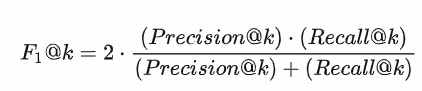

Fixme: fuente: https://queirozf.com/entries/evaluation-metrics-for-ranking-problems-introduction-and-examples#f1-k

Now to find the F1@k k for a set of queries Q, you can find the average value of F1@k for all queries in Q. (fixme: esto lo inventé yo)

In [54]:
# Dado un ranking, calcula F1@k:

# Fixme: mega ultra importante: al correr las métricas es necesario que si se le pasa
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, el parámetro 
# random == True. Por otro lado, si se le pasa
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, entonces random == False.

def f1Atk(ranking, k, random):
  precisionAtKForRanking = precisionAtK(ranking, k, random)
  recallAtKForRanking = recallAtK(ranking, k, random)

  numerador = precisionAtKForRanking * recallAtKForRanking
  denominador = precisionAtKForRanking + recallAtKForRanking

  if denominador == 0:
    return 0
    
  return 2*(numerador/denominador)

In [55]:
# Dada una lista de rankings, calcula el promedio de F1@k.

# Fixme: mega ultra importante: al correr las métricas es necesario que si se le pasa 
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, el parámetro 
# random == True. Por otro lado, si se le pasa 
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, entonces random == False.

def averageF1Atk(lista_de_rankings, k, random):
  cantidad_de_querys = len(lista_de_rankings)
  count_f1_at_k = 0

  for i in range(0, cantidad_de_querys):
    count_f1_at_k += f1Atk(lista_de_rankings[i], k, random)
  
  return (count_f1_at_k / cantidad_de_querys)

## Top-k accuracy

Top-n accuracy is a metric for classification. See [What is the definition of Top-n accuracy?.](https://stats.stackexchange.com/q/95391/25741)



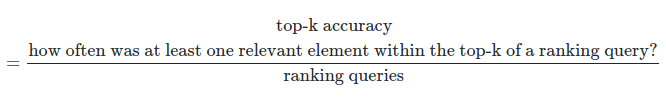

I like this very much because it is so easy to interpret. k comes from a business requirement (probably k∈[5,20]), then you can say how often the users will be happy.

Downside of this: If you still care about the order within the k items, you have to find another metric.

Fixme: fuente: https://stats.stackexchange.com/questions/159657/metrics-for-evaluating-ranking-algorithms

In [56]:
# Dado un ranking, calcula Recall at K:

# Fixme: mega ultra importante: al correr las métricas es necesario que si se 
# le pasa lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, el 
# parámetro random == True. Por otro lado, si se le pasa 
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, entonces random == False.

def topKAccuracy(lista_de_rankings, k, random):
  indice_de_indicador_de_cantidad_de_contranarrativas_correctas_para_odio_k_en_el_ranking = 3
  counter = 0

  if(random):
      indice_de_indicador_de_contranarrativa_correcta = 1 
  else:
      indice_de_indicador_de_contranarrativa_correcta = 2 

  for indice_ranking in range(0, len(lista_de_rankings)):
    one_relevant_element = False
    for elemento_del_ranking in lista_de_rankings[indice_ranking][5:k+5]: #fixme: los primeros 5 elementos del ranking no son el ranking en sí.
     # print('elemento_del_ranking',elemento_del_ranking)
      
      if(elemento_del_ranking[indice_de_indicador_de_contranarrativa_correcta]):
        one_relevant_element = True
    if(one_relevant_element):
      counter += 1
      
  return counter / len(lista_de_rankings)

## Average DCG: (Discounted Cumulative Gain)

Discounted cumulative gain (DCG) is a measure of ranking quality. In information retrieval, it is often used to measure effectiveness of web search engine algorithms or related applications. Using a graded relevance scale of documents in a search-engine result set, DCG measures the usefulness, or gain, of a document based on its position in the result list. The gain is accumulated from the top of the result list to the bottom, with the gain of each result discounted at lower ranks.[1]

Fixme: fuente: https://en.wikipedia.org/wiki/Discounted_cumulative_gain#:~:text=Discounted%20cumulative%20gain%20(DCG)%20is,engine%20algorithms%20or%20related%20applications

In the following 
image.png
is the graded relevance of the result at position i.

Como mi sistema no tiene relevance score para las contranarrativas, hay que fijarles un valor constante (se puede fijar valor 1) (Here we assume that the relevance score of each document to a query is given (otherwise it is usually set to a constant value), esto lo dice acá: https://towardsdatascience.com/20-popular-machine-learning-metrics-part-2-ranking-statistical-metrics-22c3e5a937b6).


The premise of DCG is that highly relevant documents appearing lower in a search result list should be penalized as the graded relevance value is reduced logarithmically proportional to the position of the result.



The traditional formula of DCG accumulated at a particular rank position p is defined as:

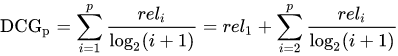

Previously there was no theoretically sound justification for using a logarithmic reduction factor[2] other than the fact that it produces a smooth reduction. But Wang et al. (2013)[3] gave theoretical guarantee for using the logarithmic reduction factor in Normalized DCG (NDCG). The authors show that for every pair of substantially different ranking functions, the NDCG can decide which one is better in a consistent manner.

An alternative formulation of DCG[4] places stronger emphasis on retrieving relevant documents:



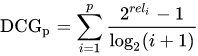

The latter formula is commonly used in industry including major web search companies[5] and data science competition platforms such as Kaggle.[6]

These two formulations of DCG are the same when the relevance values of documents are binary;

image.png

Note that Croft et al. (2010) and Burges et al. (2005) present the second DCG with a log of base e, while both versions of DCG above use a log of base 2. When computing NDCG with the first formulation of DCG, the base of the log does not matter, but the base of the log does affect the value of NDCG for the second formulation. Clearly, the base of the log affects the value of DCG in both formulations.

Fixme: fuente de todo esto: https://en.wikipedia.org/wiki/Discounted_cumulative_gain#:~:text=Discounted%20cumulative%20gain%20(DCG)%20is,engine%20algorithms%20or%20related%20applications

Como estas formulaciones son equivalentes, voy a usar la primera porque me parece más fácil de implementar: 

Voy a utilizar la siguente formulación de DCG:

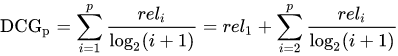

Yo no necesito usar nDCG porque eso sirve para cuando los "search result lists vary in length depending on the query.". En mi caso son siempre constantes, por eso ya está normalizado.

Por otro lado: The nDCG values for all queries can be averaged to obtain a measure of the average performance of a search engine's ranking algorithm. 

Entonces yo voy a inventar el averageDCG para medir la performace de la hipótesis.

In [57]:
# Dado un ranking, calcula su DCG:

# Fixme: mega ultra importante: al correr las métricas es necesario que
# si se le pasa lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, el 
# parámetro random == True. Por otro lado, si se le pasa
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, entonces
# random == False.

def DCG(ranking, k, random):
  offset_primer_elemento_ranking = 5
  if(random):
      indice_de_indicador_de_contranarrativa_correcta = 1 
  else:
      indice_de_indicador_de_contranarrativa_correcta = 2 
  DCG = 0

  for i in range(offset_primer_elemento_ranking, offset_primer_elemento_ranking + k): # recorro todos los elementos del ranking
    if (ranking[i][indice_de_indicador_de_contranarrativa_correcta]): # Si rel_i = 1 (si es una contranarrativa relevante):
      DCG += 1/ (math.log2(i+1-offset_primer_elemento_ranking+1)) # Le tengo que restar offset_primer_elemento_ranking y sumar 1, para que el primer elemento del ranking tenga i=1, el segundo i=2 y así sucesivamente. El otro +1 está por la formulación de DCG.

  return DCG

In [58]:
# Dada una lista de rankings, calcula el promedio de Recall at K.

# Fixme: mega ultra importante: al correr las métricas es necesario que
# si se le pasa lista_pares_navegacion_estandar_top10_matricial_leida_de_csv,
# el parámetro random == True. Por otro lado, si se le pasa
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, entonces
# random == False.

def averageDCG(lista_de_rankings, k, random):
  cantidad_de_querys = len(lista_de_rankings)
  count_DCG = 0

  for i in range(0, cantidad_de_querys):
    count_DCG += DCG(lista_de_rankings[i], k, random)
  
  return (count_DCG / cantidad_de_querys)

## Mean Average Precision@K (MAP@k)


For this kind of task, precision-based evaluation metrics would make more sense than recall. For example, to increase the recall score, we would need to send more ads to high up the response rate from the application members. However, what our problem wants is to not bombard the feed to them, and using recall couldn’t handle this problem. Fixme: Fuente: https://medium.com/@misty.mok/how-mean-average-precision-at-k-map-k-can-be-more-useful-than-other-evaluation-metrics-6881e0ee21a9

Using MAP to evaluate a recommender algorithm implies that you are treating the recommendation like a ranking task. Fuente: http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html#Precision-and-Recall-of-Recommender-Systems

En ese link, N = # elementos del ranking.

### Average Precission at K (AP@K)

Voy a usar la siguiente fórmula de Average Precision:
Varía un poco la notación respecto a lo que venía usando hasta ahora:


*   N = cantidad de elementos del ranking.
*   rel(k)  is just an indicator that says whether that kth item was relevant (rel(k)=1) or not (rel(k)=0).
*   m = # de la totalidad de contranarrativas válidas para odio_k en el conjunto de contranarrativas_k.
*   P(k) = precission at k.

* 


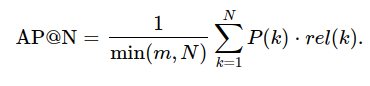

Fixme: en la sección "Examples and Intuition for AP", hay buenos ejemplos para entender AP: http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html#Precision-and-Recall-of-Recommender-Systems

Fixme:respecto a lo siguiente: esto está mal, para la implementación que yo usé, si la cantidad de elementos del ranking es menor a la cantidad de contranarrativas para odio_k, entonces AP@K se ve favorecida (por ejemplo averagePrecissionAtK(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[12], 3) = 1.0), mientras que si la cantidad de elementos del ranking es mayor a la cantidad de contranarrativas para odio_k (por ejemplo averagePrecissionAtK(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[12], 10) = 0.6)

>> A final point of note is that adding another recommendation can never decrease your AP score, so if you are asked for N recommendations give all of them, even if you don't feel very confident about the ones lower down the list! AP will never penalize you for tacking on additional recommendations to your list - just make sure you front-load the best ones. Fuente: http://sdsawtelle.github.io/blog/output/mean-average-precision-MAP-for-recommender-systems.html#Precision-and-Recall-of-Recommender-Systems

In [59]:
# Dado un ranking calcula AP@K

# Fixme: mega ultra importante: al correr las métricas es necesario que si se le
# pasa lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, el parámetro
# random == True. Por otro lado, si se le pasa
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, entonces random == False.

def averagePrecissionAtK(ranking, k, random):
  counterPrecisionAtK = 0
  validCounternarrativesForOdiok = ranking[4]
  if(random):
      indice_de_indicador_de_contranarrativa_correcta = 1 
  else:
      indice_de_indicador_de_contranarrativa_correcta = 2 

  for i in range(0,k): 
    counterPrecisionAtK += precisionAtK(ranking, i+1, random) * ranking[i+5][indice_de_indicador_de_contranarrativa_correcta]  #fixme: los primeros 5 elementos del ranking no son el ranking en sí. A precisionAtK le paso i+1 porque i empieza desde 0.
  
  return counterPrecisionAtK/min(validCounternarrativesForOdiok, k)

### Mean Average Precission at K (AP@K)

Utiliza la misma notación que en la sección "### Average Precission at K (AP@K)", con la excepción de:

*   U = # querys = |lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random|

Hay un error en la notación de la fórmula, arriba del símbolo de la sumatoria, falta un "U|", que por error quedó adentro de la sumatoria.

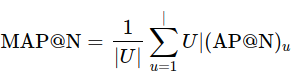

In [60]:
# Dada una lista de rankings, calcula MAP@K.

# Fixme: mega ultra importante: al correr las métricas es necesario que si se le
# pasa lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, el parámetro
# random == True. Por otro lado, si se le pasa
# lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, entonces random == False.

def meanAveragePrecissionAtK(lista_de_rankings, k, random):
    cantidad_de_querys = len(lista_de_rankings)
    count_average_precission_at_k = 0
    
    for i in range(0, cantidad_de_querys):
        count_average_precission_at_k += averagePrecissionAtK(lista_de_rankings[i], k, random)

    return (count_average_precission_at_k / cantidad_de_querys)

In [61]:
asdfasfas

NameError: ignored

# **Ploteo de Embeddings.**

## Uso PCA para dimensionality reduction a 3 dimensones.

Por ahora aplico PCA dos veces:
* En la primera, reduzco a 3 dimensiones (ya se puede plotear).
* En la segunda reduzco tal que se conserve el 0.95 ratio of variance (sacado del libro de scikit learn).
* Me falta aplicar PCA para reducir hasta 50 dimensiones, para después aplicar TSNE como indica el link de más abajo (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

### Ploteo los embeddings de los discursos de odio y las contranarrativas en 3D (usando PCA).

In [ ]:
# Concateno los embeddings de embeddings_hate_speech_i, embeddings_hate_speech_k,
# embeddings_counternarratives_i y embeddings_counternarratives_k
# con los embeddings del ranking Top 10 y con las contranarrativas para odio_k
embeddings_contranarrativas_y_discursos_odio = torch.cat((embeddings_counternarratives_i, embeddings_counternarratives_k, embeddings_hate_speech_i, embeddings_hate_speech_k), 0)

In [ ]:
# Fixme: Sacado de  Hands-on Machine Learning with Scikit-Learn, Keras & 
# TensorFlow (libro): you can set n_components to be a float between 0.0 and 1.0, 
# indicating the ratio of variance you wish to preserve.

# PCA: Reduzco a 3 dimensiones (ya se puede plotear).
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
embeddings_contranarrativas_y_discursos_odio_3d = pca.fit_transform(embeddings_contranarrativas_y_discursos_odio)

In [ ]:
# Fixme: sacado de acá: https://likegeeks.com/3d-plotting-in-python/
fig = plt.figure()

# assign categories
category_counternarratives_i = [0] * embeddings_counternarratives_i.shape[0]
category_counternarratives_k = [0] * embeddings_counternarratives_k.shape[0]
category_hate_speech_i = [1] * embeddings_hate_speech_i.shape[0]
category_hate_speech_k = [1] * embeddings_hate_speech_k.shape[0]

categories = category_counternarratives_i + category_counternarratives_k + category_hate_speech_i + category_hate_speech_k

# use colormap
colormap = np.array(['y', 'm', 'r', 'b'])

ax = fig.add_subplot(111, projection='3d')
ax.set_title("Contranarrativas (amarillo) y Discursos de Odio (magenta) PCA. Modelo: " + modelName)
ax.scatter(embeddings_contranarrativas_y_discursos_odio_3d[:,0],embeddings_contranarrativas_y_discursos_odio_3d[:,1],embeddings_contranarrativas_y_discursos_odio_3d[:,2], c=colormap[categories], alpha=.1)


plt.show()

## Uso PCA para dimensionality reduction a 2 dimensones.

In [ ]:
# Fixme: Sacado de  Hands-on Machine Learning with Scikit-Learn, Keras & 
# TensorFlow (libro): you can set n_components to be a float between 0.0 and 1.0, 
# indicating the ratio of variance you wish to preserve.

# PCA: Reduzco a 3 dimensiones (ya se puede plotear).
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
embeddings_contranarrativas_y_discursos_odio_2d = pca.fit_transform(embeddings_contranarrativas_y_discursos_odio)

In [ ]:
# Fixme: sacado de acá: https://likegeeks.com/3d-plotting-in-python/
fig = plt.figure()

# assign categories
category_counternarratives_i = [0] * embeddings_counternarratives_i.shape[0]
category_counternarratives_k = [0] * embeddings_counternarratives_k.shape[0]
category_hate_speech_i = [1] * embeddings_hate_speech_i.shape[0]
category_hate_speech_k = [1] * embeddings_hate_speech_k.shape[0]


# use colormap
colormap = np.array(['y', 'm'])

ax = fig.add_subplot(111)
ax.set_title("Contranarrativas (amarillo) y Discursos de Odio (magenta) PCA")
ax.scatter(embeddings_contranarrativas_y_discursos_odio_3d[:,0],embeddings_contranarrativas_y_discursos_odio_3d[:,1], c=colormap[categories], alpha=.2)


plt.show()

##Ploteo con T-SNE para dimensionality reduction a 3 dimensones.

### Ploteo los embeddings de las contranarrativas en 3D (usando T-SNE)

In [ ]:
embeddings_contranarrativas = torch.cat((embeddings_counternarratives_i, embeddings_counternarratives_k), 0)

In [ ]:
from sklearn.manifold import TSNE
# Project the data: this step will take several seconds
tsne = TSNE(n_components=3, init='pca', random_state=0)
counternarratives_proj = tsne.fit_transform(embeddings_contranarrativas)

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_title("Counternarrativas TSNE")
ax.scatter(counternarratives_proj[:,0],counternarratives_proj[:,1],counternarratives_proj[:,2])

plt.show()

### Ploteo los embeddings de las los discursos de odio en 3D (usando T-SNE)

In [ ]:
embeddings_hate_speech = torch.cat((embeddings_hate_speech_i, embeddings_hate_speech_k), 0)

In [ ]:
# Project the data: this step will take several seconds
tsne = TSNE(n_components=3, init='pca', random_state=0)
hateSpeech_proj = tsne.fit_transform(embeddings_hate_speech)

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_title("Discursos de odio TSNE")
ax.scatter(hateSpeech_proj[:,0],hateSpeech_proj[:,1],hateSpeech_proj[:,2])


plt.show()

### Ploteo los embedddings de odio y las contranarrativa en el mismo plot en 3D (usando T-SNE).

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_title("Discursos de odio y contranarrativas TSNE")
ax.scatter(hateSpeech_proj[:,0],hateSpeech_proj[:,1],hateSpeech_proj[:,2])
ax.scatter(counternarratives_proj[:,0],counternarratives_proj[:,1],counternarratives_proj[:,2])

plt.show()

##Ploteo con T-SNE para dimensionality reduction a 2 dimensones.

### Ploteo los embeddings de las contranarrativas en 2D (usando T-SNE)

In [ ]:
from sklearn.manifold import TSNE
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='pca', random_state=0)
counternarratives_proj2D = tsne.fit_transform(embeddings_contranarrativas)

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_title("Counternarrativas TSNE")
ax.scatter(counternarratives_proj2D[:,0],counternarratives_proj2D[:,1])

plt.show()

### Ploteo los embeddings de las los discursos de odio en 2D (usando T-SNE)

In [ ]:
# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='pca', random_state=0)
hateSpeech_proj2D = tsne.fit_transform(embeddings_hate_speech)

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_title("Discursos de odio de odio TSNE")
ax.scatter(hateSpeech_proj2D[:,0],hateSpeech_proj2D[:,1])


plt.show()

### Ploteo los embedddings de odio y las contranarrativa en el mismo plot en 2D (usando T-SNE).

In [ ]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_title("Discursos de odio y contranarrativas TSNE")
ax.scatter(counternarratives_proj2D[:,0],counternarratives_proj2D[:,1])
ax.scatter(hateSpeech_proj2D[:,0],hateSpeech_proj2D[:,1])

plt.show()

## Uso Isomap para dimensionality reduction. Fixme: no llego hasta el final con esto porque parce dar plots muy parecidos a los de T-SNE y PCA.

Fixme: Sacado de Python Data Science Handbook, sección "Unsupervised learning: Dimensionality reduction".

In [ ]:
embeddings_hate_speech.shape

In [ ]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(embeddings_hate_speech)
data_projected = iso.transform(embeddings_hate_speech)
data_projected.shape

In [ ]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], 
edgecolor='none', alpha=0.5)
plt.clim(-0.5, 9.5);

#Correr todo el experimento:

In [62]:
def saveInTxt(modelName, fileName, value):
  with open(modelName + '_' + fileName + '.txt', 'w') as fp:
    fp.write(str(value))
    print('Done')

In [63]:
def correrMetrica(metrica, modelName, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random,lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv, nombreMetrica):
    # Genera los resultados de "metrica" para rankings random y rankings con función de navegación estándar:
    restultados_metrica_estandar = generar_resultados_de_metricas(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, metrica, False)
    print(nombreMetrica, 'para función de navegación estándar:', restultados_metrica_estandar)			
    restultados_metrica_estandar_random = generar_resultados_de_metricas(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, metrica, True)
    print(nombreMetrica, 'para rankings random:', restultados_metrica_estandar_random)

    # Genera los resultados de "metrica" para rankings generados con función de navegación basada en centroides
    restultados_metrica_basado_en_centroides = generar_resultados_de_metricas(lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv, metrica, False)
    print(nombreMetrica, 'para función de navegación basada en centroides:', restultados_metrica_basado_en_centroides)
    
    # Plotea "métrica" para rankings generados con la función de navegación estándar vs basada en centroides vs rankings random:
    plotMetricsForThreeRankigs(nombreMetrica, modelName, restultados_metrica_basado_en_centroides, 'Función de navegación basada en centroides', restultados_metrica_estandar, 'Función de navegación estándar', restultados_metrica_estandar_random, 'Ranking generado aleatoriamente.')


In [64]:
# Es recomendable trabajar con batches de tamaño pequeño (batch_size= 10), porque el tiempo de ejecución
# de correr_funcion_de_navegacion_estandar es el mísmo y ocupa menos RAM.

# Fixme: ya no pido el parámetro Bool embeddignsGenerated, porque embeddignsGenerated está trayendo problemas 
# y no es estríctamente necesaria

def correrTodoElExperimento(modelList, GPUavailable = False, batch_size = 20):
	for modelName in modelList:

		model = SentenceTransformer(modelName)         

		# Fixme: comento el siguiente if porque loadEmbeddings está trayendo problemas y no es
		# estríctamente necesaria (se pueden generar los embeddings cada vez que sea necesario).
			
		# if (not embeddignsGenerated):
		
		# Genera embeddings para los conjuntos Odio_i, Odio_k, Contranarrativas_i y Contranarrativas_k y
		# los guarda en el disco.
		print('Generando Embeddings para los discursos de Odio_i.')
		embeddings_hate_speech_i = generar_embeddings(model, modelName, conjunto_sin_repetidos_odio_i, 'embeddings_hate_speech_i')

		print('Generando Embeddings para los discursos de Odio_k.')
		embeddings_hate_speech_k = generar_embeddings(model, modelName, conjunto_sin_repetidos_odio_k, 'embeddings_hate_speech_k')
		
		print('Generando Embeddings para los discursos de Contranarrativas_i.')
		embeddings_counternarratives_i = generar_embeddings(model, modelName, conjunto_sin_repetidos_contranarrativa_i, 'embeddings_counternarratives_i')
		print('Generando Embeddings para los discursos de Contranarrativas_k.')
		embeddings_counternarratives_k = generar_embeddings(model, modelName, conjunto_sin_repetidos_contranarrativa_k, 'embeddings_counternarratives_k')


		# Fixme: comento el siguiente bloque porque loadEmbeddings está trayendo problemas y no es
		# estríctamente necesaria (se pueden generar los embeddings cada vez que sea necesario).
		"""	
		else:
			#Lee los embeddings de Odio_i, Odio_k, Contranarrativas_i y Contranarrativas_k guardados en el disco.
			print('Cargando los Embeddings para los discursos de Odio_i.')
			embeddings_hate_speech_i = loadEmbeddings(modelName, 'embeddings_hate_speech_i')
			
			print('Cargando los Embeddings para los discursos de Odio_k.')
			embeddings_hate_speech_k = loadEmbeddings(modelName, 'embeddings_hate_speech_k')

			print('Cargando los Embeddings para las Contranarrativas_i.')
			embeddings_counternarratives_i = loadEmbeddings(modelName, 'embeddings_counternarratives_i')

			print('Cargando los Embeddings para las Contranarrativas_k.')
			embeddings_counternarratives_k = loadEmbeddings(modelName, 'embeddings_counternarratives_k')
			"""
		if (GPUavailable):
			# Envía los embeddings a la GPU:
			embeddings_hate_speech_i.to(device)
			embeddings_hate_speech_k.to(device)
			embeddings_counternarratives_i.to(device)
			embeddings_counternarratives_k.to(device)

		# Calcula la función de navegación estándar:
		print('Calculando función de navegación estándar')
		correr_funcion_de_navegacion_estandar_hasta = len(conjunto_sin_repetidos_contranarrativa_i)  # Seteado de esta forma para correr todo el experimento. Fixme: el valor más grande que puede tomar es: len(conjunto_sin_repetidos_contranarrativa_i)  
		correr_funcion_de_navegacion_estandar(modelName, batch_size, correr_funcion_de_navegacion_estandar_hasta, embeddings_counternarratives_i, embeddings_counternarratives_k, embeddings_hate_speech_i, embeddings_hate_speech_k)

		# Calcula la función de navegación basada en centroides:
		funcionDeNavegacionBasadaEnCentroides(modelName, embeddings_hate_speech_i, embeddings_counternarratives_i, embeddings_hate_speech_k, embeddings_counternarratives_k)

		# Lee rankings formados con la función de estandar desde los archivos .csv y los guarda en una lista
		lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, lista_metrica_2_navegacion_estandar_top10_leida_de_csv = metrica2(modelName, batch_size, correr_funcion_de_navegacion_estandar_hasta, "estandar")

		# Lee rankings random formados con la función de estandar desde los archivos .csv y los guarda en una lista
		lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, lista_metrica_2_navegacion_estandar_top10_leida_de_csv_random = metrica2(modelName, batch_size, correr_funcion_de_navegacion_estandar_hasta, "estandar", True)

		# Lee rankings formados con la función de navegación basada en centroides desde los archivos .csv y los guarda en una lista
		lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv, lista_metrica_2_navegacion_basada_en_centroides_top10_leida_de_csv = metrica2(modelName, batch_size, correr_funcion_de_navegacion_estandar_hasta, "basada_en_centroides")

		#Fixme: los siguientes rankings random probablemente no los use, por lo que voy a tener que borrar esta línea.
		# Lee Lee rankings random formados con la función de navegación basada en centroides desde los archivos .csv y los guarda en una lista.
		lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv_random, lista_metrica_2_navegacion_basada_en_centroides_top10_leida_de_csv_random = metrica2(modelName, batch_size, correr_funcion_de_navegacion_estandar_hasta, "basada_en_centroides", True)

		# Aplica la métrica 3 a los rankings  leídos desde csv:
		metrica3RankingTop10NavegacionEstandar = metrica3Top10(lista_metrica_2_navegacion_estandar_top10_leida_de_csv)
		print('Métrica 3, calculada con rankings de 10 elementos, generados con la función de navegación estándar:', metrica3RankingTop10NavegacionEstandar)
		metrica3RankingRandomTop10NavegacionEstandar = metrica3Top10(lista_metrica_2_navegacion_estandar_top10_leida_de_csv_random)
		print('Métrica 3, calculada con rankings random de 10 elementos, generados con la función de navegación estándar:', metrica3RankingRandomTop10NavegacionEstandar)
		metrica3RankingTop10NavegacionBasadaEnCentroides = metrica3Top10(lista_metrica_2_navegacion_basada_en_centroides_top10_leida_de_csv)
		print('Métrica 3, calculada con rankings de 10 elementos, generados con la función de navegación basada en centroides:', metrica3RankingTop10NavegacionBasadaEnCentroides)
		metrica3RankingRandomTop10NavegacionBasadaEnCentroides = metrica3Top10(lista_metrica_2_navegacion_basada_en_centroides_top10_leida_de_csv_random) # Fixme: probablemente no use estos rankings random y por lo tanto borre esta línea.
		print('Métrica 3, calculada con rankings random de 10 elementos, generados con la función de navegación basada en centroides:', metrica3RankingRandomTop10NavegacionBasadaEnCentroides) # Fixme: probablemente no use estos rankings random y por lo tanto borre esta línea.

		# Guarda los resultados de métrica 3 en archivos.
		print('Guardando outputs de la métrica 3')
		saveInTxt(modelName, 'metrica_3_top10_random_csv_funcion_de_navegacion_estandar', str(metrica3RankingRandomTop10NavegacionEstandar))
		saveInTxt(modelName, 'metrica_3_top10_csv_funcion_de_navegacion_estandar', str(metrica3RankingTop10NavegacionEstandar))
		saveInTxt(modelName, 'metrica_3_top10_csv_funcion_de_navegacion_basada_en_centroides', str(metrica3RankingTop10NavegacionBasadaEnCentroides))

		# Ejecuta las méticas:
		cantidad_de_querys = len(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv)

	
		# Mean reciprocal rank:
		correrMetrica(mean_reciprocal_rank, modelName, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv, 'Mean reciprocal rank')
		
		# Average value of Precision at k (P@k):
		correrMetrica(averageValuePrecisionAtK, modelName, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv, 'Average value of Precision at k (P@k)')
	
		# Average value of Recall at k:
		correrMetrica(averageRecallAtK, modelName, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv, 'Average value of Recall at k')
				
		# Average value of F1@k
		correrMetrica(averageF1Atk, modelName, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv, 'Average value of F1@k')

		# Top-k accuracy 
		correrMetrica(topKAccuracy, modelName, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv, 'Top-k accuracy')

		# Average DCG: (Discounted Cumulative Gain)
		correrMetrica(averageDCG, modelName, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv, 'Average DCG')

		# Mean Average Precision@K (MAP@k)
		correrMetrica(meanAveragePrecissionAtK, modelName, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random, lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, lista_pares_navegacion_basada_en_centroides_top10_matricial_leida_de_csv, 'Mean Average Precision@K (MAP@k)')

Generando Embeddings para los discursos de Odio_i.
Generando Embeddings para los discursos de Odio_k.
Generando Embeddings para los discursos de Contranarrativas_i.
Generando Embeddings para los discursos de Contranarrativas_k.
Calculando función de navegación estándar
Se correrá la función de navegación estándar sobre las primeras 639 contranarrativas de counternarratives_conan_list_sin_repetidos.
Cantidad de paritciones con 20 elementos: 31
Cantidad de elementos de la última partición: 19
Cantidad de particiones totales: 32
Corriendo partición número 1 de  32
limite_inferior: 0
limite_superior: 20
Generando los rankings con la función de navegación estándar, iteración número 0
Generando los rankings con la función de navegación estándar, iteración número 10000
El cálculo de cos_sim usando el método matricial: 5.058ms
Matriz de cos_sim calculada con el método matricial, armando el resto de la función de navegación estándar...
La función de navegación estándar con el método matricial, 

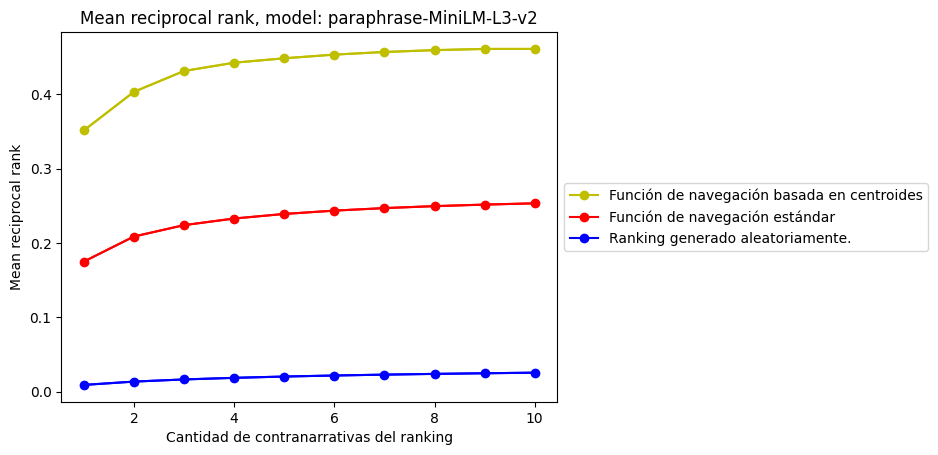

Average value of Precision at k (P@k) para función de navegación estándar: [0.1750025964134875, 0.14838935816658588, 0.1307900020770731, 0.1181389773592744, 0.10877760853019942, 0.10139283159087838, 0.09537863126976125, 0.09028811534999653, 0.08594657542677499, 0.0820747940178916]
Average value of Precision at k (P@k) para rankings random: [0.009022536869071522, 0.009054992037665304, 0.009002342541945776, 0.008977099633040227, 0.009021671397910274, 0.008988639248541612, 0.008971844986695312, 0.008943021706016756, 0.008892716194694731, 0.008879734127256027]
Average value of Precision at k (P@k) para función de navegación basada en centroides: [0.35148514851485146, 0.3118811881188119, 0.27557755775577586, 0.24257425742574257, 0.21881188118811898, 0.20049504950495037, 0.18741159830268733, 0.17574257425742573, 0.16226622662266202, 0.15099009900990112]


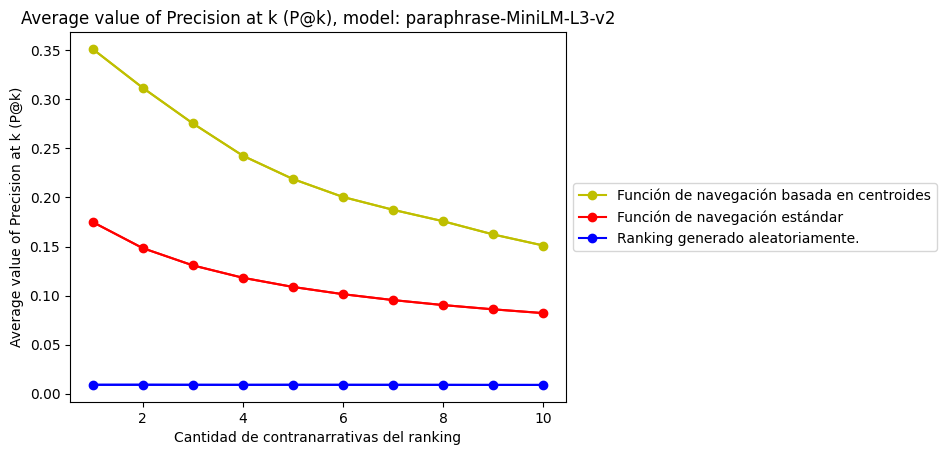

Average value of Recall at k para función de navegación estándar: [0.03344405874781611, 0.05571662410916884, 0.07310587158412252, 0.08765269420970397, 0.10056263297039686, 0.11208670224176974, 0.1228136967881731, 0.13279267965626823, 0.14209778188905078, 0.1507255720441068]
Average value of Recall at k para rankings random: [0.0016432385127198145, 0.003247825840650909, 0.004860745242024429, 0.006455334172244659, 0.008169715587733918, 0.0097923448900922, 0.011409287073484027, 0.013001479338664397, 0.014504681724666983, 0.016091378855918884]
Average value of Recall at k para función de navegación basada en centroides: [0.08179566076908441, 0.14142927450639792, 0.17791906540278077, 0.20511390894728576, 0.2246796860137142, 0.24533719515250954, 0.267595498769249, 0.2854305670505131, 0.2938912894963841, 0.2998566980673164]


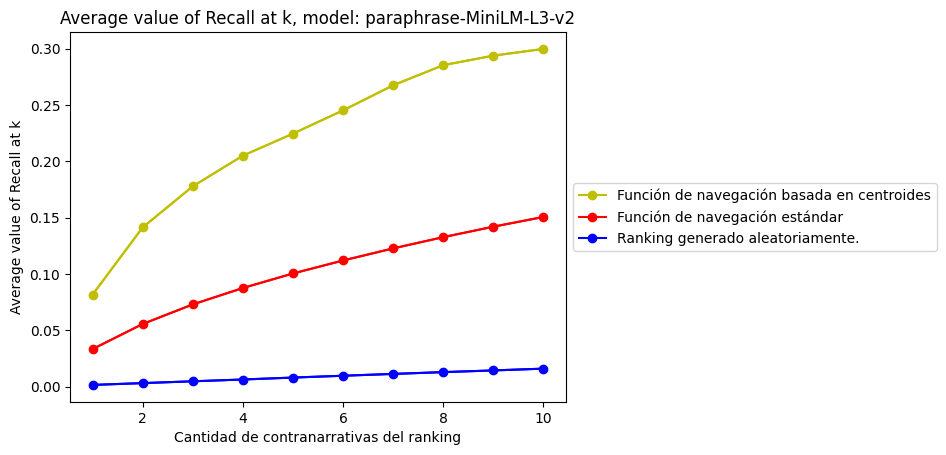

Average value of F1@k para función de navegación estándar: [0.05135244739890294, 0.07196842077440818, 0.08227993992368683, 0.08778471457691422, 0.09102133947899863, 0.09277985667613914, 0.09375621168378641, 0.09412175423024247, 0.09407452541307554, 0.09363576264568609]
Average value of F1@k para rankings random: [0.002573545526847155, 0.004289752595717969, 0.0055853929520990235, 0.0066112285379293055, 0.007525878827137414, 0.008235270222918143, 0.008847626898059287, 0.00936312681849001, 0.009772614570498996, 0.010173900341575129]
Average value of F1@k para función de navegación basada en centroides: [0.11953586999566826, 0.1686845470261311, 0.1878565989147479, 0.1932335523327774, 0.19308311038458742, 0.1924888237748761, 0.19232569558648505, 0.19075125100314375, 0.18434176346701384, 0.1776197118879817]


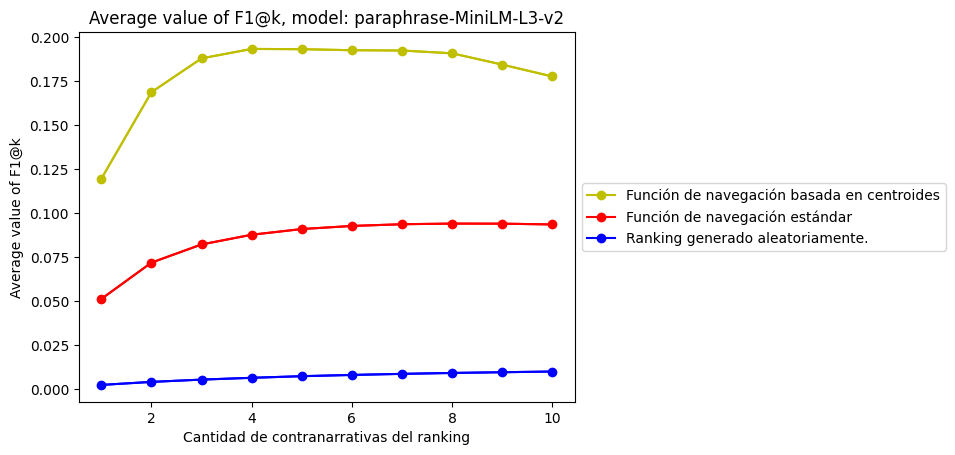

Top-k accuracy para función de navegación estándar: [0.1750025964134875, 0.24250069237693, 0.2884269196150384, 0.32407134944263655, 0.3547782662881673, 0.38164681852800664, 0.40542996607353043, 0.4265647718618016, 0.4452026933462577, 0.46235633178702484]
Top-k accuracy para rankings random: [0.009022536869071522, 0.017997472824205496, 0.02666083916083916, 0.03525064044866025, 0.04402651803641903, 0.05233504119642734, 0.060595963442498096, 0.06861455376306862, 0.07626531883957627, 0.08411514228345912]
Top-k accuracy para función de navegación basada en centroides: [0.35148514851485146, 0.45544554455445546, 0.5396039603960396, 0.5841584158415841, 0.6138613861386139, 0.6435643564356436, 0.6683168316831684, 0.6881188118811881, 0.7029702970297029, 0.7029702970297029]


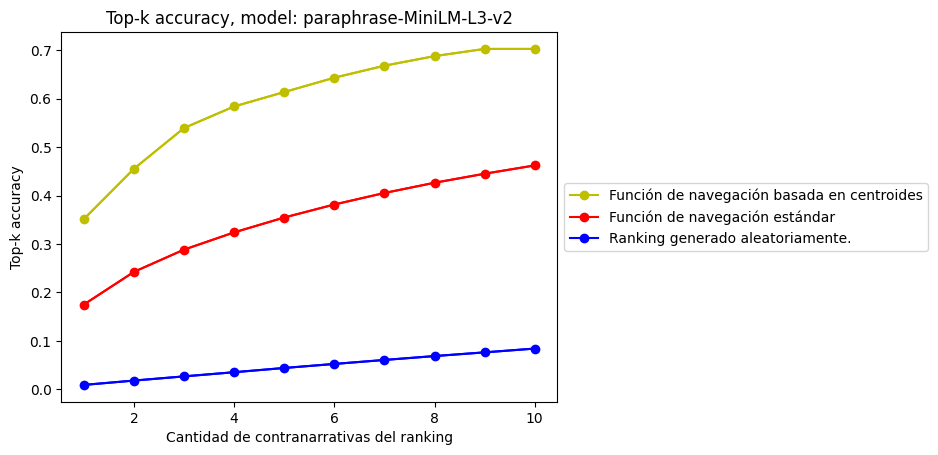

Average DCG para función de navegación estándar: [0.1750025964134875, 0.251834773745178, 0.2996304186943255, 0.33416460749310745, 0.36175964347273204, 0.38472394570194496, 0.404488422149574, 0.4217299984919318, 0.43714702576588604, 0.45079919945913977]
Average DCG para rankings random: [0.009022536869071522, 0.014756077695509812, 0.019204599470764368, 0.023038211254832873, 0.026597241010512567, 0.02974022746811083, 0.03269725393998814, 0.03545481405175241, 0.038010640626445956, 0.04054368549807078]
Average DCG para función de navegación basada en centroides: [0.35148514851485146, 0.5232729527050989, 0.6247581012199502, 0.6865879041116751, 0.7344657267892173, 0.773260568949497, 0.8095641993125335, 0.8392366382181223, 0.8556293607542796, 0.8699395006710067]


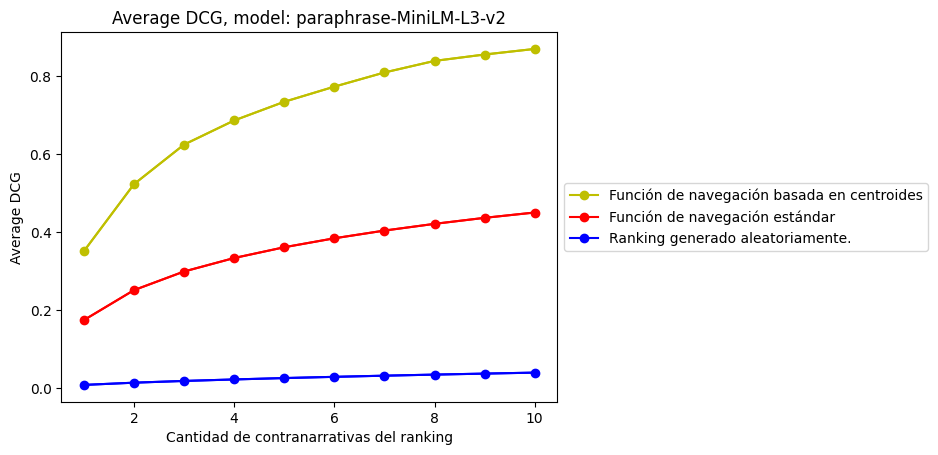

Mean Average Precision@K (MAP@k) para función de navegación estándar: [0.1750025964134875, 0.13501133767222875, 0.1131744184033536, 0.10058058089462397, 0.09370428629402816, 0.08912147224336522, 0.0864952978814286, 0.08512753533251091, 0.084331380377414, 0.08427058024596949]
Mean Average Precision@K (MAP@k) para rankings random: [0.009022536869071522, 0.006895641487225645, 0.0059062396624276585, 0.005396933924161621, 0.005167818464538721, 0.005043308417380257, 0.004989133307954075, 0.005005952867902504, 0.005039759762786185, 0.005120535468561799]
Mean Average Precision@K (MAP@k) para función de navegación basada en centroides: [0.35148514851485146, 0.2995049504950495, 0.25838833883388346, 0.2322951045104511, 0.21840071507150718, 0.20982260726072624, 0.2060667980063312, 0.20363091028490607, 0.1999654866988967, 0.19935324491916315]


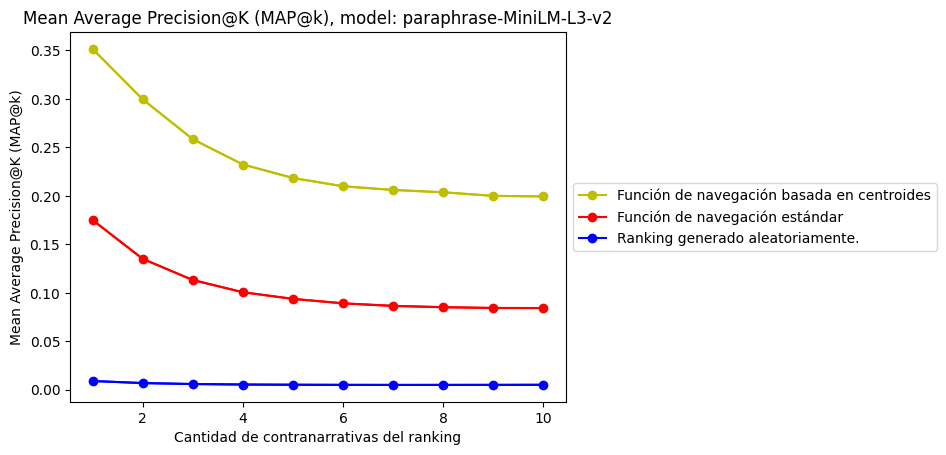

In [65]:
lista = ['paraphrase-MiniLM-L3-v2']
correrTodoElExperimento(lista)

#Fixme: creo que lo que queda de esta sección ya no es necesario.

## Cómo seguir:

Voy a seguir el ejemlo que indico abajo, pero antes, aclaro:
En el ejemplo usa sklearn.manifold.TSNE, pero en la documentación de sklearn.manifold.TSNE (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), recomiendan aplicar algun algoritmo de dimensionality reduction ((e.g. PCA for dense data or TruncatedSVD for sparse data)), para que los embeddings tengan 50 dimensiones.
Por lo tanto, voy a aplicar PCA:
Voy a intentar seguir este ejemplo: https://inside-machinelearning.com/en/efficient-sentences-embedding-visualization-tsne/#TSNE_-_Visualization_of_Embedding_of_sentences


Fixme: la sugerencia de Lau y Dami es graficar usando PCA o T-SNE

Intentar plotear como en esta página: https://inside-machinelearning.com/en/efficient-sentences-embedding-visualization-tsne/

Este ploteo está bueno: https://github.com/ashutoshsingh25/Plotting-multidimensional-vectors-using-t-SNE/blob/master/TSNE%20Code%20for%20clusring%20image%20and%20text%20vectors%20with%20labels.ipynb

Este ploteo está bueno: https://towardsdatascience.com/plotting-text-and-image-vectors-using-t-sne-d0e43e55d89

k-Means: para encontrar el valor óptimo de k ver Gap Statistic: https://hastie.su.domains/Papers/gap.pdf

Si no, chusmear: Cluster: https://towardsdatascience.com/plotting-text-and-image-vectors-using-t-sne-d0e43e55d89
    


In [ ]:
"""
from matplotlib import pyplot 
from pylab import figure

fig = figure()
ax = fig.add_subplot(projection='3d')
labels = ['cit1ck1', 'oi', 'ok', 'cit1ck1', 't2', 't3ck2', 't4ck3', 't5', 't6', 't7', 't8', 't9', 't90', 'cit1ck1', 't3ck2', 't4ck3', 'ck4', 'h1']
#labels = ['contranarrativa_i', 'odio_i', 'odio_k', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'contranarrativaParaOdiok1', 'contranarrativaParaOdiok2', 'contranarrativaParaOdiok3', 'contranarrativaParaOdiok4', 'calculadoConFuncionDeDesplazamiento']


for i in range(len(embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK_3d)): #plot each point + it's index as text above
    ax.scatter(embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK_3d[i,0],embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK_3d[i,1],embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK_3d[i,2],color='b') 
    ax.text(embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK_3d[i,0],embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK_3d[i,1],embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK_3d[i,2],  '%s' % (labels[i]), size=10, zorder=1,  
    color='k') 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
pyplot.show()
"""

In [ ]:
"""
# Fixme: sacado de acá: https://likegeeks.com/3d-plotting-in-python/
fig = plt.figure()

# assign categories
categories = np.array([0, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5])
 
# use colormap
colormap = np.array(['r', 'g', 'b', 'y', 'm', 'c'])

ax = fig.add_subplot(111, projection='3d')
ax.set_title("Caso a mano PCA")
ax.scatter(embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK_3d[:,0],embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK_3d[:,1],embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK_3d[:,2], c=colormap[categories], alpha=.8)


plt.show()
"""

# Sanity Checks y pruebas a mano.

De acá para arriba es el Script, para abajo vienen pruebas a mano y Sanity checks.

# Sanity checks

## Sanity checks de la Función de Navegación Estándar:

### Aplico Función de Navegación Estándar con método matricial:

In [ ]:
# Fixme: si no comento el return de funcionDeNavegacionEstandarParticion, al ejecutar
# funcionDeNavegacionEstandarParticion(0,100), desde Colab, me quedo sin RAM.
# Para que esta celda funcione, se debe decomentar el return de 
# funcionDeNavegacionEstandarParticion.
  
  #fixme: si lo corro desde el script en mi compu, puedo setear hasta:
    # cantidad_contranarrativas_iteradas_matricial = 250
    # cantidad_discursos_odio_iterados_matricial = len(hate_speech_conan_list_sin_repetidos)
  #fixme: en google colab puede correr hasta:
    # cantidad_contranarrativas_iteradas_matricial = 200 (quizás puede un poco más, pero hasta 250 no llega).
    # cantidad_discursos_odio_iterados_matricial = len(hate_speech_conan_list_sin_repetidos)
    # cantidad_contranarrativas_iteradas_matricial = 100  # fixme: el máximo es len(counternarratives_conan_list_sin_repetidos) #junto a cantidad_discursos_odio_iterados_matricial determina la parte del dataset en la que se aplica función de navegación estándara 1.

cantidad_contranarrativas_iteradas_para_sanity_check = 4
lista_contranarrativa_i_embedding_matricial, df_odio_en_conan_list_matricial, odio_i_lista_sanity_check_matricial, lista_listas_odio_i_embedding_matricial, lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_matricial, lista_listas_listas_odio_k_embedding_creado_por_lista_matricial, indices_contranarrativa_i_odio_i_odio_k, cos_sim_calculado_con_matriz, lista_pares_navegacion_estandar_top10_matricial = funcionDeNavegacionEstandarParticion(modelName, 0,cantidad_contranarrativas_iteradas_para_sanity_check, True);

### Aplico métrica 2 con método matricial:

In [ ]:
# Métrica 2 en ranking de 10 elementos

lista_pares_navegacion_estandar_top10_matricial_leida_de_csv = leer_funcion_de_navegacion_estandar(modelName, batch_size, cantidad_contranarrativas_iteradas_para_sanity_check)
lista_metrica_2_top10_leida_de_csv = []
posicion_contranarrativas_encontradas = 3 
posicion_contranarrativas_totales = 4
cantidad_elementos_del_rankingTop10 = 10

for i in range(0, len(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv)):
  metrica_2_para_par_i = lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[i][posicion_contranarrativas_encontradas]/min(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[i][posicion_contranarrativas_totales],cantidad_elementos_del_rankingTop10)
  lista_metrica_2_top10_leida_de_csv.append(metrica_2_para_par_i)

### Aplico métrica 3 con método matricial:

In [ ]:
metrica_3_top10_csv = sum(lista_metrica_2_top10_leida_de_csv)/len(lista_metrica_2_top10_leida_de_csv)
print('Métrica 3, con ranking de 10 elementos:', metrica_3_top10_csv)

### Aplico Función de Navegación Estándar con un for-loop (sólo para hacer sanity checks):

In [ ]:
print('Calculando función de navegación estándar con for-loop')

La versión con for-loop, para 100 contranarrat y 100 odio, demora 4.8 min.

In [ ]:
# Hago el setup de algunos parámetros:
lista_pares_navegacion_estandar_top10 = [] 
lista_pares_navegacion_estandar_top5 = []
lista_pares_navegacion_estandar_top3 = []
lista_pares_navegacion_estandar_top1 = []

lista_pares_navegacion_estandar_top10_random = []
lista_pares_navegacion_estandar_top5_random = []
lista_pares_navegacion_estandar_top3_random = []
lista_pares_navegacion_estandar_top1_random = []

# fixme: inicio: las siguientes listas son solo para sanity check, una vez realizados los chequeos, se pueden comentar:
df_odio_en_conan_list_for_loop = []
lista_contranarrativa_i_embedding_for_loop = []
indices_contranarrativa_i_odio_i_odio_k_for_loop_soloParaSanityChequearImplementacionMatricial = []
odio_i_lista_sanity_check_for_loop = []
lista_listas_odio_i_embedding_for_loop = []
lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_for_loop =[]
lista_listas_listas_odio_k_embedding_creado_por_lista_for_loop = []
lista_listas_listas_sanity_check_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan = []
#### fixme: fin de: las siguientes listas son solo para sanity check, una vez realizados los chequeos, se pueden comentar: 

iteraciones = 0;

cantidad_contranarrativas_iteradas_for_loop = cantidad_contranarrativas_iteradas_para_sanity_check  # fixme: el máximo es len(counternarratives_conan_list_sin_repetidos) #junto a cantidad_discursos_odio_iterados_for_loop determina la parte del dataset en la que se aplica la función de navegación estándar.
cantidad_discursos_odio_iterados_for_loop = len(conjunto_sin_repetidos_odio_k)    # fixme: el máximo es len(hate_speech_conan_list_sin_repetidos)     # junto a cantidad_contranarrativas_iteradas_for_loop determina la parte del dataset en la que se aplica la función de navegación estándar. #fixme: puede que acá haya un error.

# Filtro dfOdiosYContanarrativasI, tal que los mensajes de odio, aparezcan en conjunto_sin_repetidos_odio_i
df_odio_conjunto_sin_repetidos_odio_i = dfOdiosYContanarrativasI[dfOdiosYContanarrativasI['hateSpeech'].isin(conjunto_sin_repetidos_odio_i)]
  
# Filtro las contranarrativas en conan para odio_k, tal que aparezcan en conjunto_sin_repetidos_contranarrativa_k
df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k = dfOdiosYContanarrativasK[dfOdiosYContanarrativasK['counterSpeech'].isin(conjunto_sin_repetidos_contranarrativa_k)]

#fixme: partición for: este for iteraba 6803 veces
for contranarrativa_i_indice in range(0, cantidad_contranarrativas_iteradas_for_loop): #fixme: lo que modifico es esto, antes decía: for contranarrativa_i_indice in range(0, len(counternarratives_conan_list_sin_repetidos)):
  # contranarrativa_i_indice será el índice de la contranarrativa_i.
  #selecciono el embedding de la contranarrativa_i
  contranarrativa_i_embedding_creado_por_lista = embeddings_counternarratives_i[contranarrativa_i_indice];
  lista_contranarrativa_i_embedding_for_loop.append(contranarrativa_i_embedding_creado_por_lista)

  # Busco los discursos de odio para la contranarrativa_i
  df_oido_conjunto_sin_repetidos_odio_i_para_contranarrativa_i = df_odio_conjunto_sin_repetidos_odio_i.loc[df_odio_conjunto_sin_repetidos_odio_i['counterSpeech'] == conjunto_sin_repetidos_contranarrativa_i[contranarrativa_i_indice], 'hateSpeech'] 
  df_odio_en_conan_list_for_loop.append(df_oido_conjunto_sin_repetidos_odio_i_para_contranarrativa_i) # fixme: sólo para sanity check

  # Elijo cada uno de los discursos de odio que aparecen en Conan para la conranarrativa_i (los llamo odio_i). 
  #fixme: partición for: este for va variadno, pero más o menos itera 4 veces.
  lista_embedding_contranarrativa_i_sin_discurso_de_odio_i_for_loop = []   #fixme: solo para sanity check
  lista_odio_i_para_contranarrat_i_for_loop = [] #fixme: solo para sanity check.
  lista_odio_i_embedding_for_loop = [] #fixme: solo para sanity check
  lista_listas_odio_k_embedding_creado_por_lista_for_loop = [] # fixme: solo para sanity check
  lista_listas_sanity_check_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan = [] #fixme: solo para sanity check

  # Filtro dfOdiosYContanarrativasI, tal que los mensajes de odio, aparezcan en conjunto_sin_repetidos_odio_i
  df_odio_conjunto_sin_repetidos_odio_i = dfOdiosYContanarrativasI[dfOdiosYContanarrativasI['hateSpeech'].isin(conjunto_sin_repetidos_odio_i)]
  
  # Filtro las contranarrativas en conan para odio_k, tal que aparezcan en conjunto_sin_repetidos_contranarrativa_k
  df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k = dfOdiosYContanarrativasK[dfOdiosYContanarrativasK['counterSpeech'].isin(conjunto_sin_repetidos_contranarrativa_k)]

  for ind in  df_oido_conjunto_sin_repetidos_odio_i_para_contranarrativa_i.index:
    odio_i = df_oido_conjunto_sin_repetidos_odio_i_para_contranarrativa_i.loc[ind]
   
    lista_odio_i_para_contranarrat_i_for_loop.append(odio_i) # fixme: sólo para sanity check
    
    # Busco el índice de odio_1 en conjunto_sin_repetidos_odio_i.
    indice_odio_i = conjunto_sin_repetidos_odio_i.index(odio_i)

    # Busco el embedding para odio_i  
    odio_i_embedding_creado_por_lista = embeddings_hate_speech_i[indice_odio_i]
    
    lista_odio_i_embedding_for_loop.append(odio_i_embedding_creado_por_lista) #fixme: solo para sanity check

    # Resto el embedding de odio_i al de contranarrativa_i.
    embedding_contranarrativa_i_sin_discurso_de_odio_i = contranarrativa_i_embedding_creado_por_lista - odio_i_embedding_creado_por_lista
    lista_embedding_contranarrativa_i_sin_discurso_de_odio_i_for_loop.append(embedding_contranarrativa_i_sin_discurso_de_odio_i) #fixme: solo para sanity check

    lista_odio_k_embedding_creado_por_lista_for_loop = [] # fixme: solo para sanity check
    #fixme: partición for: este for itera 856 veces.
    lista_sanity_check_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan = []
    for odio_k_indice in range(0, cantidad_discursos_odio_iterados_for_loop): # como máximo puede iterar hasta len(hate_speech_conan_list_sin_repetidos)
      
      odio_k = conjunto_sin_repetidos_odio_k[odio_k_indice]

      # Busco el embedding de odio_k embedding
      odio_k_embedding_creado_por_lista = embeddings_hate_speech_k[odio_k_indice];
      lista_odio_k_embedding_creado_por_lista_for_loop.append(odio_k_embedding_creado_por_lista) #fixme: solo para sanity check

      # Sumo el embedding de odio_K a embedding_contranarrativa_i_sin_discurso_de_odio_i.
      embedding_cercano_a_contranarrativa_para_odio_k = embedding_contranarrativa_i_sin_discurso_de_odio_i + odio_k_embedding_creado_por_lista

      #fixme: chequear el cálculo decos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan, ver que devuelve util.cos_sim. 
      # Calculo la similaridad coseno entre el resultado del paso anterior (embedding_cercano_a_contranarrativa_para_odio_k) y los embeddings de todas las contranarrativas del Conan (embeddings_counternarratives_k).
      #fixme: según entiendo, por la documentación de cos_sim, este tensor tiene en la segunda posición la cos_sim entre embedding_cercano_a_contranarrativa_para_odio_k y todos los embeddings de embeddings_counternarratives_k. 
      cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan = util.cos_sim(embedding_cercano_a_contranarrativa_para_odio_k, embeddings_counternarratives_k)
      print('cos_sim:', cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan);
      #Guardo el resultado anterior en una lista para hacer sanity check de la implementación matricial.
      lista_sanity_check_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan.append(cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan)#fixme: solo para sanity check.
      

      #transformo el tensor con las cos_sim en una lista con las cos_sim (fixme: quizás esta transformación podría evitarse, pero me parece más claro cómo eliminar un elemento de una lsita que de un tensor).
      lista_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan = cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan[0].tolist()
      
      # Calculo la cos_sim e índice de las top 10 contranarrativas para odio k.
      ranking10MejoresContranarrativasParaOdioK = NmaxelementsHeap(lista_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan, 10)

      # Calculo la cos_sim e índice de las top 5 contranarrativas para odio k.
      ranking5MejoresContranarrativasParaOdioK = ranking10MejoresContranarrativasParaOdioK[0:5] 

      # Calculo la cos_sim e índice de las top 3 contranarrativas para odio k.
      ranking3MejoresContranarrativasParaOdioK = ranking10MejoresContranarrativasParaOdioK[0:3]

      # Calculo la cos_sim e índice de la top 1 contranarrativa para odio k.
      ranking1MejoresContranarrativasParaOdioK = ranking10MejoresContranarrativasParaOdioK[0]

      # Busco las top 10 contranarrativas (busco efectivamente los strings, no los índices).
      counternarratives_ranking_list_top10 =[]
      for score, l in ranking10MejoresContranarrativasParaOdioK: #fixme: mega importante, chequear que el rango [0:10] son 10 resultados y no 11.
          counternarratives_ranking_list_top10.append(conjunto_sin_repetidos_contranarrativa_k[l])

      # Busco las top 5 contranarrativas (busco efectivamente los strings, no los índices).
      counternarratives_ranking_list_top5 = counternarratives_ranking_list_top10[0:5]

      # Busco las top 3 contranarrativas (busco efectivamente los strings, no los índices).
      counternarratives_ranking_list_top3 = counternarratives_ranking_list_top10[0:3]

      # Busco la top 1 contranarrativa (busco efectivamente el string, no el índices).
      counternarratives_ranking_list_top1 = counternarratives_ranking_list_top10[0:1]

      #Fixme: acá puedo eliminar código repetido:

      #Genero un top 10 con contranarrativas tomadas al azar
      counternarratives_ranking_list_top10_random = random.sample(conjunto_sin_repetidos_contranarrativa_k, 10)
      
      #Genero un top 5 con contranarrativas tomadas al azar
      counternarratives_ranking_list_top5_random = conjunto_sin_repetidos_contranarrativa_k[0:5]

      #Genero un top 3 con contranarrativas tomadas al azar
      counternarratives_ranking_list_top3_random =  counternarratives_ranking_list_top10_random[0:3]

      #Genero un top 1 con contranarrativas tomadas al azar
      counternarratives_ranking_list_top1_random =  counternarratives_ranking_list_top10_random[0:1]

      #Fixme: acá puedo eliminar código repetido:
      # Calculo la navegacion_estandar para el caso contranarrativa_i, odio_i, odio_k y ranking de 10 contranarrativas 
      # y la guardo en la lista_pares_navegacion_estandar_top10. 
      # Además calclo la función de navegación estándar para el ranking de 10 contranarrativas random.

      df_contranarrativas_en_conan_para_odio_k = df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k.loc[df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k['hateSpeech'] == odio_k, 'counterSpeech'] #fixme: ojo con esto, tengo que chequear que el hate speech que me interesa es efectivamente odio_k.
      
      funcionDeNavegacionEstandar = 0;
      funcionDeNavegacionEstandar_random_top10 = 0;
      for m in range(0,len(counternarratives_ranking_list_top10)):
        if counternarratives_ranking_list_top10[m] in df_contranarrativas_en_conan_para_odio_k.values:
            funcionDeNavegacionEstandar += 1;
        if counternarratives_ranking_list_top10_random[m] in df_contranarrativas_en_conan_para_odio_k.values:
            funcionDeNavegacionEstandar_random_top10 += 1;
      lista_pares_navegacion_estandar_top10.append(('Contranarrativa_i, está en la posición', contranarrativa_i_indice,'en conjunto_sin_repetidos_contranarrativa_i. Odio_i está en la posición numero', indice_odio_i, 'en conjunto_sin_repetidos_odio_i.', 'Para el mensaje de odio en la posición', odio_k_indice,' en conjunto_sin_repetidos_odio_k, el ranking de 10 contranarrativas contiene', funcionDeNavegacionEstandar, 'de las', df_contranarrativas_en_conan_para_odio_k.shape[0],'contranarrativas que existen en conjunto_sin_repetidos_contranarrativa_k para ese discurso de odio'))
      lista_pares_navegacion_estandar_top10_random.append(('Contranarrativa_i, está en la posición', contranarrativa_i_indice,'en conjunto_sin_repetidos_contranarrativa_i. Odio_i está en la posición numero', indice_odio_i, 'en conjunto_sin_repetidos_odio_i.', 'Para el mensaje de odio en la posición', odio_k_indice,' en conjunto_sin_repetidos_odio_k, el ranking de 10 contranarrativas random contiene', funcionDeNavegacionEstandar_random_top10, 'de las', df_contranarrativas_en_conan_para_odio_k.shape[0],'contranarrativas que existen en conjunto_sin_repetidos_contranarrativa_k para ese discurso de odio'))
      
      # Calculo la navegacion_estandar para el caso contranarrativa_i, odio_i, odio_k y ranking de 5 contranarrativas 
      # y la guardo en la lista_pares_navegacion_estandar_top5
      # Además calclo la función de navegación estándar para el ranking de 5 contranarrativas random.
      df_contranarrativas_en_conan_para_odio_k = df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k.loc[df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k['hateSpeech'] == odio_k, 'counterSpeech'] #fixme: ojo con esto, tengo que chequear que el hate speech que me interesa es efectivamente odio_k.
      funcionDeNavegacionEstandar = 0;
      funcionDeNavegacionEstandar_random_top5 = 0;
      for m in range(0,len(counternarratives_ranking_list_top5)):
        if counternarratives_ranking_list_top5[m] in df_contranarrativas_en_conan_para_odio_k.values :
            funcionDeNavegacionEstandar += 1;
        if counternarratives_ranking_list_top5_random[m] in df_contranarrativas_en_conan_para_odio_k.values:
            funcionDeNavegacionEstandar_random_top5 += 1;
      lista_pares_navegacion_estandar_top5.append(('Contranarrativa_i, está en la posición', contranarrativa_i_indice,'en conjunto_sin_repetidos_contranarrativa_i. Odio_i está en la posición numero', indice_odio_i, 'en conjunto_sin_repetidos_odio_i.', 'Para el mensaje de odio en la posición', odio_k_indice,' en conjunto_sin_repetidos_odio_k, el ranking de 5 contranarrativas contiene', funcionDeNavegacionEstandar, 'de las', df_contranarrativas_en_conan_para_odio_k.shape[0],'contranarrativas que existen en conjunto_sin_repetidos_contranarrativa_k para ese discurso de odio'))
      lista_pares_navegacion_estandar_top5_random.append(('Contranarrativa_i, está en la posición', contranarrativa_i_indice,'en conjunto_sin_repetidos_contranarrativa_i. Odio_i está en la posición numero', indice_odio_i, 'en conjunto_sin_repetidos_odio_i.', 'Para el mensaje de odio en la posición', odio_k_indice,' en conjunto_sin_repetidos_odio_k, el ranking de 5 contranarrativas random contiene', funcionDeNavegacionEstandar_random_top5, 'de las', df_contranarrativas_en_conan_para_odio_k.shape[0],'contranarrativas que existen en conjunto_sin_repetidos_contranarrativa_k para ese discurso de odio'))

      # Calculo la navegacion_estandar para el caso contranarrativa_i, odio_i, odio_k y ranking de 3 contranarrativas 
      # y la guardo en la lista_pares_navegacion_estandar_top3
      # Además calclo la función de navegación estándar para el ranking de 3 contranarrativas random.
      df_contranarrativas_en_conan_para_odio_k = df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k.loc[df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k['hateSpeech'] == odio_k, 'counterSpeech'] #fixme: ojo con esto, tengo que chequear que el hate speech que me interesa es efectivamente odio_k.
      funcionDeNavegacionEstandar = 0;
      funcionDeNavegacionEstandar_random_top3 = 0;
      for m in range(0,len(counternarratives_ranking_list_top3)):
        if counternarratives_ranking_list_top3[m] in df_contranarrativas_en_conan_para_odio_k.values :
            funcionDeNavegacionEstandar += 1;
        if counternarratives_ranking_list_top3_random[m] in df_contranarrativas_en_conan_para_odio_k.values:
            funcionDeNavegacionEstandar_random_top3 += 1;
      lista_pares_navegacion_estandar_top3.append(('Contranarrativa_i, está en la posición', contranarrativa_i_indice,'en conjunto_sin_repetidos_contranarrativa_i. Odio_i está en la posición numero', indice_odio_i, 'en conjunto_sin_repetidos_odio_i.', 'Para el mensaje de odio en la posición', odio_k_indice,' en conjunto_sin_repetidos_odio_k, el ranking de 3 contranarrativas contiene', funcionDeNavegacionEstandar, 'de las', df_contranarrativas_en_conan_para_odio_k.shape[0],'contranarrativas que existen en conjunto_sin_repetidos_contranarrativa_k para ese discurso de odio'))
      lista_pares_navegacion_estandar_top3_random.append(('Contranarrativa_i, está en la posición', contranarrativa_i_indice,'en conjunto_sin_repetidos_contranarrativa_i. Odio_i está en la posición numero', indice_odio_i, 'en conjunto_sin_repetidos_odio_i.', 'Para el mensaje de odio en la posición', odio_k_indice,' en conjunto_sin_repetidos_odio_k, el ranking de 3 contranarrativas random contiene', funcionDeNavegacionEstandar_random_top3, 'de las', df_contranarrativas_en_conan_para_odio_k.shape[0],'contranarrativas que existen en conjunto_sin_repetidos_contranarrativa_k para ese discurso de odio'))

      # Calculo la navegacion_estandar para el caso contranarrativa_i, odio_i, odio_k y ranking de 1 contranarrativas 
      # y la guardo en la lista_pares_navegacion_estandar_top1
      # Además calclo la función de navegación estándar para el ranking de 1 contranarrativa random.
      df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k.loc[df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k['hateSpeech'] == odio_k, 'counterSpeech'] #fixme: ojo con esto, tengo que chequear que el hate speech que me interesa es efectivamente odio_k.
      funcionDeNavegacionEstandar = 0;
      funcionDeNavegacionEstandar_random_top1 = 0;
      for m in range(0,len(counternarratives_ranking_list_top1)):
        if counternarratives_ranking_list_top1[m] in df_contranarrativas_en_conan_para_odio_k.values :
            funcionDeNavegacionEstandar += 1;
        if counternarratives_ranking_list_top1_random[m] in df_contranarrativas_en_conan_para_odio_k.values:
            funcionDeNavegacionEstandar_random_top1 += 1;

      lista_pares_navegacion_estandar_top1.append(('Contranarrativa_i, está en la posición', contranarrativa_i_indice,'en conjunto_sin_repetidos_contranarrativa_i. Odio_i está en la posición numero', indice_odio_i, 'en conjunto_sin_repetidos_odio_i.', 'Para el mensaje de odio en la posición', odio_k_indice,' en conjunto_sin_repetidos_odio_k, el ranking de 1 contranarrativa contiene', funcionDeNavegacionEstandar, 'de las', df_contranarrativas_en_conan_para_odio_k.shape[0],'contranarrativas que existen en conjunto_sin_repetidos_contranarrativa_k para ese discurso de odio'))
      lista_pares_navegacion_estandar_top1_random.append(('Contranarrativa_i, está en la posición', contranarrativa_i_indice,'en conjunto_sin_repetidos_contranarrativa_i. Odio_i está en la posición numero', indice_odio_i, 'en conjunto_sin_repetidos_odio_i.', 'Para el mensaje de odio en la posición', odio_k_indice,' en conjunto_sin_repetidos_odio_k, el ranking de 1 contranarrativa random contiene', funcionDeNavegacionEstandar_random_top1, 'de las', df_contranarrativas_en_conan_para_odio_k.shape[0],'contranarrativas que existen en conjunto_sin_repetidos_contranarrativa_k para ese discurso de odio'))

      # Solo para sanity check contra método matricial:
      # Guardo una tripla con los ínidces de las contranarrativas y discursos de odio que se usaron en esta iteración:
      # (contranarrativa_i, odio_i, odio_k)
      indices_contranarrativa_i_odio_i_odio_k_for_loop_soloParaSanityChequearImplementacionMatricial.append((contranarrativa_i_indice, indice_odio_i, odio_k_indice))

      #Imprimo estatus de estar corriendo:
      if(iteraciones % 1000 == 0):
          print('Calculando función de navegación estándar, iteración número', iteraciones);
      iteraciones += 1;
    lista_listas_odio_k_embedding_creado_por_lista_for_loop.append(lista_odio_k_embedding_creado_por_lista_for_loop) # fixme: solo para sanity check
    lista_listas_sanity_check_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan.append(lista_sanity_check_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan) # fixme: solo para sanity check

  lista_listas_listas_sanity_check_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan.append(lista_listas_sanity_check_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan)
  lista_listas_listas_odio_k_embedding_creado_por_lista_for_loop.append(lista_listas_odio_k_embedding_creado_por_lista_for_loop) # fixme: solo para sanity check
  odio_i_lista_sanity_check_for_loop.append(lista_odio_i_para_contranarrat_i_for_loop) # fixme: solo para sanity check
  lista_listas_odio_i_embedding_for_loop.append(lista_odio_i_embedding_for_loop) #fixme: solo para sanity check
  lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_for_loop.append(lista_embedding_contranarrativa_i_sin_discurso_de_odio_i_for_loop) #fixme: solo para sanity check

fixme: acá printeo la lista de resultados y veo que hay algunos discursos de odio que tiene muchas contranarrativas (por ejemplo 85), quizás el ranking tenga que ser de más elementos (aunque por otra parte yo quiero que el ranking devuelva pocos elementos y muy buenos -tengo el problema de que si el ranking devuelve 10 elementos y los 10 son
buenos, pero para ese discurso de odio hay 85 contranarrativas, me va a quedar que el sistema devuelve 10 de las 85 posibles contranarrativas [es un muy mal resultado]-) lista_pares_navegacion_estandar_top10

###Hago sanity checks para versión matricial comparando contra la Función de Navegación Estándar calculada con for-loop (fixme: mega importante: para que estos sanity checks pasen, se debe debe correr la función de navegación estándar con ambos métodos sobre la misma cantidad de elementos):

In [ ]:
# Chequeo que los embeddings de las contranarrativas_i son los mismos para los métodos matricial y for-loop: 

res = True
for i in range(0, min(len(lista_contranarrativa_i_embedding_matricial), len(lista_contranarrativa_i_embedding_for_loop))):
  res = res and torch.equal(lista_contranarrativa_i_embedding_matricial[i],lista_contranarrativa_i_embedding_for_loop[i])
res

In [ ]:
# Chequeo si los discursos de odio obtenidos para la contranarrativa_i en la versión 
# matricial, son los mismos que los obtenidos para versión for-loop 


for i in range(0, min(len(df_odio_en_conan_list_for_loop), len(df_odio_en_conan_list_matricial))):
  print(df_odio_en_conan_list_matricial[i] == df_odio_en_conan_list_for_loop [i])


In [ ]:
# Chequeo que los odio_i sean los mismos en la versión matricial y en la de for_loop:
len_matricial = len(odio_i_lista_sanity_check_matricial)
len_for_loop = len(odio_i_lista_sanity_check_for_loop)
odio_i_lista_sanity_check_matricial[0:len_for_loop] == odio_i_lista_sanity_check_for_loop[0:len_matricial]

In [ ]:
# Chequeo que los embeddings de odio_i sean los mismos en la versión matricial y en la de for_loop:

res = True
for i in range(0, min(len(lista_listas_odio_i_embedding_matricial), len(lista_listas_odio_i_embedding_for_loop))):
  for j in range(0, min(len(lista_listas_odio_i_embedding_matricial[i]), len(lista_listas_odio_i_embedding_for_loop[i]))):
    res = res and torch.equal(lista_listas_odio_i_embedding_matricial[i][j],lista_listas_odio_i_embedding_for_loop[i][j])
res

In [ ]:
 # Chequeo si los embeddings de odio_k son los mismos en la versión matricial y en la de for loop:
lista_listas_listas_odio_k_embedding_creado_por_lista_matricial[0][0][0]

# Chequeo que los embeddings de odio_i sean los mismos en la versión matricial y en la de for_loop:

res = True
for i in range(0, min(len(lista_listas_listas_odio_k_embedding_creado_por_lista_matricial), len(lista_listas_listas_odio_k_embedding_creado_por_lista_for_loop))):
  for j in range(0, min(len(lista_listas_listas_odio_k_embedding_creado_por_lista_matricial[i]), len(lista_listas_listas_odio_k_embedding_creado_por_lista_for_loop[i]))):
    for k in range(0, min(len(lista_listas_listas_odio_k_embedding_creado_por_lista_matricial[i][j]), len(lista_listas_listas_odio_k_embedding_creado_por_lista_for_loop[i][j]))):
      res = res and torch.equal(lista_listas_listas_odio_k_embedding_creado_por_lista_matricial[i][j][k],lista_listas_listas_odio_k_embedding_creado_por_lista_for_loop[i][j][k])
res

In [ ]:
# Chequeo que los embeddings de contranarrativa_i_sin_discurso_de_odio_i sean los mismos en la versión matricial y en la de for_loop:

res = True
for i in range(0, min(len(lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_matricial), len(lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_for_loop))):
  res = res and print(len(lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_matricial[i]) == len(lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_for_loop[i]))
  for j in range(0, min(len(lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_matricial[i]), len(lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_for_loop[i]))):
    res = res and torch.equal(lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_matricial[i][j],lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_for_loop[i][j])
res

In [ ]:
# Chequeo que las triplas (contranarrativa_i, odio_i, odio_k) sean los mismos en ambos métodos (matricial y for-loop) 
# Puede haber una tripla de listas más larga que otra, esto chequea que la tripla mas corta sea parte de la cabeza de la más larga.

res = True
for i in range (0, min(len(indices_contranarrativa_i_odio_i_odio_k_for_loop_soloParaSanityChequearImplementacionMatricial), len(indices_contranarrativa_i_odio_i_odio_k))):
   res = res and indices_contranarrativa_i_odio_i_odio_k_for_loop_soloParaSanityChequearImplementacionMatricial[i] == indices_contranarrativa_i_odio_i_odio_k[i]   
res    

### Sanity check: comparo cos_sim calculada matricialmente vs calculada con for_loop:

In [ ]:
# Chequeo si las cos_sim sean iguales.
print('Los dos métodos (matricial y for_loop) devuelven la misma cos_sim: ', torch.equal(lista_listas_listas_sanity_check_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan[0][0][0][0], cos_sim_calculado_con_matriz[0]))

# Confirmo que no lo son. Printeo ambos embeddings y los comparo a mano (los comparo 
# en https://text-compare.com/) y verficico que hay minimas diferencias,sospecho 
# que se debe a errores de redondeo de util.cos_sim.
# Las siguientes dos celdas printean los embeddings de las implementaciones for_loop
# y matricial:

In [ ]:
# Printeo las triplas (contranarrativa_i, odio_i, odio_k), para tener presente para 
# cuáles triplas se está calculando cos_sim en las siguientes dos celdas:
indices_contranarrativa_i_odio_i_odio_k

In [ ]:
# Printeo la cos_sim calculada matricialmente de las triplas (contranarrativa_i, odio_i, odio_k) contra todas las contranarrativas del Dataset para
# mostrar que a pesar de que hay pequeños errores de redondeo, la cos_sim calculada con el método for_loop y el método matricial, dan resultados 
# prácticamente idénticos

for indice_tripla in range(0, len(indices_contranarrativa_i_odio_i_odio_k)):
  print(cos_sim_calculado_con_matriz[indice_tripla])
  # Para printear los tensores enteros, descomentar las siguientes tres líneas:
  #torch.set_printoptions(profile="full")
  #print(cos_sim_calculado_con_matriz[0])
  #torch.set_printoptions(profile="default")

In [ ]:
# Printeo la cos_sim calculada con el for_loop, de las triplas (contranarrativa_i, odio_i, odio_k) contra todas las contranarrativas del Dataset para
# mostrar que a pesar de que hay pequeños errores de redondeo, la cos_sim calculada con el método for_loop y el método matricial, dan resultados 
# prácticamente idénticos

indice_contranarrativa_i = 0  # Toma valores en el intervalo [0:cantidad_contranarrativas_iteradas_for_loop)
indice_odio_i = 0             # Los valores que puede tomar varían según la cantidad de discursos de odio que existan para la contranarrativa_i
indice_odio_k = 0             # Toma valores en el intervalo [0:cantidad_discursos_odio_iterados_for_loop)

print('cos_sim calculada con for_loop:', lista_listas_listas_sanity_check_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan[indice_contranarrativa_i][indice_odio_i][indice_odio_k][0])

# Para printear el tensor entero, descomentar las siguientes líneas:
#torch.set_printoptions(profile="full")
#print(lista_listas_listas_sanity_check_cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan[indice_contranarrativa_i][indice_odio_i][indice_odio_k][0])
#torch.set_printoptions(profile="default")


In [ ]:
# Chequeo que la metrica 1 es igual calculada con cualquiera de los dos métodos.

posicion_contranarrativa_i = 1
posicion_odio_i = 3
posicion_odio_k = 6
posicion_cantidad_contranarrativas_encontradas = 8
posicion_contranarrativas_totales = 10

res = True
for i in range(0,len(lista_pares_navegacion_estandar_top10)):
  res = res and (lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[i][0] == lista_pares_navegacion_estandar_top10[i][posicion_contranarrativa_i] and
  lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[i][1] == lista_pares_navegacion_estandar_top10[i][posicion_odio_i] and
  lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[i][2] == lista_pares_navegacion_estandar_top10[i][posicion_odio_k] and 
  lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[i][3] == lista_pares_navegacion_estandar_top10[i][posicion_cantidad_contranarrativas_encontradas] and
  lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[i][4] == lista_pares_navegacion_estandar_top10[i][posicion_contranarrativas_totales])

res

In [ ]:
cantidad_contranarrativas_iteradas_for_loop == cantidad_contranarrativas_iteradas_para_sanity_check

In [ ]:
indices_contranarrativa_i_odio_i_odio_k_for_loop_soloParaSanityChequearImplementacionMatricial == indices_contranarrativa_i_odio_i_odio_k

### Sanity checks para rankings devueltos de forma explícita en al Función de Navegación Estándar:

**Saniticheck para el ranking en funcionDeNavegacionEstandarTop10ParticionContranarrativa0a19**

Contranarrativa_i = 0

Odio_i = 0

Odio_k = 0

Contranarrativas para Odio_k en el ranking = 2

Cantidad de contranarrativas que existen para Odio_k = 2

Ranking:

(0.540252685546875, 0, 1)	(0.4859098792076111, 35, 0)	(0.3825244903564453, 45, 0)	(0.3742339313030243, 533, 0)	(0.36739858984947205, 37, 0)	(0.34556519985198975, 573, 0)	(0.345098614692688, 1, 1)	(0.34097471833229065, 431, 0)	(0.3386334478855133, 14, 0)	(0.335394024848938, 11, 0)


In [ ]:
odio_k_sanity_check = conjunto_sin_repetidos_odio_k[0]
odio_k_sanity_check

In [ ]:
df_contranarrativas_en_conan_para_odio_k_matricial = df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k.loc[df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k['hateSpeech'] == odio_k_sanity_check, 'counterSpeech']
df_contranarrativas_en_conan_para_odio_k_matricial

Imprimo las contranarrativas que el ranking indica que son contranarrativas para odio_k y me fijo que efectivamente lo sean.

In [ ]:
conjunto_sin_repetidos_contranarrativa_k[0]

In [ ]:
conjunto_sin_repetidos_contranarrativa_k[1]

### Sanity checks para rankings Random devueltos de forma explícita en al Función de Navegación Estándar:

In [ ]:
# Chequeo que los índices de los rankings randoms explícitos estén bien.
conjunto_sin_repetidos_contranarrativa_k[394] == 'Or maybe appeasement to Muslims is just tolerance and understanding. Give that a try!'

In [ ]:
# Chequeo que los índices de los rankings randoms explícitos estén bien.
conjunto_sin_repetidos_contranarrativa_k[430] == 'It would not solve the hate and persecution that plagues these comments.'

In [ ]:
# Chequeo que el primer elemento de las tuplas de los rankings Random, indiquen correctamente si una contranarrativa corresponde a odio_k o no.
df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k = dfOdiosYContanarrativasK[dfOdiosYContanarrativasK['counterSpeech'].isin(conjunto_sin_repetidos_contranarrativa_k)]
df_test = df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k.loc[df_contranarrativa_conjunto_sin_repetidos_contranarrativa_k['hateSpeech'] == conjunto_sin_repetidos_odio_k[84], 'counterSpeech'] #fixme: ojo con esto, tengo que chequear que el hate speech que me interesa es efectivamente odio_k_sacado_de_lista_de_triplas. No sé si este fixme tiene algún sentido..
"[quote from Quran about peace and love] lol don't look like it m8." in df_test.values


In [ ]:
# Chequeo que el primer elemento de las tuplas de los rankings Random, indiquen correctamente si una contranarrativa corresponde a odio_k o no.
'Or maybe appeasement to Muslims is just tolerance and understanding. Give that a try!' not in df_test.values

##Sanitycheck para creacion de listas sin repetidos a partir del DataSet

In [ ]:
def listDoesNoHaveDuplicates(listOfElems):
    ''' Check if given list does not contain any duplicates '''
    return len(listOfElems) == len(set(listOfElems))

In [ ]:
listDoesNoHaveDuplicates(hate_speech_conan_list_sin_repetidos)

### Sanitycheck para splitListInHalfAtRandom

In [ ]:
lista1, lista2 = splitListInHalfAtRandom(hate_speech_conan_list_sin_repetidos)

In [ ]:
len(hate_speech_conan_list_sin_repetidos) == len(lista1) + len(lista2)

In [ ]:
# Check if two lists don't have any
# one element common using traversal
# of list

def disjoint(list1, list2):
    result = True
 
    # traverse in the 1st list
    for x in list1:
 
        # traverse in the 2nd list
        for y in list2:
   
            # if one common
            if x == y:
                result = False
                return result
                 
    return result

In [ ]:
disjoint(lista1, lista2)

In [ ]:
# Check if the elements of a list (originalList),
# are in any of two lists (decomoposition1List 
# and decomoposition3List )

def togetherFormOriginalList(originalList, decomposition1List, decomposition2List):
    result = True
    bothDecompositions = [*decomposition1List, *decomposition2List]
    
    # traverse in the original list
    for x in originalList:
      
      # if one isn't in any of the decompositions
      if x not in bothDecompositions:
        result = False
        return result
    
    return result

In [ ]:
togetherFormOriginalList(hate_speech_conan_list_sin_repetidos, lista1, lista2)

In [ ]:
# Check if splitInHalfAtRandom witha seed is deterministic.
lista11, lista22 = splitListInHalfAtRandom(hate_speech_conan_list_sin_repetidos)

In [ ]:
lista1 == lista11

In [ ]:
lista2 == lista22

In [ ]:
lista11[0]

In [ ]:
lista1[0]

In [ ]:
# Check if splitInHalfAtRando is deterministic on different runs:
#fixme: aplicar splitInHalfAtRando en un runtime, ver que tan larga
# y qué elementos tienen las listas que devuelve, guardar estos valores
# en constantes. Reiniciar runtime y desconectar, volver a ejecutar y 
# comprar los nuevos resutlados con las constantes guardadas en el paso anterior.

### Sanitycheck para filterDataFrameByColumnValues

In [ ]:
# declare a dictionary
record = { 
  
 'Name' : ['Ankit', 'Swapnil', 'Aishwarya', 
          'Priyanka', 'Shivangi', 'Shaurya' ],
    
 'Age' : [22, 20, 21, 19, 18, 22], 
    
 'Stream' : ['Math', 'Commerce', 'Science', 
            'Math', 'Math', 'Science'], 
    
 'Percentage' : [90, 90, 96, 75, 70, 80] } 
    
# create a dataframe 
dataframe = pd.DataFrame(record,
                         columns = ['Name', 'Age', 
                                    'Stream', 'Percentage']) 
# show the Dataframe
print("Given Dataframe :\n", dataframe)

In [ ]:
options = ['Science', 'Commerce'] 

rslt_df = filterDataFrameByColumnValues(dataframe, 'Stream', options)
print('\nResult dataframe :\n', rslt_df)

In [ ]:
# expected result
recordExpected = { 
  
 'Name' : ['Swapnil', 'Aishwarya', 
          'Shaurya' ],
    
 'Age' : [20, 21, 22], 
    
 'Stream' : ['Commerce', 'Science', 'Science'], 
    
 'Percentage' : [90, 96, 80] } 
    
# create a dataframe 
dataframeExpected = pd.DataFrame(recordExpected,
                         columns = ['Name', 'Age', 
                                    'Stream', 'Percentage']) 
# show the Dataframe
print("Given Dataframe :\n", dataframeExpected)

In [ ]:
rslt_df

In [ ]:
dataframeExpected

In [ ]:
# Fixme: Pongo este False acá para llamar la atención
# y comprar que el dataframe de la celda anterior, 
# coincida con el dataframe de la imagen de abajo.
1 == 0

Expected result:
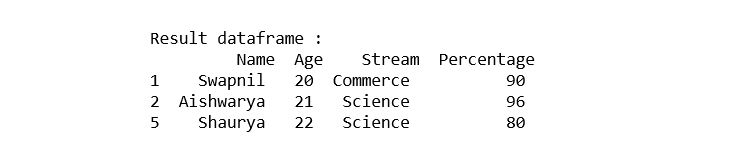

### Sanitycheck para removeCounternarrativeAndHateSpeech

In [ ]:
# Fixme: Pongo este False acá para llamar la atención
# y observar estos sanity checks a mano
1 == 0

In [ ]:

# Create pandas DataFrame
import pandas as pd
import numpy as np
technologies = {
    'Courses':["Spark","PySpark","Hadoop","Python"],
    'Fee' :[22000,25000,np.nan,24000],
    'Duration':['30day',None,'55days',np.nan],
    'Discount':[1000,2300,1000,np.nan]
          }
df = pd.DataFrame(technologies)
print(df)

In [ ]:
removeRowsFromDf(df, 'Spark', 'Courses')

In [ ]:
print(df)

In [ ]:
removeRowsFromDf(df, 'PySpark', 'Courses')

In [ ]:
print(df)

### Sanitycheck para makeDisjoint

In [ ]:
# Fixme: Pongo este False acá para llamar la atención
# y observar estos sanity checks a mano
1 == 0

In [ ]:
# Create pandas DataFrame
import pandas as pd
import numpy as np
technologies = {
    'Courses':["Spark","PySpark","Hadoop","Python"],
    'Fee' :[22000,25000,np.nan,24000],
    'Duration':['30day',None,'55days',np.nan],
    'Discount':[1000,2300,1000,np.nan]
          }
dfTest1 = pd.DataFrame(technologies)
print(dfTest1)

In [ ]:
# Create pandas DataFrame
import pandas as pd
import numpy as np
technologies = {
    'Courses':["ASpark","PySpark","AHadoop","Python"],
    'Fee' :[22000,25000,np.nan,24000],
    'Duration':['30day',None,'55days',np.nan],
    'Discount':[1000,2300,1000,np.nan]
          }
dfTest2 = pd.DataFrame(technologies)
print(dfTest2)

In [ ]:
list1 = ["Spark","PySpark","Hadoop","Python"]
list2 = ["ASpark","PySpark", "PySpark","AHadoop","Python"]
list1, list2 = makeDisjoint(list1, list2, dfTest1, dfTest2, 'Courses')

In [ ]:
list1

In [ ]:
list2

In [ ]:
dfTest1

In [ ]:
dfTest2

### Sanity check para conjunto_sin_repetidos_contranarrativa_i, conjunto_sin_repetidos_contranarrativa_k, conjunto_sin_repetidos_odio_i y conjunto_sin_repetidos_odio_k.

In [ ]:
conjunto_sin_repetidos_odio_i, conjunto_sin_repetidos_contranarrativa_i, conjunto_sin_repetidos_odio_k, conjunto_sin_repetidos_contranarrativa_k, dfOdiosYContanarrativasI, dfOdiosYContanarrativasK = generarConjuntosOdioIyKContranarrativaIyK()

In [ ]:
# Chequea que para toda contranarrativa en
# conjunto_sin_repetidos_contranarrativa,
# existe al menos un odio en 
# dfOdiosYContanarrativas que esté en 
# conjunto_sin_repetidos_odio.

def contranarrativaYOdioEstanEnDataFrameTomaContranarrativas(conjunto_sin_repetidos_contranarrativa, conjunto_sin_repetidos_odio, dfOdiosYContanarrativas):
    result = False
    for contranarrativa in conjunto_sin_repetidos_contranarrativa:
        result = False
        dfOdiosParaContranarrativa = dfOdiosYContanarrativas.loc[dfOdiosYContanarrativas['counterSpeech'] == contranarrativa]
        for index, row in dfOdiosParaContranarrativa.iterrows():
            if row['hateSpeech'] in conjunto_sin_repetidos_odio:
                result = True
        if result == False:
          return result      

    return result

In [ ]:
# Chequeo si para toda contranarrativa_i en
# conjunto_sin_repetidos_contranarrativa_i,
# existe al menos un odio_i en 
# dfOdiosYContanarrativasI que esté en 
# conjunto_sin_repetidos_odio_i.

contranarrativaYOdioEstanEnDataFrameTomaContranarrativas(conjunto_sin_repetidos_contranarrativa_i, conjunto_sin_repetidos_odio_i, dfOdiosYContanarrativasI)

In [ ]:
# Chequeo si para toda contranarrativa_k en
# conjunto_sin_repetidos_contranarrativa_k,
# existe al menos un odio_k en 
# dfOdiosYContanarrativasK que esté en 
# conjunto_sin_repetidos_odio_k.

contranarrativaYOdioEstanEnDataFrameTomaContranarrativas(conjunto_sin_repetidos_contranarrativa_k, conjunto_sin_repetidos_odio_k, dfOdiosYContanarrativasK)

In [ ]:
# Chequea que para todo odio en
# conjunto_sin_repetidos_odio,
# existe al menos una contranarrativa en 
# dfOdiosYContanarrativas que esté en 
# conjunto_sin_repetidos_contranarrativa.

def contranarrativaYOdioEstanEnDataFrameTomaOdios(conjunto_sin_repetidos_contranarrativa, conjunto_sin_repetidos_odio, dfOdiosYContanarrativas):
    result = False
    for odio in conjunto_sin_repetidos_odio:
        result = False
        dfContranarrativasParaOdio = dfOdiosYContanarrativas.loc[dfOdiosYContanarrativas['hateSpeech'] == odio]
        for index, row in dfContranarrativasParaOdio.iterrows():
            if row['counterSpeech'] in conjunto_sin_repetidos_contranarrativa:
                result = True
        if result == False:
            return result

    return result

In [ ]:
# Chequeo que para todo odio_i en
# conjunto_sin_repetidos_odio_i,
# exista al menos una contranarrativa_i en 
# dfOdiosYContanarrativasI que esté en 
# conjunto_sin_repetidos_contranarrativa_i.

contranarrativaYOdioEstanEnDataFrameTomaOdios(conjunto_sin_repetidos_contranarrativa_i, conjunto_sin_repetidos_odio_i, dfOdiosYContanarrativasI)

In [ ]:
# Chequeo que para todo odio_k en
# conjunto_sin_repetidos_odio_k,
# exista al menos una contranarrativa_k en 
# dfOdiosYContanarrativasK que esté en 
# conjunto_sin_repetidos_contranarrativa_k.

contranarrativaYOdioEstanEnDataFrameTomaOdios(conjunto_sin_repetidos_contranarrativa_k, conjunto_sin_repetidos_odio_k, dfOdiosYContanarrativasK)

### Chequeos sobre conjunto_sin_repetidos_contranarrativas_i y conjunto_sin_repetidos_contranarrativas_k.

In [ ]:
# Chequeo si conjunto_sin_repetidos_contranarrativas_i y conjunto_sin_repetidos_contranarrativas_k son disjuntos
disjoint(conjunto_sin_repetidos_contranarrativa_i, conjunto_sin_repetidos_contranarrativa_k)

In [ ]:
# Chequeo si conjunto_sin_repetidos_contranarrativas_i NO tiene repetidos:
len(conjunto_sin_repetidos_contranarrativa_i) == len(set(conjunto_sin_repetidos_contranarrativa_i))

In [ ]:
# Chequeo si conjunto_sin_repetidos_contranarrativas_k NO tiene repetidos:
len(conjunto_sin_repetidos_contranarrativa_k) == len(set(conjunto_sin_repetidos_contranarrativa_k))

### Chequeos sobre conjunto_sin_repetidos_odio_i y conjunto_sin_repetidos_odio_k.

In [ ]:
# Chequeo si conjunto_sin_repetidos_odio_i y conjunto_sin_repetidos_odio_k son disjuntos
disjoint(conjunto_sin_repetidos_odio_i, conjunto_sin_repetidos_odio_k)

In [ ]:
# Chequeo si conjunto_sin_repetidos_odio_i NO tiene repetidos:
len(conjunto_sin_repetidos_odio_i) == len(set(conjunto_sin_repetidos_odio_i))

In [ ]:
# Chequeo si conjunto_sin_repetidos_odio_k NO tiene repetidos:
len(conjunto_sin_repetidos_odio_k) == len(set(conjunto_sin_repetidos_odio_k))

## Sanity checks para NmaxelementsHeap

In [ ]:
list = [1, 23, 4545, 59, 22, 111, 1122]

In [ ]:
NmaxelementsHeap(list,1) == [(4545, 2)]

In [ ]:
NmaxelementsHeap(list,7) == [(4545, 2), (1122, 6), (111, 5), (59, 3), (23, 1), (22, 4), (1, 0)]

## Sanity chequeo que la generación de los embeddings sea determinística

### Chequeo si la generación de los embeddings es determinísitca:

In [ ]:
# Genero los embeddings
embeddings_hate_speech_conan_list_sin_repetidos_creado_por_lista1 = model.encode(hate_speech_conan_list_sin_repetidos, convert_to_tensor=True);

In [ ]:
# Genero los embeddings
embeddings_hate_speech_conan_list_sin_repetidos_creado_por_lista2 = model.encode(hate_speech_conan_list_sin_repetidos, convert_to_tensor=True);

In [ ]:
torch.equal(embeddings_hate_speech_conan_list_sin_repetidos_creado_por_lista1, embeddings_hate_speech_conan_list_sin_repetidos_creado_por_lista2)

### Chequeo si los vectores generados para las frases (frase1, frase2, frase3) son los mimsos que los que se generan para esas frases si se pasa como parámetro frase1, frase2, frase3, frase4, frase5).

In [ ]:
# Genero los embeddings para odio_4, odio_5 y odio_6
embeddings_hate_speech_4_5_6 = model.encode(hate_speech_conan_list_sin_repetidos[4:7], convert_to_tensor=True);

In [ ]:
# Genero los embeddings para odio_4, odio_5 y odio_6
embeddings_todos_los_hate_speech = model.encode(hate_speech_conan_list_sin_repetidos, convert_to_tensor=True);

In [ ]:
embeddings_todos_los_hate_speech.shape

In [ ]:
embeddings_hate_speech_4_5_6.shape

In [ ]:
torch.equal(embeddings_hate_speech_4_5_6, embeddings_todos_los_hate_speech[4:7])

In [ ]:
embeddings_hate_speech_4_5_6

In [ ]:
embeddings_todos_los_hate_speech[4:7]

### Chequeo si la generación de hate_speech_conan_list_sin_repetidos1 es determinísitca:

In [ ]:
"""
hate_speech_conan_list_sin_repetidos1 =list(set(list(hate_speech_conan.values.flatten()))) #fixme: mega importante: el set está para eliminar repetidos de la lista. Set toma una lista y devuleve un set (creo), posteriormente vuelvo a aplicar list asegurarme que hate_speech_conan_list_sin_repetidos es una lista.

#print(counternarratives_conan_list_sin_repetidos[0:5])
"""

In [ ]:
"""
hate_speech_conan_list_sin_repetidos2 =list(set(list(hate_speech_conan.values.flatten()))) #fixme: mega importante: el set está para eliminar repetidos de la lista. Set toma una lista y devuleve un set (creo), posteriormente vuelvo a aplicar list asegurarme que hate_speech_conan_list_sin_repetidos es una lista.

#print(counternarratives_conan_list_sin_repetidos[0:5])
"""

In [ ]:
"""
hate_speech_conan_list_sin_repetidos2 == hate_speech_conan_list_sin_repetidos1
"""

### Chequeo si la generación de hate_speech_conan es determinísitca:

In [ ]:
hate_speech_conan2 = df1[['hateSpeech']]

In [ ]:
hate_speech_conan1 = df1[['hateSpeech']]

In [ ]:
hate_speech_conan1.equals(hate_speech_conan2)

### Chequeo si la generación de df1 es determinísitca:

In [ ]:
df2 = pd.read_csv(url)

In [ ]:
df3 = pd.read_csv(url)

In [ ]:
df2.equals(df3)

### Chequeos deconectando y reiniciando el tiempo de ejecución: 

#### Chequeo si los embeddings son siempre los mismos cuando me desconecto y vuelvo a ejecutar todo

Me descargo el archivo embeddings_hate_speech.pkl, me desconecto del entorno de ejecución y reinicio el tiempo de ejecución, vuelvo a ejecutar todo. Esto genera un nuevo archivo embeddings_hate_speech.pkl, al comparar ambos archivos de ambas ejecuciones (embeddings_hate_speech.pkl de cada una de las ejecuciones), veo que hay una mínima diferencia de redondeo en aproximadmente 3 líneas de las más de 82000 que tienen los embeddings.

Hago lo mismo para embeddings_counternarratives.pkl y me da que ambos archivos son iugales.

Por lo que ahora puedo concluír que hay determinismo en la generación de embeddings.

## Sanity checks a correr_funcion_de_navegacion_estandar y a leer_funcion_de_navegacion_estandar

In [ ]:
#Sanity check para correr_funcion_de_navegacion_estandar y leer_funcion_de_navegacion_estandar:

# En esta celda levanto el csv y lo guardo en una lista de listas.
batch_size = 2
tope_superior = 3
correr_funcion_de_navegacion_estandar(modelName, batch_size, tope_superior)
lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_2_tope_3 = leer_funcion_de_navegacion_estandar(modelName, batch_size, tope_superior)

In [ ]:
#Sanity check para correr_funcion_de_navegacion_estandar y leer_funcion_de_navegacion_estandar:

# En esta celda levanto el csv y lo guardo en una lista de listas.
batch_size = 3
tope_superior = 3
correr_funcion_de_navegacion_estandar(modelName, batch_size, tope_superior)
lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_3_tope_3 = leer_funcion_de_navegacion_estandar(modelName, batch_size, tope_superior)

In [ ]:
len(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_2_tope_3) == len(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_3_tope_3)

In [ ]:
res = True
for i in range(0, len(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_3_tope_3)):
  for j in range (0,5):
    res = res and lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_3_tope_3[i][j] == lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_2_tope_3[i][j]
res

In [ ]:
len(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_2_tope_3)

In [ ]:
len(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_3_tope_3)

In [ ]:
#Sanity check para correr_funcion_de_navegacion_estandar y leer_funcion_de_navegacion_estandar:

# En esta celda levanto el csv y lo guardo en una lista de listas.
batch_size = 3
tope_superior = 10
correr_funcion_de_navegacion_estandar(modelName, batch_size, tope_superior)
lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_3_tope_10 = leer_funcion_de_navegacion_estandar(modelName, batch_size, tope_superior)

In [ ]:
#Sanity check para correr_funcion_de_navegacion_estandar y leer_funcion_de_navegacion_estandar:

# En esta celda levanto el csv y lo guardo en una lista de listas.
batch_size = 4
tope_superior = 10
correr_funcion_de_navegacion_estandar(modelName, batch_size, tope_superior)
lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_4_tope_10 = leer_funcion_de_navegacion_estandar(modelName, batch_size, tope_superior)

In [ ]:
len(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_3_tope_10) == len (lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_4_tope_10)

In [ ]:
# Chequeo si la metrica 1 da igual para el mismo tope superior, independientemente de con que batch size se la llame.
lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_3_tope_10 == lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_4_tope_10

res = True
for i in range(0, len(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_3_tope_10)):
  for j in range (0,5):
    res = res and lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_3_tope_10[i][j] == lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_4_tope_10[i][j]
res

In [ ]:
# Fixme: esta es la forma vieja de leer un csv. Para que se pueda ejecutar y 
# comparar con la nueva, hace falta:
  # Que exista un llamado a correr_funcion_de_navegacion_estandar(modelName, x,x) (notar 
  # que ambos parámetros son iguales).
  # Que exista. 
    # lista_leida_de_forma_nueva = leer_funcion_de_navegacion_estandar(modelName, x,x) (notar que ambos 
    # parámetros son iguales y son los mimos que para 
    # correr_funcion_de_navegacion_estandar(modelName, x,x)).
    # el filename de esta celda debe ser 
    # funcionDeNavegacionEstandarTop10ParticionContranarrativa0a(x-1) (con x el mismo que en los
    # renglones anteriores). 

#En esta celda levanto el csv y lo guardo en una lista de listas.

# csv file name
filename = modelName + "_funNavEstandarTop10ParticionContranarrativa0a" + str(batch_size - 1) + ".csv"
 
# initializing the titles and rows list
fields = []
rows = []

lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_Sanity_check = []
# reading csv file
with open(filename, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
     
    # extracting field names through first row
    fields = next(csvreader)
 
    # extracting each data row one by one
    for row in csvreader:
        rows.append(row)
 
    # get total number of rows
    print("Total no. of rows: %d"%(csvreader.line_num))
    
    # Armo una lista de lsitas con todos los elementos del csv:
    lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_Sanity_check = [];
    for row in rows:
        # parsing each column of a row
        rowList = [];
        for col in range(0,5): #Los primeros cinco elementos son chars que deseo convertir en ints
          rowList.append(int(row[col]));
        for col in range(5,len(row)): # los últimos 10 elementos son tuplas que no deseo modificar.
          rowList.append(row[col]);
          lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_Sanity_check.append(rowList);           
        lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_Sanity_check.append(rowList);

In [ ]:
lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_3_tope_3 == lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_batch_size_3_tope_3

## Aplico métrica 2 forma original (sólo para hacer sanity checks):

In [ ]:
# Métrica 2 en ranking de 10 elementos
lista_metrica_2_top10 = []
posicion_contranarrativas_encontradas = 8 
posicion_contranarrativas_totales = 10
cantidad_elementos_del_rankingTop10 = 10

for i in range(0, len(lista_pares_navegacion_estandar_top10)):
  metrica_2_para_par_i = lista_pares_navegacion_estandar_top10[i][posicion_contranarrativas_encontradas]/min(lista_pares_navegacion_estandar_top10[i][posicion_contranarrativas_totales],cantidad_elementos_del_rankingTop10)
  lista_metrica_2_top10.append(metrica_2_para_par_i)

In [ ]:
# Métrica 2 en ranking de 10 elementos con método matricial
lista_metrica_2_top10_matricial = []
posicion_contranarrativas_encontradas = 8 
posicion_contranarrativas_totales = 10
cantidad_elementos_del_rankingTop10 = 10

for i in range(0, len(lista_pares_navegacion_estandar_top10_matricial)):
  metrica_2_para_par_i_matricial = lista_pares_navegacion_estandar_top10_matricial[i][posicion_contranarrativas_encontradas]/min(lista_pares_navegacion_estandar_top10_matricial[i][posicion_contranarrativas_totales],cantidad_elementos_del_rankingTop10)
  lista_metrica_2_top10_matricial.append(metrica_2_para_par_i_matricial)

In [ ]:
# Métrica 2 en ranking de 10 elementos random
lista_metrica_2_top10_random = []
posicion_contranarrativas_encontradas = 8 
posicion_contranarrativas_totales = 10
cantidad_elementos_del_rankingTop10 = 10

for i in range(0, len(lista_pares_navegacion_estandar_top10_random)):
  metrica_2_para_par_i = lista_pares_navegacion_estandar_top10_random[i][posicion_contranarrativas_encontradas]/min(lista_pares_navegacion_estandar_top10_random[i][posicion_contranarrativas_totales],cantidad_elementos_del_rankingTop10)
  lista_metrica_2_top10_random.append(metrica_2_para_par_i)

####Sanity check comparando la métrica 2 de la forma original vs leída desde el csv.

In [ ]:
lista_metrica_2_top10_matricial == lista_metrica_2_top10_leida_de_csv

##Aplico métrica 3 de forma original (sólo para hacer sanity checks):

In [ ]:
metrica_3_top10 = sum(lista_metrica_2_top10)/len(lista_metrica_2_top10)
print('Métrica 3, con ranking de 10 elementos:', metrica_3_top10)

En una de las ejecuciones (100 odio y 100 contranarrat), el método matricial me dió:

Métrica 3, con ranking de 10 elementos: 0.14830262258723031

En mi compu (100 odio y 100 contranarrat), el método matricial me dió:
0.14837975427981692 

En mi compu (todos los odio y 100 contranarrat), el método matricial me dió:

0.16168990456515187

En una de las ejecuciones (todos los odio y 100 contranarrat), el método matricial me dió:

Métrica 3, con ranking de 10 elementos: 0.15029037619501082

En una de las ejecuciones (todos los odio y 200 contranarrat), el método matricial me dió: 

Métrica 3, con ranking de 10 elementos: 0.15722574064607484


In [ ]:
metrica_3_top10_matricial = sum(lista_metrica_2_top10_matricial)/len(lista_metrica_2_top10_matricial)
print('Métrica 3, con ranking de 10 elementos:', metrica_3_top10_matricial)

In [ ]:
# Calculo la métrica 3 para el ranking random de 10 elementos.
metrica_3_top10_random = sum(lista_metrica_2_top10_random)/len(lista_metrica_2_top10_random)
print('Métrica 3, con ranking de 10 elementos elegidos al azar:', metrica_3_top10_random)

### Sanity check comparando la métrica 3 de la forma original vs leída desde el csv.

In [ ]:
metrica_3_top10 == metrica_3_top10_csv

## Sanity checks para función de navegación basada en centroides

In [ ]:
desplazamiento = desplazamientoCentroides(embeddings_counternarratives_i, embeddings_hate_speech_i)

El vector de desplazamiento, debe tener las mismas dimensiones que cada uno de los embeddings de los dos conjuntos los que fue calculada.

In [ ]:
desplazamiento.shape[0] == embeddings_counternarratives_i.shape[1]

In [ ]:
desplazamiento.shape[0] == embeddings_hate_speech_i.shape[1]

## Sanity checks para las "Métricas para rankings". Importante: fueron calculadas con el modelo 'all-MiniLM-L6-v2', por lo que únicamente darán True si: modelName ==  'all-MiniLM-L6-v2'



### Sanity checks para Average Value of Precision at k (P@k)

In [ ]:
# Sanity check para precisionAtK
precisionAtK(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[0], 10, False) == 0.2 # sé que es 0.2 porque el ranking en la posición 0 de lista_pares_navegacion_estandar_top10_matricial_leida_de_csv, tiene 2 de 10 resultados correctos.

In [ ]:
# Sanity check para precisionAtK
precisionAtK(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[0], 1, False) == 1

In [ ]:
# Sanity check para precisionAtK
precisionAtK(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[3], 3, False) == 0.6666666666666666


In [ ]:
# Sanity check para averagePrecisionAtK
round(averageValuePrecisionAtK(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[0:5], 10, False), 2) == 0.12 # sé que es 0,12 porque lo caclulé a mano. Lo redondeo porque tiene muchos decimales.

In [ ]:
# Sanity check para averagePrecisionAtK con ranking random
ranking_para_test_averagePrecisionAtK_random = lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random[0:10]
round(averageValuePrecisionAtK(ranking_para_test_averagePrecisionAtK_random, 10, random=True), 2) == 0.02 # sé que es 0.02 porque lo caclulé a mano. Lo redondeo porque tiene muchos decimales.

### Sanity checks para Average Value of Recall at k

In [ ]:
# Test para recallAtK:
recallAtK(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[6], 10, False) == 0.4 # Se que vale 0.4 porque lo calculé a mano.

In [ ]:
# Test para averageRecallAtK:
round(averageRecallAtK(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[0:6], 10, False),3) == 0.533 # Se que vale 0.533 porque lo calculé a mano.

In [ ]:
# Test para averageRecallAtK con ranking random:
averageRecallAtK(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random[0:6], 10, True) == (1/5)/6 # Se que vale (1/5)/6 porque lo calculé a mano.

### Sanity checks para F1@k

In [ ]:
# Test para f1Atk.
round(f1Atk(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[0],10, False),2,) == 0.33 # Sé que debe valer 0.33 porque lo calculé a mano.

In [ ]:
# Test para averageF1Atk
round(averageF1Atk(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[0:6],10, False),4) == 0.1889 # Sé que debe valer 0.1889 porque lo calculé a mano.

In [ ]:
# Test para averageF1Atk con ranking random
round(averageF1Atk(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random[0:6],10, True),4) == 0.0222 # Sé que debe valer 0.0222 porque lo calculé a mano.

### Sanity checks para topKAccuracy

In [ ]:
# Test para topKAccuracy
topKAccuracy(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[0:10], 10, False) == 0.8 # Sé que es 0.8 porque lo calculé a mano.

In [ ]:
# Test para topKAccuracy con ranking random
topKAccuracy(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv_random[0:10], 10, True) == 0.2 # Sé que es 0.2 porque lo calculé a mano.

###Sanity check para DCG

In [ ]:
# Test para DCG
round(DCG(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[0], 10, False),6) == 1.333333 # Sé que dá 1.333333 porque lo calculé a mano.

In [ ]:
# Test para averageDCG:
round(averageDCG(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[0:5],10, False),15) == 0.892852617380958  # Sé que vale 0.892852617380958, porque lo calculé a mano.

### Sanity check para averagePrecissionAtK

In [ ]:
averagePrecissionAtK(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[0],1, False) == 1.0

In [ ]:
averagePrecissionAtK(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[3],3, False) == 0.8333333333333333

In [ ]:
averagePrecissionAtK(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[3],10, False) == 0.8333333333333333

### Sanity check para meanAveragePrecissionAtK

In [ ]:
meanAveragePrecissionAtK(lista_pares_navegacion_estandar_top10_matricial_leida_de_csv[0:4], 10, False) == 0.369047619047619

In [ ]:
#Fixme: libero memoria, creo que esto ya no es necesario.
"""
del(lista_contranarrativa_i_embedding_matricial)removeDuplicatesFromList
del(df_odio_en_conan_list_matricial)
del(odio_i_lista_sanity_check_matricial)
del(lista_listas_odio_i_embedding_matricial)
del(lista_listas_embedding_contranarrativa_i_sin_discurso_de_odio_i_matricial)
del(lista_listas_listas_odio_k_embedding_creado_por_lista_matricial)
del(indices_contranarrativa_i_odio_i_odio_k)
del(cos_sim_calculado_con_matriz)
del(lista_pares_navegacion_estandar_top10_matricial)
"""

#Prueba de hipótesis a mano: un embedding calculado como propone la hipótesis comparado contra todo el dataset

Voy a hacer una prueba a mano de la versión del experimento que es más fácil de implementar, es decir:
1. Partir del embedding de contranarrativa_1.
2. Al embedding de contranarrativa_1, restarle el embedding de odio_1. Suponiendo que esto nos deja en el espacio vectorial cercano a "contranarrativa sin mensaje de odio asignado".
3. Sumarle el embedding de odio_2 y esperar que esto nos deje en el espacio vectorial cercano al embedding de contranarrativa_2.



El plan es:

1. Voy a elegir una contranarrativa_1 a mano y voy a buscar su sentence embedding.
2. Voy a elegir odio_1 (el mensaje de odio que le corresponde a contranarrativa_1 en el dataset del CONAN), voy a buscar su sentence embedding y restarselo a embedding de contranarrativa_1.
3. Voy a elegir un mensaje odio_2, voy a buscar su sentence embedding y voy a sumárselo al resultado del paso 2.
4. Voy a calcular la similaridad coseno entre el resultado del paso anterior y los embeddings de todas las **contranarratiavs del Conan**. Espero que la que tenga valor más alto, corresponda a una contranarrativa que "sirva" (en sentido de que contraargumente) contra al mensaje odio_2, idealmente quiero que sea una contranarrativa que en el dataset original (Conan), aparezca asignada a odio_2. 

## **Nota al márgen: Cómo elegir pares de contranarrativas y discursos de odio para las pruebas a mano**

Se puede elegir un odio_2 tal que sea muy diferente a odio_1 (también se puede elegir un odio_2 tal que sea muy similar a odio_1), además hay discursos de odio a los que se responde con distintas contranarrativas, puedo elegir odio_1=odio_2 y contranarrativa_1 != contranarrativa_2. También los puedo elegir según su similitud coseno (similitud coseno entre contranarrativa_1 y contranarrativa_2 y entre odio_1 y odio_2).

## **Prueba a mano n1:**

En esta primera prueba, voy a elegir los mensaje de odio y sus contranarrativas sin pensar demasiado cómo los elijo.

Elijo:

* contranarrativa_1: To be fair, the OFSTED report is more concerned with lack of enforcement and less about focussing on the practice of any particular faith.

El mensaje de odio que le corresponde es:
* odio_1: 	According to a recent OFSTED report, a school in Birmingham is still segregating girls and boys, despite a Hight Court ruling in 2017 that this is unlawful.


* contranarrativa_2: While this story is presented as an 'Islamic issue', the OFSTED report refers to 'countless' faith schools still that still illegally maintain gender segregation - my guess is this is a cross-faith practice and not exclusive to Islamic faith schools.

El mensaje de odio que le corresponde es:

* odio_2: In Birmingham there is a school where girls and boys are separeted even if it isn't legal.	


#### **Ejecución del plan:**

##### 1. Voy a elegir una contranarrativa_1 a mano y voy a buscar su sentence embedding

* contranarrativa_1: To be fair, the OFSTED report is more concerned with lack of enforcement and less about focussing on the practice of any particular faith.

In [ ]:
#Busco el índice de contranarrativa_1.
i = conjunto_sin_repetidos_contranarrativa_i.index('To be fair, the OFSTED report is more concerned with lack of enforcement and less about focussing on the practice of any particular faith.')

In [ ]:
#Chequeo que efectivamente el índice obtenido corresponda a contranarrativa_1 (si es así, esta celda debe devolver true):
conjunto_sin_repetidos_contranarrativa_i[i] == 'To be fair, the OFSTED report is more concerned with lack of enforcement and less about focussing on the practice of any particular faith.'

In [ ]:
# Chequeo si la contranarrativa que estoy buscando, está en la posición i.
conjunto_sin_repetidos_contranarrativa_i[i]

In [ ]:
contranarrativa_1_embedding_creado_por_lista = embeddings_counternarratives_i[i];

In [ ]:
# Comento esta celda, porque como no está dando el mismo embedding, no quiero por error utilizar embedding_contranarrativa_1
#Genero el embedding para la contranarrativa_1 
#embedding_contranarrativa_1 = model.encode(counternarratives_conan_list_sin_repetidos[i], convert_to_tensor=True)

In [ ]:
# Fixme: yo espero que esta comparación me de true, pero da false. 
#(contranarrativa_1_embedding_creado_por_lista==embedding_contranarrativa_1).all()

In [ ]:
#contranarrativa_1_embedding_creado_por_lista.shape

In [ ]:
#embedding_contranarrativa_1.shape

In [ ]:
# Comento esta celda, porque como no está dando el mismo embedding, no quiero por error utilizar embedding_contranarrativa_1

#Chequeo si el embedding_contranarrativa_1 es igual al embedding que cree con la lista más arriba (esta 
# celda no hace al experimento todavía, pero me sirve para saber que puedo calcular los embeddings de varias
# maneras). Si los embeddings son iguales, esta celda debe devolver true:
#np.array_equal(embedding_contranarrativa_1[0], embeddings_counternarratives_conan_list_sin_repetidos_creado_por_lista[i])

##### 2. Voy a elegir odio_1 (el mensaje de odio que le corresponde a contranarrativa_1 en el dataset del CONAN), voy a generar su sentence embedding y restarselo a embedding de contranarrativa_1.



Se que odio_1 es el siguiente, porque lo encuentro revisando el dataframe del conan:

* odio_1: In Birmingham there is a school where girls and boys are separeted even if it isn't legal.

In [ ]:
# Busco el índice de odio_1.
j = conjunto_sin_repetidos_odio_i.index('In Birmingham there is a school where girls and boys are separeted even if it isn\'t legal.')

In [ ]:
#Chequeo que efectivamente el índice obtenido corresponda a odio_1  (si es así, esta celda debe devolver true):
conjunto_sin_repetidos_odio_i[j] == 'In Birmingham there is a school where girls and boys are separeted even if it isn\'t legal.'

In [ ]:
odio_1_embedding_creado_por_lista = embeddings_hate_speech_i[j];

In [ ]:
# Comento esta celda, porque como no está dando el mismo embedding, no quiero por error utilizar embedding_odio_1

#Genero el embedding para odio_1
#embedding_odio_1 = model.encode(hate_speech_conan_list_sin_repetidos[j], convert_to_tensor=True)

In [ ]:
# Comento esta celda, porque como no está dando el mismo embedding, no quiero por error utilizar embedding_odio_1

#Chequeo si el embedding_odio_1 es igual al embedding que cree con un for loop más arriba (esta celda no
# hace al experimento todavía, pero me sirve para saber que puedo calcular los embeddings de varias maneras):
#np.array_equal(embedding_odio_1, embeddings_hate_speech_conan_list_sin_repetidos_creado_por_lista[j])

In [ ]:
# Resto el embedding de odio_1 al de contranarrativa_1.
embedding_contranarrativa_1_sin_discurso_de_odio_1 = contranarrativa_1_embedding_creado_por_lista - odio_1_embedding_creado_por_lista

In [ ]:
# Sanity check: comparo con la función subtract (hace element-wise substraction). 
# Espero que esta celda me de true.
embedding_contranarrativa_1_sin_discurso_de_odio_1_subtract = np.subtract(contranarrativa_1_embedding_creado_por_lista, odio_1_embedding_creado_por_lista)

(embedding_contranarrativa_1_sin_discurso_de_odio_1_subtract == embedding_contranarrativa_1_sin_discurso_de_odio_1).all()

##### 3. Voy a elegir un mensaje odio_2, voy a buscar su sentence embedding y voy a sumárselo al resultado del paso 2.

* odio_2: According to a recent OFSTED report, a school in Birmingham is still segregating girls and boys, despite a Hight Court ruling in 2017 that this is unlawful.

In [ ]:
# Busco el índice de odio_2 para obtener su sentence embedding.
k = conjunto_sin_repetidos_odio_k.index('According to a recent OFSTED report, a school in Birmingham is still segregating girls and boys, despite a Hight Court ruling in 2017 that this is unlawful.')

In [ ]:
#Chequeo que efectivamente el índice obtenido corresponda a odio_2  (si es así, esta celda debe devolver true):
conjunto_sin_repetidos_odio_k[k] == 'According to a recent OFSTED report, a school in Birmingham is still segregating girls and boys, despite a Hight Court ruling in 2017 that this is unlawful.'

In [ ]:
odio_2_embedding_creado_por_lista = embeddings_hate_speech_k[k];

In [ ]:
# Comento esta celda, porque como no está dando el mismo embedding, no quiero por error utilizar embedding_odio_2

#Genero el embedding para odio_2
#embedding_odio_2 = model.encode([hate_speech_conan_list_sin_repetidos[k]], convert_to_tensor=True)

In [ ]:
# Comento esta celda, porque como no está dando el mismo embedding, no quiero por error utilizar embedding_odio_2

#Chequeo si el embedding_odio_2 es igual al embedding que cree con un for loop más arriba (esta celda no
# hace al experimento todavía, pero me sirve para saber que puedo calcular los embeddings de varias maneras):
#np.array_equal(embedding_odio_2, embeddings_hate_speech_conan_list_sin_repetidos_creado_por_lista[k])

In [ ]:
# Sumo el embedding de odio_2 al resultado del paso 2 
# (embedding_contranarrativa_1_sin_discurso_de_odio_1).

embedding_cercano_a_contranarrativa_para_odio_2 = embedding_contranarrativa_1_sin_discurso_de_odio_1 + odio_2_embedding_creado_por_lista

In [ ]:
# chequeo que el embedding embedding_cercano_a_contranarrativa_para_odio_2
# tenga el mismo shape que los embeddings de embeddings_hate_speech_i y que
# el emmeding embedding_contranarrativa_1

embedding_cercano_a_contranarrativa_para_odio_2.shape == embeddings_hate_speech_i[0].shape == contranarrativa_1_embedding_creado_por_lista.shape

In [ ]:
# Sanity check: comparo con la función add (hace element-wise addition). 
# Espero que esta celda me de true.
embedding_cercano_a_contranarrativa_para_odio_2_add = np.add(embedding_contranarrativa_1_sin_discurso_de_odio_1, odio_2_embedding_creado_por_lista)

(embedding_cercano_a_contranarrativa_para_odio_2_add == embedding_cercano_a_contranarrativa_para_odio_2).all()

##### 4. Voy a calcular la similaridad coseno entre el resultado del paso anterior (embedding_cercano_a_contranarrativa_para_odio_2) y los embeddings de las contranarrativas del Conan que están en el conjunto k (embeddings_counternarratives_k). 

Espero que la que tenga valor más alto, corresponda a una contranarrativa que "sirva" (en sentido de que contraargumente) contra el mensaje odio_2, idealmente quiero que sea una contranarrativa que en el dataset original (Conan), aparezca asignada a odio_2.

Las contranarrativa correspondiente a odio_2 en embeddings_counternarratives_k son:



*   While this story is presented as an 'Islamic issue', the OFSTED report refers to 'countless' faith schools still that still illegally maintain gender segregation - my guess is this is a cross-faith practice and not exclusive to Islamic faith schools.
*   Gender segregation in faith schools is clearly a negative, but hardly exclusive to some Islamic schools. I was 15 before I attended mixed classes, but then, this was regarded as normal in the 1960's / 70's. The issue is really, if we are to allow faith based education, we need effective mechanisms to uphold standards, and legal requirements.



Como mejor caso, quisiera que los embeddings con similitud coseno más grande con embedding_cercano_a_contranarrativa_para_odio_2, sean estos embeddings.

Antes de calcular la similaridad coseno entre embedding_cercano_a_contranarrativa_para_odio_2 y embeddings_counternarratives_k, voy a examinarlos para estar seguro de que son comparables.

Puedo ver que uno es una lista embeddings y el otro es un embedding.

In [ ]:
#Busco el índice de contranarrativa_1.
i = conjunto_sin_repetidos_contranarrativa_k.index('Gender segregation in faith schools is clearly a negative, but hardly exclusive to some Islamic schools. I was 15 before I attended mixed classes, but then, this was regarded as normal in the 1960\'s / 70\'s. The issue is really, if we are to allow faith based education, we need effective mechanisms to uphold standards, and legal requirements.')

In [ ]:
# Computo la similaridad coseno de embedding_cercano_a_contranarrativa_para_odio_2, 
# contra todos los embeddings de las contranarrativas del conjunto k
# (embeddings_counternarratives_k).

# Calculo la similaridad coseno 
cos_sim_embedding_cercano_a_contranarrativa_para_odio_2_conan = util.cos_sim(embedding_cercano_a_contranarrativa_para_odio_2, embeddings_counternarratives_k)

In [ ]:
cos_sim_embedding_cercano_a_contranarrativa_para_odio_2_conan.shape 

In [ ]:
len(cos_sim_embedding_cercano_a_contranarrativa_para_odio_2_conan[0])

In [ ]:
# Chequeo que tengo una distancia coseno por cada elemento en counternarratives_conan_list_sin_repetidos (si es así esta celda debería devolver true).
len(conjunto_sin_repetidos_contranarrativa_k) == len(cos_sim_embedding_cercano_a_contranarrativa_para_odio_2_conan[0])

In [ ]:
#Add all pairs to a list with their cosine similarity score
all_sentence_combinations_cercano_a_contranarrativa_para_odio_2 = []
for i in range(0, len(cos_sim_embedding_cercano_a_contranarrativa_para_odio_2_conan[0])):  # Fixme: mega importante: lo siguiente aplica para cuando estoy comparando un embedding contra todo el resto, cuando comparo todos contra todos, tengo que poner cos_sim, en vez de cos_sim[0]. Es importante pedirle la primera posición a cos_sim porque cos_sim es un tensor (una matriz, de 1xCantidadDeEmbedings contra los que estoy comparando al embedding i, por eso, si len(cos_sim[0])=1 y len(cos_sim[0])=CantidadDeEmbedings).
    all_sentence_combinations_cercano_a_contranarrativa_para_odio_2.append([cos_sim_embedding_cercano_a_contranarrativa_para_odio_2_conan[0][i], i]) #fixme: mega importante, acá a cos_sim_embedding_cercano_a_contranarrativa_para_odio_2_conan le hadrcodeo un [0], porque este es un tensor de tamaño 1x29976, si quiero acceder a la primera "fila", necesito ese [0]. Quizás haya una forma más elegante de resolverlo.

In [ ]:
all_sentence_combinations_cercano_a_contranarrativa_para_odio_2;

La siguiente celda está obsoleta porque ya no ordeno todas las contranarrativas según su cos_sim, sino que directamente selecciono las top N con mayor cos_sim usando la función NmaxElements

In [ ]:
#Sort list by the highest cosine similarity score
all_sentence_combinations_cercano_a_contranarrativa_para_odio_2 = sorted(all_sentence_combinations_cercano_a_contranarrativa_para_odio_2, key=lambda x: x[0], reverse=True)
counternarratives_ranking_list =[]

print("Ranking ordered by sentence similarity (the first 10 results):")
for score, i in all_sentence_combinations_cercano_a_contranarrativa_para_odio_2[0:10]: #fixme: mega importante, chequear que el rango [0:100] son 100 resultados y no 101.
    counternarratives_ranking_list.append(conjunto_sin_repetidos_contranarrativa_k[i])
    print("{} \t {:.4f}".format(conjunto_sin_repetidos_contranarrativa_k[i], cos_sim_embedding_cercano_a_contranarrativa_para_odio_2_conan[0][i])) #fixme: mega importante, acá a cos_sim_embedding_cercano_a_contranarrativa_para_odio_2_conan le hadrcodeo un [0], porque este es un tensor de tamaño 1x6803, si quiero acceder a la primera "fila", necesito ese [0]. Quizás haya una forma más elegante de resolverlo.   #fixme: '\t' es un tab space. '{}' tina
    # inputs y los coloca donde aparece el '{}' (en este caso, el primer parámetro es sentences[i]). {:.4f} es algo de la función format, que no busqué todavía.

### Métricas a mano para la prueba mano n1:

Busco la forma de dado un tuit de odio, obtener todas sus contranarrativas en Conan. Lo resuelvo así:

In [ ]:
df_contranarrativas_en_conan_para_odio_2=sentences_conan.loc[sentences_conan['hateSpeech'] == 'In Birmingham there is a school where girls and boys are separeted even if it isn\'t legal.', 'counterSpeech']
df_contranarrativas_en_conan_para_odio_2

Busco forma de chequear si una frase está en un dataframe:

In [ ]:
'To be fair, the OFSTED report is more concerned with lack of enforcement and less about focussing on the practice of any particular faith.' in df_contranarrativas_en_conan_para_odio_2.values

### Función de navegación estándar: cuántos de las top 10 contranarrativas sugeridas en el ranking, efectivamente aparecen en el Conan como contranarrativas para el discurso de odio_2

In [ ]:
funcionDeNavegacionEstandar = 0;
for i in range(0,len(counternarratives_ranking_list)):
  if counternarratives_ranking_list[i] in df_contranarrativas_en_conan_para_odio_2.values and counternarratives_ranking_list[i] in conjunto_sin_repetidos_contranarrativa_k:
      funcionDeNavegacionEstandar += 1;
print('En la prueba a mano el ranking eligió',funcionDeNavegacionEstandar, 'de las 2 contranarrativas que existen en el Conan') #Fixme: hardcodeo el "de las 2 contranarrativas..." porque sé que en conjunto_sin_repetidos_contranarrativa_k hay 2 contranarrativas para odio_2

Hago el chequeo a mano y corroboro que la métrica está bien.

### Hago una prueba a mano del cuerpo del for (para chequear que me da igual a la sección "Prueba a mano n1") :

In [ ]:
#Busco el índice de contranarrativa_1.
i = conjunto_sin_repetidos_contranarrativa_i.index('To be fair, the OFSTED report is more concerned with lack of enforcement and less about focussing on the practice of any particular faith.')

In [ ]:
# La contranarrativa i es:
conjunto_sin_repetidos_contranarrativa_i[i]

In [ ]:
#selecciono el embedding de la contranarrativa_i
contranarrativa_i_embedding_creado_por_lista = embeddings_counternarratives_i[i];

In [ ]:
#Chequeo si los siguientes dos embeddings son iguales (espero que lo sean):
np.array_equal(contranarrativa_i_embedding_creado_por_lista, contranarrativa_1_embedding_creado_por_lista)

In [ ]:
# Filtro dfOdiosYContanarrativasI, tal que los mensajes de odio, aparezcan en conjunto_sin_repetidos_odio_i
df_odio_conjunto_sin_repetidos_odio_i = dfOdiosYContanarrativasI[dfOdiosYContanarrativasI['hateSpeech'].isin(conjunto_sin_repetidos_odio_i)]

In [ ]:
# Busco los discursos de odio para la contranarrativa_i
df_oido_conjunto_sin_repetidos_odio_i_para_contranarrativa_i = df_odio_conjunto_sin_repetidos_odio_i.loc[df_odio_conjunto_sin_repetidos_odio_i['counterSpeech'] == conjunto_sin_repetidos_contranarrativa_i[i], 'hateSpeech'] 
df_oido_conjunto_sin_repetidos_odio_i_para_contranarrativa_i

In [ ]:
# Chequeo que los disursos de odio estén en conjunto_sin_repetidos_odio_i (esto no está en el for loop, pero es un chequeo que hago yo):
"In Birmingham there is a school where girls and boys are separeted even if it isn't legal." in conjunto_sin_repetidos_odio_i

In [ ]:
# Chequeo que los disursos de odio estén en conjunto_sin_repetidos_odio_i (esto no está en el for loop, pero es un chequeo que hago yo):
"A school in Birningham is still separating girls from boys. This information come from a Ofsted report. A high court said in 2017 that this type of action is illegal." in conjunto_sin_repetidos_odio_i

In [ ]:
# Elijo uno de los discursos de odio para la conranarrativa_i (la llamo odio_i). 
# Fixme: acá tengo más de una opción para elegir un discurso de odio para la 
# contranarrativa_i (tengo que pensar de que forma voy a elegir entre las diferentes opciones),
# acá estoy eligiendo el hatespeech 0.

odio_i = df_oido_conjunto_sin_repetidos_odio_i_para_contranarrativa_i.values[0]
odio_i



In [ ]:
# Uno de los posibles odio_i es "In Birmingham there is a school where girls
# and boys are separeted even if it isn't legal.", chequeo que efectivamente 
# lo sea.

odio_i == "In Birmingham there is a school where girls and boys are separeted even if it isn't legal."

In [ ]:
# Busco el embedding de odio_i de los que aparecen junto a 
# contranarrativa_i en Conan 
# (fixme: para una contranarrativa puede haber varios mensajes de odio, decidir
# que hago todos ellos).

# Busco el índice de odio_i.
indice_odio_i = conjunto_sin_repetidos_odio_i.index(odio_i)

# Busco el embedding para odio_i
odio_i_embedding_creado_por_lista = embeddings_hate_speech_i[indice_odio_i]

In [ ]:
indice_odio_i

In [ ]:
#chequeo si odio_i == odio_1
conjunto_sin_repetidos_odio_i[indice_odio_i] == odio_i

In [ ]:
#Chequeo si el embeddings de odio_i y de odio_1 son iguales (espero que lo sean):
np.array_equal(odio_i_embedding_creado_por_lista, odio_1_embedding_creado_por_lista)

In [ ]:
# Resto el embedding de odio_i al de contranarrativa_i.
embedding_contranarrativa_i_sin_discurso_de_odio_i = contranarrativa_i_embedding_creado_por_lista - odio_i_embedding_creado_por_lista


In [ ]:
#Chequeo si embedding_contranarrativa_i_sin_discurso_de_odio_i y embedding_contranarrativa_1_sin_discurso_de_odio_1 son iguales (espero que lo sean):
np.array_equal(embedding_contranarrativa_i_sin_discurso_de_odio_i, embedding_contranarrativa_1_sin_discurso_de_odio_1)


In [ ]:
# Elijo un mensaje odio_k (distinto a odio_i)
# Fixme: acá puedo elegir cualquier mensaje de odio, quisiera que no sea odio_i,
# tengo que eleigr una forma de elegir a odio_k
odio_k = conjunto_sin_repetidos_odio_k[k]
odio_k

In [ ]:
# Busco el embedding de odio_k embedding
odio_k_embedding_creado_por_lista = embeddings_hate_speech_k[k];

In [ ]:
#Chequeo si el embeddings de odio_k y de odio_2 son iguales (espero que lo sean):
np.array_equal(odio_k_embedding_creado_por_lista, odio_2_embedding_creado_por_lista)

In [ ]:
# Sumo el embedding de odio_K a embedding_contranarrativa_i_sin_discurso_de_odio_i.
embedding_cercano_a_contranarrativa_para_odio_k = embedding_contranarrativa_i_sin_discurso_de_odio_i + odio_k_embedding_creado_por_lista

In [ ]:
#Chequeo si el embedding_cercano_a_contranarrativa_para_odio_k y
# embedding_cercano_a_contranarrativa_para_odio_2 son iguales (espero que lo sean):
np.array_equal(embedding_cercano_a_contranarrativa_para_odio_k, embedding_cercano_a_contranarrativa_para_odio_2)

In [ ]:
# Calculo la similaridad coseno entre el resultado del paso anterior
# (embedding_cercano_a_contranarrativa_para_odio_k) y los embeddings
# de todas las contranarrativas_k del Conan (embeddings_counternarratives_k).
cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan = util.cos_sim(embedding_cercano_a_contranarrativa_para_odio_k, embeddings_counternarratives_k)

#Add all pairs to a list with their cosine similarity score
all_sentence_combinations_cercano_a_contranarrativa_para_odio_k = []
for h in range(0, len(cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan[0])):  # Fixme: mega importante: lo siguiente aplica para cuando estoy comparando un embedding contra todo el resto, cuando comparo todos contra todos, tengo que poner cos_sim, en vez de cos_sim[0]. Es importante pedirle la primera posición a cos_sim porque cos_sim es un tensor (una matriz, de 1xCantidadDeEmbedings contra los que estoy comparando al embedding h, por eso, si len(cos_sim[0])=1 y len(cos_sim[0])=CantidadDeEmbedings).
    all_sentence_combinations_cercano_a_contranarrativa_para_odio_k.append([cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan[0][h], h]) #fixme: mega importante, acá a cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan le hadrcodeo un [0], porque este es un tensor de tamaño 1x29976, si quiero acceder a la primera "fila", necesito ese [0]. Quizás haya una forma más elegante de resolverlo

#Sort list by the highest cosine similarity score
all_sentence_combinations_cercano_a_contranarrativa_para_odio_k = sorted(all_sentence_combinations_cercano_a_contranarrativa_para_odio_k, key=lambda x: x[0], reverse=True)

counternarratives_ranking_list =[]
counternarretives_ranking_list_embeddings = [] # fixme: sólamente lo uso para plotear abajo.
for score, l in all_sentence_combinations_cercano_a_contranarrativa_para_odio_k[0:10]: #fixme: mega importante, chequear que el rango [0:10] son 10 resultados y no 11.
    counternarratives_ranking_list.append(conjunto_sin_repetidos_contranarrativa_k[l])
    counternarretives_ranking_list_embeddings.append(embeddings_counternarratives_k[l])
counternarretives_ranking_list_embeddings = torch.stack(counternarretives_ranking_list_embeddings, 0)

df_contranarrativas_en_conan_para_odio_k = dfOdiosYContanarrativasK.loc[dfOdiosYContanarrativasK['hateSpeech'] == conjunto_sin_repetidos_odio_k[k], 'counterSpeech'] #fixme: ojo con esto, tengo que chequear que el hate speech que me interesa es efectivamente "conjunto_sin_repetidos_odio_k[k]"
print(df_contranarrativas_en_conan_para_odio_k)

funcionDeNavegacionEstandar = 0;
for m in range(0,len(counternarratives_ranking_list)):
  if counternarratives_ranking_list[m] in df_contranarrativas_en_conan_para_odio_k.values :
      funcionDeNavegacionEstandar += 1;
print('En la prueba a mano del cuerpo del for para el mensaje de odio número', k, 'el ranking eligió', funcionDeNavegacionEstandar, 'de las', df_contranarrativas_en_conan_para_odio_k.shape[0],'contranarrativas que existen en el Conan')

Compruebo que efetivamente el curpo del for da igual que la secciń "Prueba a mano n1".

### Ploteo los embeddings del caso a mano.

Contranarrativa_i = 'To be fair, the OFSTED report is more concerned with lack of enforcement and less about focussing on the practice of any particular faith.'
	contranarrativa_i_embedding_creado_por_lista

Odio_i = 'According to a recent OFSTED report, a school in Birmingham is still segregating girls and boys, despite a Hight Court ruling in 2017 that this is unlawful.'
odio_i_embedding_creado_por_lista

Odio_k = 'In Birmingham there is a school where girls and boys are separeted even if it isn't legal.'

Contranararrativas correctas para Odio_k.

### Ploteo contranarrativa_i, odio_i y odio_k, el ranking Top 10 y las contranarrativas para odio_k usando PCA.

In [ ]:
counternarretives_ranking_list_embeddings.shape

In [ ]:
odio_i_embedding_creado_por_lista[None, :].shape

In [ ]:
# Busco los embeddings de las contranarrativas para odio_k
contranarrativas_para_odio_k_embeddings = []
for contranarrativa in df_contranarrativas_en_conan_para_odio_k.iteritems():
  contranarrativas_para_odio_k_embeddings.append(embeddings_counternarratives_conan_list_sin_repetidos_creado_por_lista[counternarratives_conan_list_sin_repetidos.index(contranarrativa[1])])
contranarrativas_para_odio_k_embeddings = torch.stack(contranarrativas_para_odio_k_embeddings, 0)


In [ ]:
# Concateno los embeddings de contranarrativa_i, odio_i y odio_k,
# con los embeddings del ranking Top 10 y con las contranarrativas para odio_k
embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK =torch.cat((contranarrativa_i_embedding_creado_por_lista[None, :], odio_i_embedding_creado_por_lista[None, :], odio_k_embedding_creado_por_lista[None, :],counternarretives_ranking_list_embeddings, contranarrativas_para_odio_k_embeddings, embedding_cercano_a_contranarrativa_para_odio_k[None, :]), 0)

In [ ]:
contranarrativas_para_odio_k_embeddings.shape

In [ ]:
# Fixme: Sacado de  Hands-on Machine Learning with Scikit-Learn, Keras & 
# TensorFlow (libro): you can set n_components to be a float between 0.0 and 1.0, 
# indicating the ratio of variance you wish to preserve.

# PCA: Reduzco a 3 dimensiones (ya se puede plotear).
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK_3d = pca.fit_transform(embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK)

In [ ]:
embeddings_contanarrativa_i_odio_i_odio_k_top10Contranarrat_4ContranarrativasParaOdioK_3d.shape

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Sanity checks para Nmaxelements

In [ ]:
# Function returns N largest elements and the position they have in the input list.
def Nmaxelements(list1, N):
    final_list = []
    posicionesConMaximos = set()

    for i in range(0, N):
        max1 = 0

        for j in range(len(list1)):    
            if ((list1[j] >= max1) and (j not in posicionesConMaximos)):
                max1 = list1[j];
                indMax1 = j;
                
        posicionesConMaximos.add(indMax1)
        final_list.append((max1, indMax1))
         
    return(final_list)

In [ ]:
# Function returns N largest elements and the position they have in the input list.
def NmaxelementsSort(list1, N):
  
  listOfPairs = [];
  for i in range(len(list1)):
    listOfPairs.append((list1[i], i));
  
  listOfPairs.sort(key=lambda x: x[0], reverse = True);
  return(listOfPairs[0:N])

In [ ]:
#Sanity check para variantes de Nmaxelements:
list1 = [123, 1, 12323,123,14345,213,12345]
print('heap', NmaxelementsHeap(list1, 2));
print('sort', NmaxelementsSort(list1, 2));
print('tradition', NmaxelementsSort(list1, 2));

In [ ]:
#Para sanity checkear NmaxelementsSort y Nmaxelements
# Veo que si random_float_list tiene valores repetidos, NmaxelementsSort y Nmaxelements pueden dar reultados
# distintos (si las tuplas (valor, indice), (x, i) y (x, j), tienen el mismo valor (x), pero distinto indice (i y j),
# NmaxelementsSort devolverá en el Top 10 las tuplas ordenadas [,,,, (x, i), (x, j), ...] y Nmaxelements las
# devoverá al revés [,,,, (x, j), (x, i), ...].
# De todas formas, esto no es relevante para este proyecto.

cantidadDeLlamados = 1000
demoraNmaxelements = 0;
demoraNmaxelementsSort = 0;
demoraNmaxelementsHeap = 0; 
losRankingsSonIguales = True;

for i in range (0, cantidadDeLlamados):
  #Genero una lisita random de floats 
  list_Size = 6803
  # random float from 1 to 99.9
  integer_list = random.sample(range(10, list_Size*1000), list_Size)
  random_float_list = [x/10 for x in integer_list]

  start_Nmaxelements = time.time()
  Nmaxelements(random_float_list, 10)
  end_Nmaxelements = time.time()
  demoraNmaxelements += end_Nmaxelements-start_Nmaxelements

  start_NmaxelementsSort = time.time()
  NmaxelementsSort(random_float_list, 10)
  end_NmaxelementsSort = time.time()
  demoraNmaxelementsSort += end_NmaxelementsSort-start_NmaxelementsSort;

  start_NmaxelementsHeap = time.time()
  NmaxelementsHeap(random_float_list, 10)
  end_NmaxelementsHeap = time.time()
  demoraNmaxelementsHeap += end_NmaxelementsHeap-start_NmaxelementsHeap;

  if(not(NmaxelementsSort(random_float_list, 10) == Nmaxelements(random_float_list, 10) == NmaxelementsHeap(random_float_list, 10))):
    losRankingsSonIguales = False;

print('Las funciones devuelven el mismo ranking:', losRankingsSonIguales);
print(f"Nmaxelements, demora: {(demoraNmaxelements)*10**3:.03f}ms.")
print(f"NmaxelementsSort, demora: {(demoraNmaxelementsSort)*10**3:.03f}ms.")
print(f"NmaxelementsHeap, demora: {(demoraNmaxelementsHeap)*10**3:.03f}ms.")

del(random_float_list)
del(integer_list)

In [ ]:
# Chequeo si Nmaxelements devuelve lo pedido.
# Driver code
list1 = [2, 6, 41, 85, 0, 3, 7, 6, 10]
N = 9
 
# Calling the function
Nmaxelements(list1, N)

Chequeo si el ranking formado por Nmaxelements tiene los mismos elementos que el ranking que formaba ordenando todos los elementos. Efectivamente verifico que devuelven los mismos elementos.

In [ ]:
listCos = cos_sim_embedding_cercano_a_contranarrativa_para_odio_k_conan[0].tolist()

In [ ]:
print(Nmaxelements(listCos, 10))

In [ ]:
all_sentence_combinations_cercano_a_contranarrativa_para_odio_k[0:10]